# 2 - Activisim - EDA - R

In [1]:
library(DBI)
library(odbc)
#if(!require(mechkar)) {install.packages("mechkar");require(mechkar)}
library(dplyr)
if(!require(ggplot2)) {install.packages("ggplot2");require(ggplot2)}
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")
if (!require("chron")) install.packages("chron")
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"
Error: package or namespace load failed for 'car' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpgnmF6D\downloaded_packages


Loading required package: tibble

Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 3.6.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: gtools

Warning message:
"package 'gtools' was built under R version 3.6.3"
Loading required package: chron

Warning message:
"package 'chron' was built under R version 3.6.3"
Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.3"
Loading required package: mvoutlier

Warning message:
"package 'mvoutlier' was built under R version 3.6.3"
Loading required package: sgeostat

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Error: package or namespace load failed for 'mvoutlier' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'VIM'



package 'mvoutlier' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpgnmF6D\downloaded_packages


Loading required package: mvoutlier

Warning message:
"package 'mvoutlier' was built under R version 3.6.3"
Error: package or namespace load failed for 'mvoutlier' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'VIM'

Loading required package: MissMech

Loading required package: mice

Warning message:
"package 'mice' was built under R version 3.6.3"
Error: package or namespace load failed for 'mice' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'tibble' 2.1.1 is already loaded, but >= 3.0.0 is required



package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpgnmF6D\downloaded_packages


Loading required package: mice

Warning message:
"package 'mice' was built under R version 3.6.3"
Error: package or namespace load failed for 'mice' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'tibble' 2.1.1 is already loaded, but >= 3.0.0 is required

Loading required package: MatchIt

Warning message:
"package 'MatchIt' was built under R version 3.6.3"


In [2]:
con <- dbConnect(odbc(), 
                 Driver = "SQL Server", 
                 Server = "SEC-WIN10\\SQLExpress", 
                 Database = "Activism", 
                 Trusted_Connection = "True")

In [3]:
df <- dbReadTable(con,"activist_holdings_v")
head(df)

,Investor.ID,Activist,ActivistHQ,ActivistRegion,Founded,ActivistYaers,ActivistHoldings,NoOfInv,AvgChangeOverPeriodOfInvByAct,AvgReturnAnnualisedByAct,...,SeatsGainedMethod,Ongoing,WithdrewDemands,PartiallySuccessful,Successful,Unsuccessful,CompromiseOrSettlement,Unresolved,Buyer,PublicDemand
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,NA,NA,NA,RestOfTheWorld,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,No
2,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,0,7,4,-3.1,4.25,...,NA,No,No,No,No,No,No,No,NA,No
3,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,0,7,4,-3.1,4.25,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,No
4,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,0,7,4,-3.1,4.25,...,N/A,No,No,No,No,Yes,No,No,NA,Yes
5,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,0,7,4,-3.1,4.25,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,Yes
6,2,Aberdeen Asset Management PLC,UK,WestEurope,1983,0,7,4,-3.1,4.25,...,N/A,No,No,No,Yes,No,No,No,AB InBev,Yes


In [4]:
#df %>% group_by(time_booked) %>% slice(which.min(time_booked))

In [4]:
summary(df)

  Investor.ID      Activist          ActivistHQ        ActivistRegion    
 Min.   :    2   Length:15141       Length:15141       Length:15141      
 1st Qu.: 5124   Class :character   Class :character   Class :character  
 Median : 5849   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 5600                                                           
 3rd Qu.: 6732                                                           
 Max.   :11052                                                           
 NA's   :1                                                               
    Founded     ActivistYaers     ActivistHoldings    NoOfInv      
 Min.   :1668   Min.   :-1.0000   Min.   :  1.00   Min.   :  3.00  
 1st Qu.:1992   1st Qu.: 0.0000   1st Qu.:  1.00   1st Qu.: 11.00  
 Median :2001   Median : 0.0000   Median : 13.00   Median : 33.00  
 Mean   :1995   Mean   :-0.0092   Mean   : 49.89   Mean   : 60.98  
 3rd Qu.:2008   3rd Qu.: 0.0000   3rd Qu.: 68.00   3rd Qu.: 84.00  


In [42]:
##names(df)[names(df) == "Current.Holding...."] <- "Current.Holding"
##names(df)[names(df) == "X.ofInvByMC"] <- "NoOfInvByMC"

In [5]:
df$SeatsProposed <- as.numeric(df$SeatsProposed)
df$SeatsGained <- as.numeric(df$SeatsGained)

## Removing variables with less than 2 levels

In [8]:
#l1 <- c()
#for (v in names(df)){
#    if (length(unique(df[[v]]))==1){
#        l1<- c(l1,v)
#    }
#}
#df <- df[ , !names(df) %in% l1]


# Exploratory data analysis

In [6]:
vn <- names(df[,1:175])
Activism_continuous <- c('Investor.ID')
for(v in vn) {
        if((is.numeric(df[[v]])) & (max(df[[v]],na.rm=T)!=1|0))
            {Activism_continuous <- c(Activism_continuous,v)}}

Activism_continuousV <- setdiff(Activism_continuous,c("InvestorץID","PID","ActivistYaers"))
Activism_continuousV
length(Activism_continuousV)

Activism_continuousV2 <- df[,c(5,7:12,14,20,29:38,42,46,48,50:60,164:165)]
Activism_continuousV2 
length(Activism_continuousV2)

#NOSHOW_continuousV2 <-names( df[,c(3:8,10:56)])

[1] "Investor.ID"                   "Founded"                      
 [3] "ActivistHoldings"              "NoOfInv"                      
 [5] "AvgChangeOverPeriodOfInvByAct" "AvgReturnAnnualisedByAct"     
 [7] "AvgSPReturnByAct"              "AvgSPReturnAnnualisedByAct"   
 [9] "YearsFromLastInv"              "ActivistAUM"                  
[11] "NoOfInvByInd"                  "AvgChangeOverPeriodOfInvByInd"
[13] "AvgReturnAnnualisedByInd"      "AvgSPReturnByInd"             
[15] "AvgSPReturnAnnualisedByInd"    "Market.Cap"                   
[17] "NoOfInvByMC"                   "AvgChangeOverPeriodOfInvByMC" 
[19] "AvgAnnualisedReturnByMC"       "AvgSPReturnByMC"              
[21] "CurrentHolding"                "DaysOfInv"                    
[23] "AH_PricePerShareLocal"         "AH_PricePerShareUSD"          
[25] "AH_PruchaseValueMnLocal"       "AH_PruchaseValueMnUSD"        
[27] "FR_PriceStart"                 "FR_PriceEnd"                  
[29] "FollowerReturnPCT"             "FollowerReturnAnnualisedPCT"  
[31] "SPChangePCT"                   "SPChangeAnnualisedPCT"        
[33] "PriceChangeSinceExitPCT"       "SPChangeSinceExitPCT"         
[35] "SeatsProposed"                 "SeatsGained"

[1] 36

Founded,ActivistHoldings,NoOfInv,AvgChangeOverPeriodOfInvByAct,AvgReturnAnnualisedByAct,AvgSPReturnByAct,AvgSPReturnAnnualisedByAct,YearsFromLastInv,ActivistAUM,NoOfInvByInd,...,FR_PriceStart,FR_PriceEnd,FollowerReturnPCT,FollowerReturnAnnualisedPCT,SPChangePCT,SPChangeAnnualisedPCT,PriceChangeSinceExitPCT,SPChangeSinceExitPCT,SeatsProposed,SeatsGained
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,2810000,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,1311,...,17.92,17.84,41.01,5.04,133.19,12.87,NA,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,NA,...,2.72,2.79,2.61,0.72,59.80,13.90,NA,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,NA,...,36.14,45.00,27.00,25.14,11.26,10.53,-0.12,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1983,7,4,-3.10,4.25,113.89,12.51,3,372268,NA,...,18.94,4.07,-64.72,-9.97,271.91,14.15,NA,NA,NA,NA
1994,1,NA,NA,NA,NA,NA,18,132,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 35

In [7]:
vn <- names(df[,1:175])
Activism_continuous <- NULL
for(v in vn) {
        if((is.numeric(df[[v]])) & (max(df[[v]],na.rm=T)>1))
            {Activism_continuous <- c(Activism_continuous,v)}}
Activism_continuous <- setdiff(Activism_continuous,c("Investor.ID","PID"))
Activism_continuous
length(Activism_continuous)

[1] "Founded"                       "ActivistHoldings"             
 [3] "NoOfInv"                       "AvgChangeOverPeriodOfInvByAct"
 [5] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
 [7] "AvgSPReturnAnnualisedByAct"    "YearsFromLastInv"             
 [9] "ActivistAUM"                   "NoOfInvByInd"                 
[11] "AvgChangeOverPeriodOfInvByInd" "AvgReturnAnnualisedByInd"     
[13] "AvgSPReturnByInd"              "AvgSPReturnAnnualisedByInd"   
[15] "Market.Cap"                    "NoOfInvByMC"                  
[17] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[19] "AvgSPReturnByMC"               "CurrentHolding"               
[21] "DaysOfInv"                     "AH_PricePerShareLocal"        
[23] "AH_PricePerShareUSD"           "AH_PruchaseValueMnLocal"      
[25] "AH_PruchaseValueMnUSD"         "FR_PriceStart"                
[27] "FR_PriceEnd"                   "FollowerReturnPCT"            
[29] "FollowerReturnAnnualisedPCT"   "SPChangePCT"                  
[31] "SPChangeAnnualisedPCT"         "PriceChangeSinceExitPCT"      
[33] "SPChangeSinceExitPCT"          "SeatsProposed"                
[35] "SeatsGained"

[1] 35

In [9]:
#library(devtools)  
#install_github("karpatit/mechkar")

In [8]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################

############################################################################
#####   DATA VISUALIZATION                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2014-03-12                                       ####
############################################################################

###########  Functions   ##############################################

###################################################

exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir=tempdir(), debug=FALSE, ...) {

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=TRUE),sd=stats::sd(x,na.rm=TRUE))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=TRUE), "<br><u>Max date</u>:",max(x, na.rm=TRUE) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      suppressWarnings(w)
      #n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    #imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    imgsrc = paste(paste0("fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  srcdir <- report

  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>
      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });
      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });
      $('#myform2').submit(function(e) {
      e.preventDefault();
      });
      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });
      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });
      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });
      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });
      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });
      </script>
      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>
      </head>
      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        message(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      imgsrc = paste("fig/",x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        imgsrc = paste("fig/",x, "_3.png",sep="")
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  ## call the default browser or the one which is open (if any)
  browseURL(myhtml)
}

###################### END exploreData ###############



############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-12-19                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function(x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL,
                    debug=FALSE) {
  ### define sub-functions
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    if(is.null(factorVars)==TRUE) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==FALSE & (v %in% factorVars)) | (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == TRUE & sum(is.na(data[[v]])==TRUE) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==TRUE)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == TRUE | is.null(factorVars)==FALSE ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE &
                       ((is.null(factorVars)==FALSE & (v %in% factorVars)) |
                          (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==TRUE & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==FALSE ) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==TRUE) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      } else {
        message(v)
      }
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")

        ln <- length(x)
        ii <- 0
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)

        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==TRUE & categorize==TRUE & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==TRUE) {
              if (messages==TRUE) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]])))[1, 4]), 3))
                } else {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE))[1, 3]), 3))
                }
              }, warning = function(w) {
                suppressWarnings(w)
                #ww <- "suppress warnings..."
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if(length(unique(data[[v]])) < 15) {
                if (min(table(data[[v]],data[[y]])) > 5) {
                  pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
                } else {
                  if(min(table(data[[v]],data[[y]]))==0) {
                    #in cases where there are cells with zero, we use Fisher's exact test
                    tryCatch(
                      pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                      error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                  } else {
                    pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                  }
                }
              } else {
                pval <- NA
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          if(debug==FALSE) {
            utils::setTxtProgressBar(pb,ii)
            ii <- ii + 1
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### check for x's witch have one unique values...get them out...
  vv <- NULL
  j <- 0
  jj <- NULL
  for(v in x) {
    if(length(unique(data[[v]])) < 2) {
      vv <- c(vv,v)
      j <- j + 1
      jj <- c(jj,j)
    }
  }
  warning(paste("The following variables have unique values and will not be included in the analysis:",vv))
  x <- setdiff(x, vv)
  if(is.null(rn)==FALSE & length(jj)>0) {
    rn <- rn[-jj]
  }

  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as_tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==FALSE) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==TRUE) {
            message("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          message("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- dplyr::filter(tabaaa1,Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))
        tabaaa1 <- dplyr::filter(tabaaa1,Pop != " -- ") #%>%
      }
    }
  }

  tabaaa1 <- dplyr::select(tabaaa1,-n)
  tabaaa1 <- dplyr::select(tabaaa1,-Del)

  ##### Join the tables...
  #Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    #wb <- xlsx::createWorkbook()
    #sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    #xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    #xlsx::saveWorkbook(wb, excel_file)
    writexl::write_xlsx(tabaaa1,excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = FALSE)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message(" ")
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==TRUE) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==TRUE) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}

############################################################################
#####   TABLE2 WITH FORESTPLOT                                          ####
#####   Description: Generates a publication ready version of a model   ####
#####      risk table with a forestplot graph inside it                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2018-05-17                                       ####
############################################################################
Table2.forestplot <- function(mod, nr=NULL) {
  opar <- graphics::par(no.readonly = TRUE)
  on.exit(graphics::par(opar))
  tryCatch({tbA <- Table2(mod)},
           error=function(cond) {
             message("This model type is not supported !")
             return(NA)
           })
  if(exists("tbA")) {
    ## max value for x axis
    xmax <- max(tbA[,3])
    if(xmax < 5) {
      #axis(1, seq(0,xmax,by=.5), cex.axis=.5)
     rh <- 12
    } else {
      rh <- 18
    }
    colnames(tbA) <- c("coef","ci_low","ci_high","p_value")
    j <- nrow(tbA)
    nm <- row.names(tbA)
    rowseq <- seq(nrow(tbA),1)
    graphics::par(mai=c(1,0,0,0),new=FALSE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    for (i in 1:j) {
      graphics::abline(h=i-0.5,lwd=1, lty=3, col="gray")
    }
    graphics::par(new=TRUE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    graphics::axis(1, seq(0,xmax,by=.5), cex.axis=.5)
    graphics::segments(1,-1,1,j, lty=3)
    graphics::segments(tbA$ci_low, rowseq, tbA$ci_hi, rowseq)
    graphics::mtext('Lower risk',1, line=2.5, at=0, cex=.5, font=2)
    graphics::mtext('Higher risk',1.5, line=2.5, at=2, cex=.5, font=2)
    if (is.null(nr)) {
      nr <- data.frame(vars=names(mod$coefficients))
      col2 <- as.character(gsub(x=nr$vars, pattern=paste(names(mod$xlevels),collapse="|"),replacement=" "))
      col3 <- data.frame(vars=as.character(NULL),col3=as.character(NULL))
      for(n in names(mod$xlevels)) {
        col3 <- rbind(col3, cbind(vars=paste(n,levels(mod$data[[n]])[2],sep=""),col3=n))
      }
      nr$col1 <- ifelse(nr$vars %nin% setdiff(names(mod$coefficients),names(mod$data)),as.character(nr$vars),'')
      nr$col2 <- ifelse(nr$vars %nin% col2, col2, " ")
      nr[1,"col1"] <- ifelse(nr[1,"vars"]=="(Intercept)","(Intercept)",nr[1,"vars"])
      nr$col1 <- ifelse(nr$vars %in% col3, col3, nr$col1)
      suppressWarnings(suppressMessages(nr <- dplyr::left_join(nr,col3)))
      nr$col1 <- ifelse(is.na(nr$col3)==TRUE,nr$col1,as.character(nr$col3))
      nr$col1 <- ifelse(grepl(":",nr$vars),nr$vars,nr$col1)
    } else {
      nr <- data.frame(vars=nr)
      if (length(nm)==nrow(nr)) {
        nr <- cbind(nm,nr)
        colnames(nr) <- c("vars","col1","col2")
      } else {
        return("The number of variables in the table of names (nr) you give is not equal to the number of variables in the model.
               Please check the names you entered in the table.")
      }
    }
    ### this part writes the variable titles
    graphics::text(-10,j+2, "Variables", cex=.75, font=2, pos=4)
    graphics::abline(h=j+1, col="gray", lwd=1.5, lty=1)
    graphics::text(-10,rowseq, nr[,2], cex=.75, pos=4, font=3)
    ### and this writes the categories for nominal variables
    graphics::text(-6,rowseq, nr[,3], cex=.75, pos=4)
    graphics::text(-3,j+2, "Odds Ratio (95% CI)", cex=.75, font=2, pos=4)
    t3 <- ifelse(!is.na(tbA$coef),
                 with(tbA, paste(format(coef,nsmall = 3,digits = 3),' (',format(ci_low,nsmall = 3,digits = 3),'-',format(ci_high,nsmall = 3,digits = 3),')',sep='')), '')
    graphics::text(xmax,rowseq, t3, cex=.75, pos=4, bg="lightgreen")
    graphics::text(xmax+5,j+2, "P Value", cex=.75, font=2, pos=4)
    t4 <- ifelse(!tbA$p_value==0, paste0(" ",format(tbA$p_value,nsmall = 3,digits = 3)), '<0.001')
    graphics::text(xmax+5,rowseq, t4, cex=.75, pos=4)
    graphics::box(which = "outer",col="darkgray",lwd=3)
  }
  graphics::par(mai=c(1,1,1,1),new=FALSE)
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR MEANS                        ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
MeanCI <- function(x,round=3) {
  m <- mean(x,na.rm=TRUE)
  s <- stats::sd(x,na.rm=TRUE)
  ci <- 1.96 * (s/sqrt(length(x)))
  CImin <- m - ci
  CImax <- m + ci
  return(c(mean=round(m,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR PROPORTIONS                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
PropCI <- function(x,round=3,multi=100,ref=2) {
  recode <- function(x,ref) {
    y <- x
    if (ref==2) {
      y[which(x==min(x))] <- 0
      y[which(x==max(x))] <- 1
    } else {
      y[which(x==max(x))] <- 0
      y[which(x==min(x))] <- 1
    }
    return(y)
  }
  if (is.factor(x)==TRUE && length(levels(x))==2) {
    p <- levels(x)[ref]
    y <- recode(as.numeric(x),ref)
  } else if (is.numeric(x)==TRUE && length(levels(factor(x)))==2) {
    p <- ifelse(ref==2,max(x),min(x))
    y <- recode(x,ref)
  } else if (length(levels(factor(x)))==2) {
    p <- levels(factor(x))[ref]
    y <- recode(as.numeric(factor(x)),ref)
  } else {
    return("The variable must be dichotomic")
  }
  freq <- (mean(y,na.rm=TRUE))
  CI <- 1.96 * sqrt((freq * (1-freq))/length(y))
  CImin <- (freq - CI)*multi
  CImax <- (freq + CI)*multi
  return(c(var=p,freq=round(freq*multi,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   GENERATE A TABLE WITH VALIDITY TESTS                            ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

################# Validity Test #########################################
#
#                    Observed
#                              +                  -
#          -----------------------------------------
# Predicted   +    TP                FP        |     PPV
#                                            a                   b         |  e (e1-e2)
#                                                                             |
#                                                             |
#                         -    FN       TN        |     NPV
#                                c        d         |  f (f1-f2)
#                      ----------------------------------------
#
#                        Sensitivity Specificity  |  Prevalence
#                          g (g1-g2)  h (h1-h2)   |  i (i1-i2)
#
#
#       Chi-square
#       Corrected Chi-square
#       Error: (FP+FN)/(TP+FP+FN+TN)
#       Accuracy: (TP+TN)/(TP+FP+FN+TN)
#       Precision: TP/(TP+FP)
#       Recall: TP/(TP+FN)
#
#       Harmonic mean of precision and recall (F1-Score):
#        f1-Score: 2 * (Precision * Recall)/(Precision + Recall)
#
#####################################################################

ValidityTest <- function (a, b, c, d, multi = 100, caption = "Validity of the Model/Screening")
{

  proportionCI <- function(p, n, multi = 100, prob = 0.95, dec = 2) {
    alpha <- ifelse(prob != 0.95,0.01,0.05)
    ci <- Hmisc::binconf(p,n,alpha=alpha,method="wilson")
    pci = paste(round(ci[1] * multi, dec), " (",
                round(ci[2] * multi, dec), "-",
                round(ci[3] * multi, dec), ")",
                sep = "")
    return(pci)
  }

  lr.ci <- function( a,b,c,d, sig.level=0.95 ) {
    ### Positive and negative likelihood ratios with their 95% CI...
    alpha <- 1 - sig.level
    spec <- d/(b+d)
    sens <- a/(a+c)
    lr.pos <- sens/(1 - spec)
    if ( a != 0 & b != 0 ) {
      sigma2 <- (1/a) - (1/(a+c)) + (1/b) - (1/(b+d))
      lower.pos <- lr.pos * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a == 0 & b == 0 ) {
      lower.pos <- 0
      upper.pos <- Inf
    } else if ( a == 0 & b != 0 ) {
      a.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      lower.pos <- 0
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b) - (1/(b+d))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a != 0 & b == 0 ) {
      b.temp <- (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a) - (1/(a+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- Inf
    } else if ( (a == (a+c)) & (b == (b+d)) ) {
      a.temp <- a - (1/2)
      b.temp <- b - (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    lr.neg <- (1 - sens)/spec
    if ( c != 0 & d != 0 ) {
      sigma2 <- (1/c) - (1/(a+c)) + (1/d) - (1/(b+d))
      lower.neg <- lr.neg * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c == 0 & d == 0 ) {
      lower.neg<- 0
      upper.neg <- Inf
    } else if ( c == 0 & d != 0 ) {
      c.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      lower.neg <- 0
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d) - (1/(b+d))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c != 0 & d == 0 ) {
      d.temp <- (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- Inf
    } else if ( (c == (a+c)) & (d == (b+d)) ) {
      c.temp <- c - (1/2)
      d.temp <- d - (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    list(
      lr.pos=lr.pos, lower.pos=lower.pos, upper.pos=upper.pos,
      lr.neg=lr.neg, lower.neg=lower.neg, upper.neg=upper.neg
    )
  }

  ppv <- proportionCI(a, a + b, multi)
  npv <- proportionCI(d, c + d, multi)
  sensit <- proportionCI(a, c + a, multi)
  specif <- proportionCI(d, b + d, multi)
  prev <- proportionCI(a + c, (a + b + c + d), multi)
  er <- proportionCI(b + c, (a + b + c + d), multi)
  acc <- proportionCI(a + d, (a + b + c + d), multi)
  prec <- proportionCI(a, (a + b), multi)
  recall <- proportionCI(a, (a + c), multi)
  f1 <- proportionCI(2 * ((a/(a + b)) * (a/(a + c))), ((a/(a + b)) + (a/(a + c))), multi)
  #Odds ratios
  odds <- ((a/c)/(b/d))
  oddsci <- 1.96 * sqrt((1/a)+(1/b)+(1/c)+(1/d))
  oddsratio <- paste(round(odds,2), " (", round(exp(log(odds)-oddsci),2), "-",round(exp(log(odds)+oddsci),2),")",sep="")
  #False positive rate = type I error= 1 - specificity
  fpr <- proportionCI(b, (d + b), multi)
  #False negative rate = type II error= 1 - sensitivity
  fnr <- proportionCI(c, (a + c), multi)
  #Likelihood ratio positive = sensitivity / (1 - specificity)
  # (a/(c+a) / b/(d+b))
  lr <- lr.ci(a,b,c,d,sig.level=0.95)
  plr1 <- paste(round(lr$lr.pos,2), " (", round(lr$lower.pos,2),"-",round(lr$upper.pos,2),")",sep="")
  #Likelihood ratio negative = (1 - sensitivity) / specificity
  # (c/(a+c) / d/(b+d))
  #nlr <- round((c*(b+d))/(d*(a+c)),2)
  #nlr <- ((c*(b+d))/(d*(a+c)))
  nlr1 <-  paste(round(lr$lr.neg,2), " (", round(lr$lower.neg,2),"-",round(lr$upper.neg,2),")",sep="")
  x <- matrix(c(a, b, c, d), byrow = TRUE, 2, 2)
  csq <- tryCatch({
    warning(stats::chisq.test(x))
  }, warning = function(w) {
    message("Using simulated p-value! - ", conditionMessage(w))
    stats::chisq.test(x, simulate.p.value = TRUE)
  })
  xsq <- round(csq$statistic, 2)
  pval <- round(csq$p.value, 2)
  vars <- cbind("", "Observed", "", "")
  vars <- rbind(vars, cbind("", "+", "-", ""))
  vars <- rbind(vars, cbind("Expected", "(TP)", "(FP)", "PPV"))
  vars <- rbind(vars, cbind("+", a, b, ppv))
  vars <- rbind(vars, cbind("", "(FN)", "(TN)", "NPV"))
  vars <- rbind(vars, cbind("-", c, d, npv))
  vars <- rbind(vars, cbind("", "Sensitivity", "Specificity",
                            "Prevalence"))
  vars <- rbind(vars, cbind("", sensit, specif, prev))
  vars <- rbind(vars, cbind("", "", "", ""))
  vars <- rbind(vars, cbind("Chi-square (p-value)", paste(xsq,
                                                          " (", pval, ")", sep = ""), "", ""))
  vars <- rbind(vars, cbind("Error", er, "", ""))
  vars <- rbind(vars, cbind("Accuracy", acc, "",
                            ""))
  vars <- rbind(vars, cbind("Precision", prec, "(Same as PPV)",
                            ""))
  vars <- rbind(vars, cbind("Recall", recall, "(Same as Sensitivity)", ""))
  vars <- rbind(vars, cbind("F1-Score", f1, "(Harmonic mean of",
                            "precision and recall)"))
  vars <- rbind(vars, cbind("Odds ratios", oddsratio, "", ""))
  vars <- rbind(vars, cbind("False positive rate", fpr, "(type I error)", ""))
  vars <- rbind(vars, cbind("False negative rate", fnr, "(type II error)", ""))
  vars <- rbind(vars, cbind("Positive Likelihood ratio", plr1, "", ""))
  vars <- rbind(vars, cbind("Negative Likelihood ratio", nlr1, "", ""))
  return(vars)
}

############################################################################
#####   Model Validity                                                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-12-01                                       ####
############################################################################
modelValidity <- function (data, model, class, train=FALSE, calib.graph=FALSE)
{
  if ("glm" %in% class(model) | "earth" %in% class(model)) {
    data$pred <- stats::predict(model, newdata = data, type = "response")
  }
  else {
    data$pred <- stats::predict(model, newdata = data, type = "prob")[,2]
  }
  data <- subset(data, is.na(data[["pred"]])==FALSE)
  roc1 <- pROC::roc(data[, class], as.numeric(data[["pred"]]))
  ### GiViTI calibration test
  if(train==FALSE) {
    src="external"
  } else {
    src="internal"
  }
  if(is.factor(data[,class])==TRUE) {data[,class] <- as.numeric(data[,class])-1}
  cb <- givitiR::givitiCalibrationBelt(o=data[,class],e=data[["pred"]],devel=src)
  if(calib.graph==TRUE) {
    graphics::plot(cb, main = "Model calibration", xlab = "Model predicted probability", ylab = "Observed outcome")
  }
  cb <- round(cb$p.value,3)
  ### Hoslem Lemeshow test
  hl <- ResourceSelection::hoslem.test(model$y, stats::fitted(model), g = 10)$p.value
  cm <- table(actual = data[, class], fitted = ifelse(data[["pred"]] >= 0.5, 1, 0))
  mmce <- 1 - (sum(diag(cm))/sum(cm))
  #d <- sjstats::cod(model)$cod
  vr <- MASS::stdres(model)
  if (is.factor(data[, class])==TRUE) {data[,class] <- as.numeric(data[, class])-1}
  acc <- ROSE::accuracy.meas(data[,class],data[["pred"]])
  srme <-sqrt((sum((data[, class] - data[["pred"]])^2,na.rm=TRUE))/nrow(data))
  vld <- cbind(auc = roc1$auc, cimin = pROC::ci(roc1)[1], cimax = pROC::ci(roc1)[3],
               SRME = srme,
               precision = acc$precision, recall = acc$recall, fscore = acc$F,
               NPV =  InformationValue::npv(data[, class], data[["pred"]]), mmce = mmce, Hosmer_Lemeshow = hl,GiViTI_calibration=cb)
  vld <- round(vld, 3)
  return(vld)
}

############################################################################
#####   Model Cutoffs                                                   ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-07-09                                       ####
############################################################################
getModelCutoffs <- function(pred, obs, div=10) {
  #pred <- dc <- NULL
  modValidity <- function(a,b,c,d,cutoff) {
    ppv <- (a/(a+b))*100
    npv <- (d/(c + d))*100
    sensit <- (a/(c + a))*100
    specif <- (d/(b + d))*100
    prev <- ((a + c)/(a + b + c + d))*100
    er <- ((b + c)/(a + b + c + d))*100
    acc <- ((a + d)/(a + b + c + d))*100
    prec <- (a/(a + b))*100
    recall <- (a/(a + c))*100
    lift <- ppv/prev
    f1 <- ((2 * ((a/(a + b)) * (a/(a + c))))/((a/(a + b)) + (a/(a + c))))*100
    return(cbind(cutoff=cutoff,TP=a,FP=b,FN=c,TN=d,sensitivity=sensit,specificity=specif,PPV=ppv,NPV=npv,accuracy=acc,error=er,prevalence=prev,lift=lift,precision=prec,recall=recall,F1_score=f1))
  }
  getQuintiles <- function(x,div=div) {
    cut(x, breaks=c(stats::quantile(x, probs = seq(0, 1, by = 1/div),na.rm = TRUE)),
        include.lowest=TRUE)
  }
  dc <- getQuintiles(pred,div=div)
  fl <- unique(levels(dc))
  res <- NULL
  for (i in 1:length(fl)) {
    # get the selected cutoff
    idx <- dc %nin% fl[i]
    pred1 <- rep(0,length(pred))
    pred1[idx] <- 1
    ####
    mn <- min(pred[dc==fl[i]])
    #tab1 <- table(obs,pred=ifelse(data[["pred"]] > mn,1,0))
    tab1 <- table(pred1,obs)
    res <- rbind(res, round(modValidity(tab1[4],tab1[3],tab1[2],tab1[1],mn),3))
  }
  return(res)
}

############################################################################
#####   AGE ADJUSTED RATES                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
age_adjusted <- function(dataset,outcome,age,agemin=0,agemax=130,source="who",alpha=0.05) {
  #utils::globalVariables(c("weight","n","weighted_pct","outcome1","wght","adj","res","pop"))
  weight <- n <- outcm1 <- wght <- pop <- adj <- res <- NULL
  ###### generate tables
  age_group <- c("0-4","5-9","10-14","15-19","20-24","25-29","30-34",
                 "35-39","40-44","45-49","50-54","55-59","60-64",
                 "65-69","70-74","75-79","80-84","85-89","90-94",
                 "95-99","100+")

  age_min <- seq(0,100,5)
  age_max <- c(seq(4,99,5),130)
  who <- c(8860,8690,8600,8470,8220,7930,7610,7150,6590,6040,5370,
           4550,3720,2960,2210,1520,910,440,150,40,5)
  euro <- c(5000,5500,5500,5500,6000,6000,6500,7000,7000,7000,
           7000,6500,6000,5500,5000,4000,2500,1500,800,180,20)
  us <- c(20201362,20348657,20677194,22040343,21585999,21101849,
          19962099,20179642,20890964,22708591,22298125,19664805,
          16817924,12435263,9278166,7317795,5743327,3620459,
          1448366,371244,53364)
  age.adjust <- tibble::tibble(age_group, age_min, age_max, who, euro, us)
  weighted_pct <- function(dataset,outcome,age,source,agemin,agemax) {
    weighting <- age.adjust %>%
      dplyr::select_(~age_group, ~age_min, ~age_max, source)
    weighting <- weighting %>% dplyr::filter_(~age_min >= agemin, ~age_max <= agemax)
    ages <- tibble::tibble(age=seq(0,120,1))
    ages <- ages %>% dplyr::mutate(age_min = ifelse((age/10)-floor(age/10) < 0.5, floor(age/10)*10, (floor(age/10)*10)+5),
                            age_max = ifelse((age/10)-floor(age/10) < 0.5, (floor(age/10)*10)+4, (floor(age/10)*10)+9))
    ages <- ages %>% dplyr::mutate(age_min=replace(age_min, age_min > 100,100),
                            age_max=replace(age_max, age_max > 100, 130))
    ##### take the correct weighting
    tot <- sum(weighting[,source])
    weighting <- weighting %>%
      dplyr::mutate_(weight=source) %>%
      dplyr::mutate(weight=(weight/tot))
    weighting <- suppressMessages(dplyr::inner_join(weighting, ages))
    dataset[,"outcome"] <- ifelse(dataset[,outcome]==1,1,0)
    ### correct for age names to be able to do the joint
    dataset[,"age"] <- dataset[,age]
    unw <- (table(dataset[,"outcome"])/nrow(dataset))[2]
    d1 <- suppressMessages(dplyr::inner_join(dataset, weighting))
    #### we have yet calculated the weight.. use it!!!!
    d1 <- d1 %>%
      dplyr::select(age_group, weight, outcome)#, tot)
    d2 <- d1 %>%
      dplyr::group_by(age_group) %>%
      dplyr::select(age_group, weight, outcome) %>%
      dplyr::summarise(outcm1=sum(outcome),
                wght=max(weight),
                pop=n()) %>%
      dplyr::select(outcm1,wght,pop)
    d2$adj <- (d2$wght * d2$outcm1)/d2$pop
    wgt <- d2 %>%
      dplyr::summarise(res=sum(adj)) %>%
      dplyr::select(res) %>%
      as.numeric()
    return(cbind(unw,wgt))
  }
  t1 <- nrow(dataset)
  evnt1 <- table(dataset[,outcome])[2]
  res1 <- round(weighted_pct(dataset=dataset,outcome=outcome,age=age,source,agemin,agemax),5)
  res1 <- round(res1,4)
  unw1 <- round(Hmisc::binconf((t1*res1[1]),t1,alpha=alpha),4)
  wgt1 <- round(Hmisc::binconf((t1*res1[2]),t1,alpha=alpha),4)
  g1 <- list(Outcome=outcome,Population=t1,Events=evnt1,
             crude=list(rate=res1[1]*100.0,
                        CImin=unw1[2]*100.0,
                        CImax=unw1[3]*100.0),
             weighted=list(rate=res1[2]*100.0,
                           CImin=wgt1[2]*100.0,
                           CImax=wgt1[3]*100.0)
             )
  #g1 <- data.frame(Outcome=outcome,Population=t1,Events=evnt1,CrudeRate=res1[1]*100.0,
  #                 'CR[CImin]'=unw1[2]*100.0,'CR[CImax]'=unw1[3]*100.0,
  #                 WeightedRate=res1[2]*100.0,'WR0[CImin]'=wgt1[2]*100.0,
  #                 'WR[CImax]'=wgt1[3]*100.0)
  return(g1)
}

############################################################################
#####   GET THE MISSINGNESS OF A DATASET                                ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
### search for the number & % of missinf
### then count the number of rows with complete data
getMissingness <- function(data, getRows=FALSE) {
  #utils::globalVariables(c("desc","na_count","na_cnt","rn","pred","dc"))
  desc <- na_count <- na_cnt <- rn <- pred <- dc <- NULL
  l <- nrow(data)
  vn <- names(data)
  ### copy the dataset and replace the NAs by 1 else 0
  nadf <- data
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x) ))
  for(n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]])==TRUE,1,0)
    cnt <- rbind(cnt, data.frame(n,sum(nadf[[n]])))
  }
  names(cnt) <- c("var","na_count")
  cnt$rate <- round((cnt$na_count / nrow(nadf))*100,1)
  ### now sum by column
  nadf$na_cnt <- 0
  nadf$na_cnt <- rowSums(nadf)
  ### order descending the count of mossings and leave only those with missings
  cnt <- cnt %>%
    dplyr::arrange(desc(na_count)) %>%
    dplyr::filter(na_count>0)
  #totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::tally()
  totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::summarise(n=n())
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss), " (",as.character(round(totmiss/nrow(data)*100,1)),"%)" ," complete rows. Original data has ",nrow(data)," rows.",sep=""))
  ### check id needs to return the row indexes
  if(getRows==TRUE & totmiss != 0) {
    nadf$rn <- seq_len(nrow(data))
    idx <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::select(rn)
  }
  message(list(head(cnt,n=10), msg))
  return(list(missingness=cnt, message=msg, rows=idx$rn))
}

In [26]:
exploreData(data=df, y='AvgChangeOverPeriodOfInvByAct', debug=FALSE) 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5909 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.05"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.05"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.3399e-015"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 4"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.05"
Warnin

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6669 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |=========                                                             |  13%

The variable PID_COUNT has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5316 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |===============                                                       |  22%

The variable LongShort has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 11778 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 13817 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 13817 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 13980 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 13980 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message in hist.default(x, breaks = breakstar):
"'breaks = 1.50301e+10' is too large and set to 1e6"
Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6531 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -2.5606e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.5606e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  3.0593e-016"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -2.5606e+008"
Warning messag

  |                                                                      |   0%

Warning message in hist.default(x, breaks = breakstar):
"'breaks = 5.96373e+09' is too large and set to 1e6"
Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6531 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -1.0821e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.0821e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.1031e-015"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -1.0821e+008"
Warning messag

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6531 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6531 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6814 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6814 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 10739 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 11417 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5122 rows containing non-finite values (stat_smooth)."


  |===================================================================== |  98%

## Correlation matrix

In [38]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
if (!require("RColorBrewer")) install.packages("RColorBrewer")

In [10]:
Activism_continuousV2 <- df[,c(5,7:12,14,20,29:38,46,48,50:60,164:165)]
Activism_continuousV2 <- names(Activism_continuousV2)
Activism_continuousV2 
length(Activism_continuousV2)

[1] "Founded"                       "ActivistHoldings"             
 [3] "NoOfInv"                       "AvgChangeOverPeriodOfInvByAct"
 [5] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
 [7] "AvgSPReturnAnnualisedByAct"    "YearsFromLastInv"             
 [9] "ActivistAUM"                   "NoOfInvByInd"                 
[11] "AvgChangeOverPeriodOfInvByInd" "AvgReturnAnnualisedByInd"     
[13] "AvgSPReturnByInd"              "AvgSPReturnAnnualisedByInd"   
[15] "Market.Cap"                    "NoOfInvByMC"                  
[17] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[19] "AvgSPReturnByMC"               "DaysOfInv"                    
[21] "AH_PricePerShareLocal"         "AH_PricePerShareUSD"          
[23] "AH_PruchaseValueMnLocal"       "AH_PruchaseValueMnUSD"        
[25] "FR_PriceStart"                 "FR_PriceEnd"                  
[27] "FollowerReturnPCT"             "FollowerReturnAnnualisedPCT"  
[29] "SPChangePCT"                   "SPChangeAnnualisedPCT"        
[31] "PriceChangeSinceExitPCT"       "SPChangeSinceExitPCT"         
[33] "SeatsProposed"                 "SeatsGained"

[1] 34

In [80]:
res <- NULL

for(i in Activism_continuousV2) {
    rw <- NULL
    for(j in Activism_continuousV2) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- Activism_continuousV2
colnames(res) <- Activism_continuousV2
res

Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df[[j]], method = "spearman"):
"Cannot compute exact p-value with ties"


,Founded,ActivistHoldings,NoOfInv,AvgChangeOverPeriodOfInvByAct,AvgReturnAnnualisedByAct,AvgSPReturnByAct,AvgSPReturnAnnualisedByAct,YearsFromLastInv,ActivistAUM,NoOfInvByInd,...,FR_PriceStart,FR_PriceEnd,FollowerReturnPCT,FollowerReturnAnnualisedPCT,SPChangePCT,SPChangeAnnualisedPCT,PriceChangeSinceExitPCT,SPChangeSinceExitPCT,SeatsProposed,SeatsGained
Founded,1.000000000,-0.25541827,-0.13855969,-0.1871620828,0.24521024,-0.357718206,0.0310215623,0.026702512,-0.425775145,0.055306857,...,-0.1363268529,-0.12640399,-0.062713304,-0.025410163,-0.11324369,-0.014944131,0.036662208,-0.089176406,0.0854863826,0.009674109
ActivistHoldings,-0.255418270,1.00000000,0.97567401,0.0451368932,0.32756892,-0.310016296,0.1865062482,-0.675841319,0.152171485,0.248763921,...,0.3842919940,0.41083228,0.180767561,0.192831053,-0.23071978,0.014979766,0.043471887,0.154828414,-0.1461012143,0.120212672
NoOfInv,-0.138559687,0.97567401,1.00000000,-0.0129966252,0.33487748,-0.385636059,0.1871945384,-0.560330252,0.124484376,0.105901927,...,0.1787586187,0.21297080,0.053617517,0.104374097,-0.27406763,0.013982191,0.079003026,0.055993141,0.0703151774,0.079134928
AvgChangeOverPeriodOfInvByAct,-0.187162083,0.04513689,-0.01299663,1.0000000000,0.31702413,0.504175025,0.1348092942,0.041211543,0.109783817,-0.035614751,...,0.0005883961,0.10982428,0.272593122,0.175253400,0.26300731,0.036646783,0.040882692,0.125101527,-0.0528952537,0.013187005
AvgReturnAnnualisedByAct,0.245210242,0.32756892,0.33487748,0.3170241250,1.00000000,-0.294587612,0.3687064840,-0.240341283,-0.040380630,0.140551803,...,0.0866547269,0.17542535,0.188256706,0.248023351,-0.18298711,0.070367909,0.082248669,0.061946171,0.0543017813,0.068056932
AvgSPReturnByAct,-0.357718206,-0.31001630,-0.38563606,0.5041750249,-0.29458761,1.000000000,-0.0562610945,0.383461313,0.077823820,-0.137237629,...,-0.1123272439,-0.11443955,0.075609003,-0.056364859,0.54130733,0.003611468,-0.080081744,0.023326842,-0.1586465460,-0.043677357
AvgSPReturnAnnualisedByAct,0.031021562,0.18650625,0.18719454,0.1348092942,0.36870648,-0.056261095,1.0000000000,-0.201357425,-0.021999628,0.069311001,...,0.0604905857,0.10123105,0.061140830,0.081330960,-0.01861827,0.217405265,0.035116171,0.040718603,-0.0399362341,-0.010975542
YearsFromLastInv,0.026702512,-0.67584132,-0.56033025,0.0412115431,-0.24034128,0.383461313,-0.2013574246,1.000000000,-0.121396470,-0.155890635,...,-0.2992282510,-0.33344553,-0.135685554,-0.151480633,0.35657069,-0.031776352,0.018374489,0.038426298,0.0856684656,-0.105389619
ActivistAUM,-0.425775145,0.15217148,0.12448438,0.1097838171,-0.04038063,0.077823820,-0.0219996284,-0.121396470,1.000000000,-0.141112127,...,0.3159380462,0.29192020,0.039150303,0.025867251,0.02054095,0.006814670,0.001170200,-0.016142875,-0.0185368999,0.103058253
NoOfInvByInd,0.055306857,0.24876392,0.10590193,-0.0356147507,0.14055180,-0.137237629,0.0693110013,-0.155890635,-0.141112127,1.000000000,...,0.1625777027,0.18967298,0.076437681,0.091712624,-0.10642461,0.023904838,0.007198692,0.026273384,-0.0755341590,0.023945073


Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
""na.rm" is not a graphical parameter"
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
""na.rm" is not a graphical parameter"
Warning message in title(title, ...):
""na.rm" is not a graphical parameter"


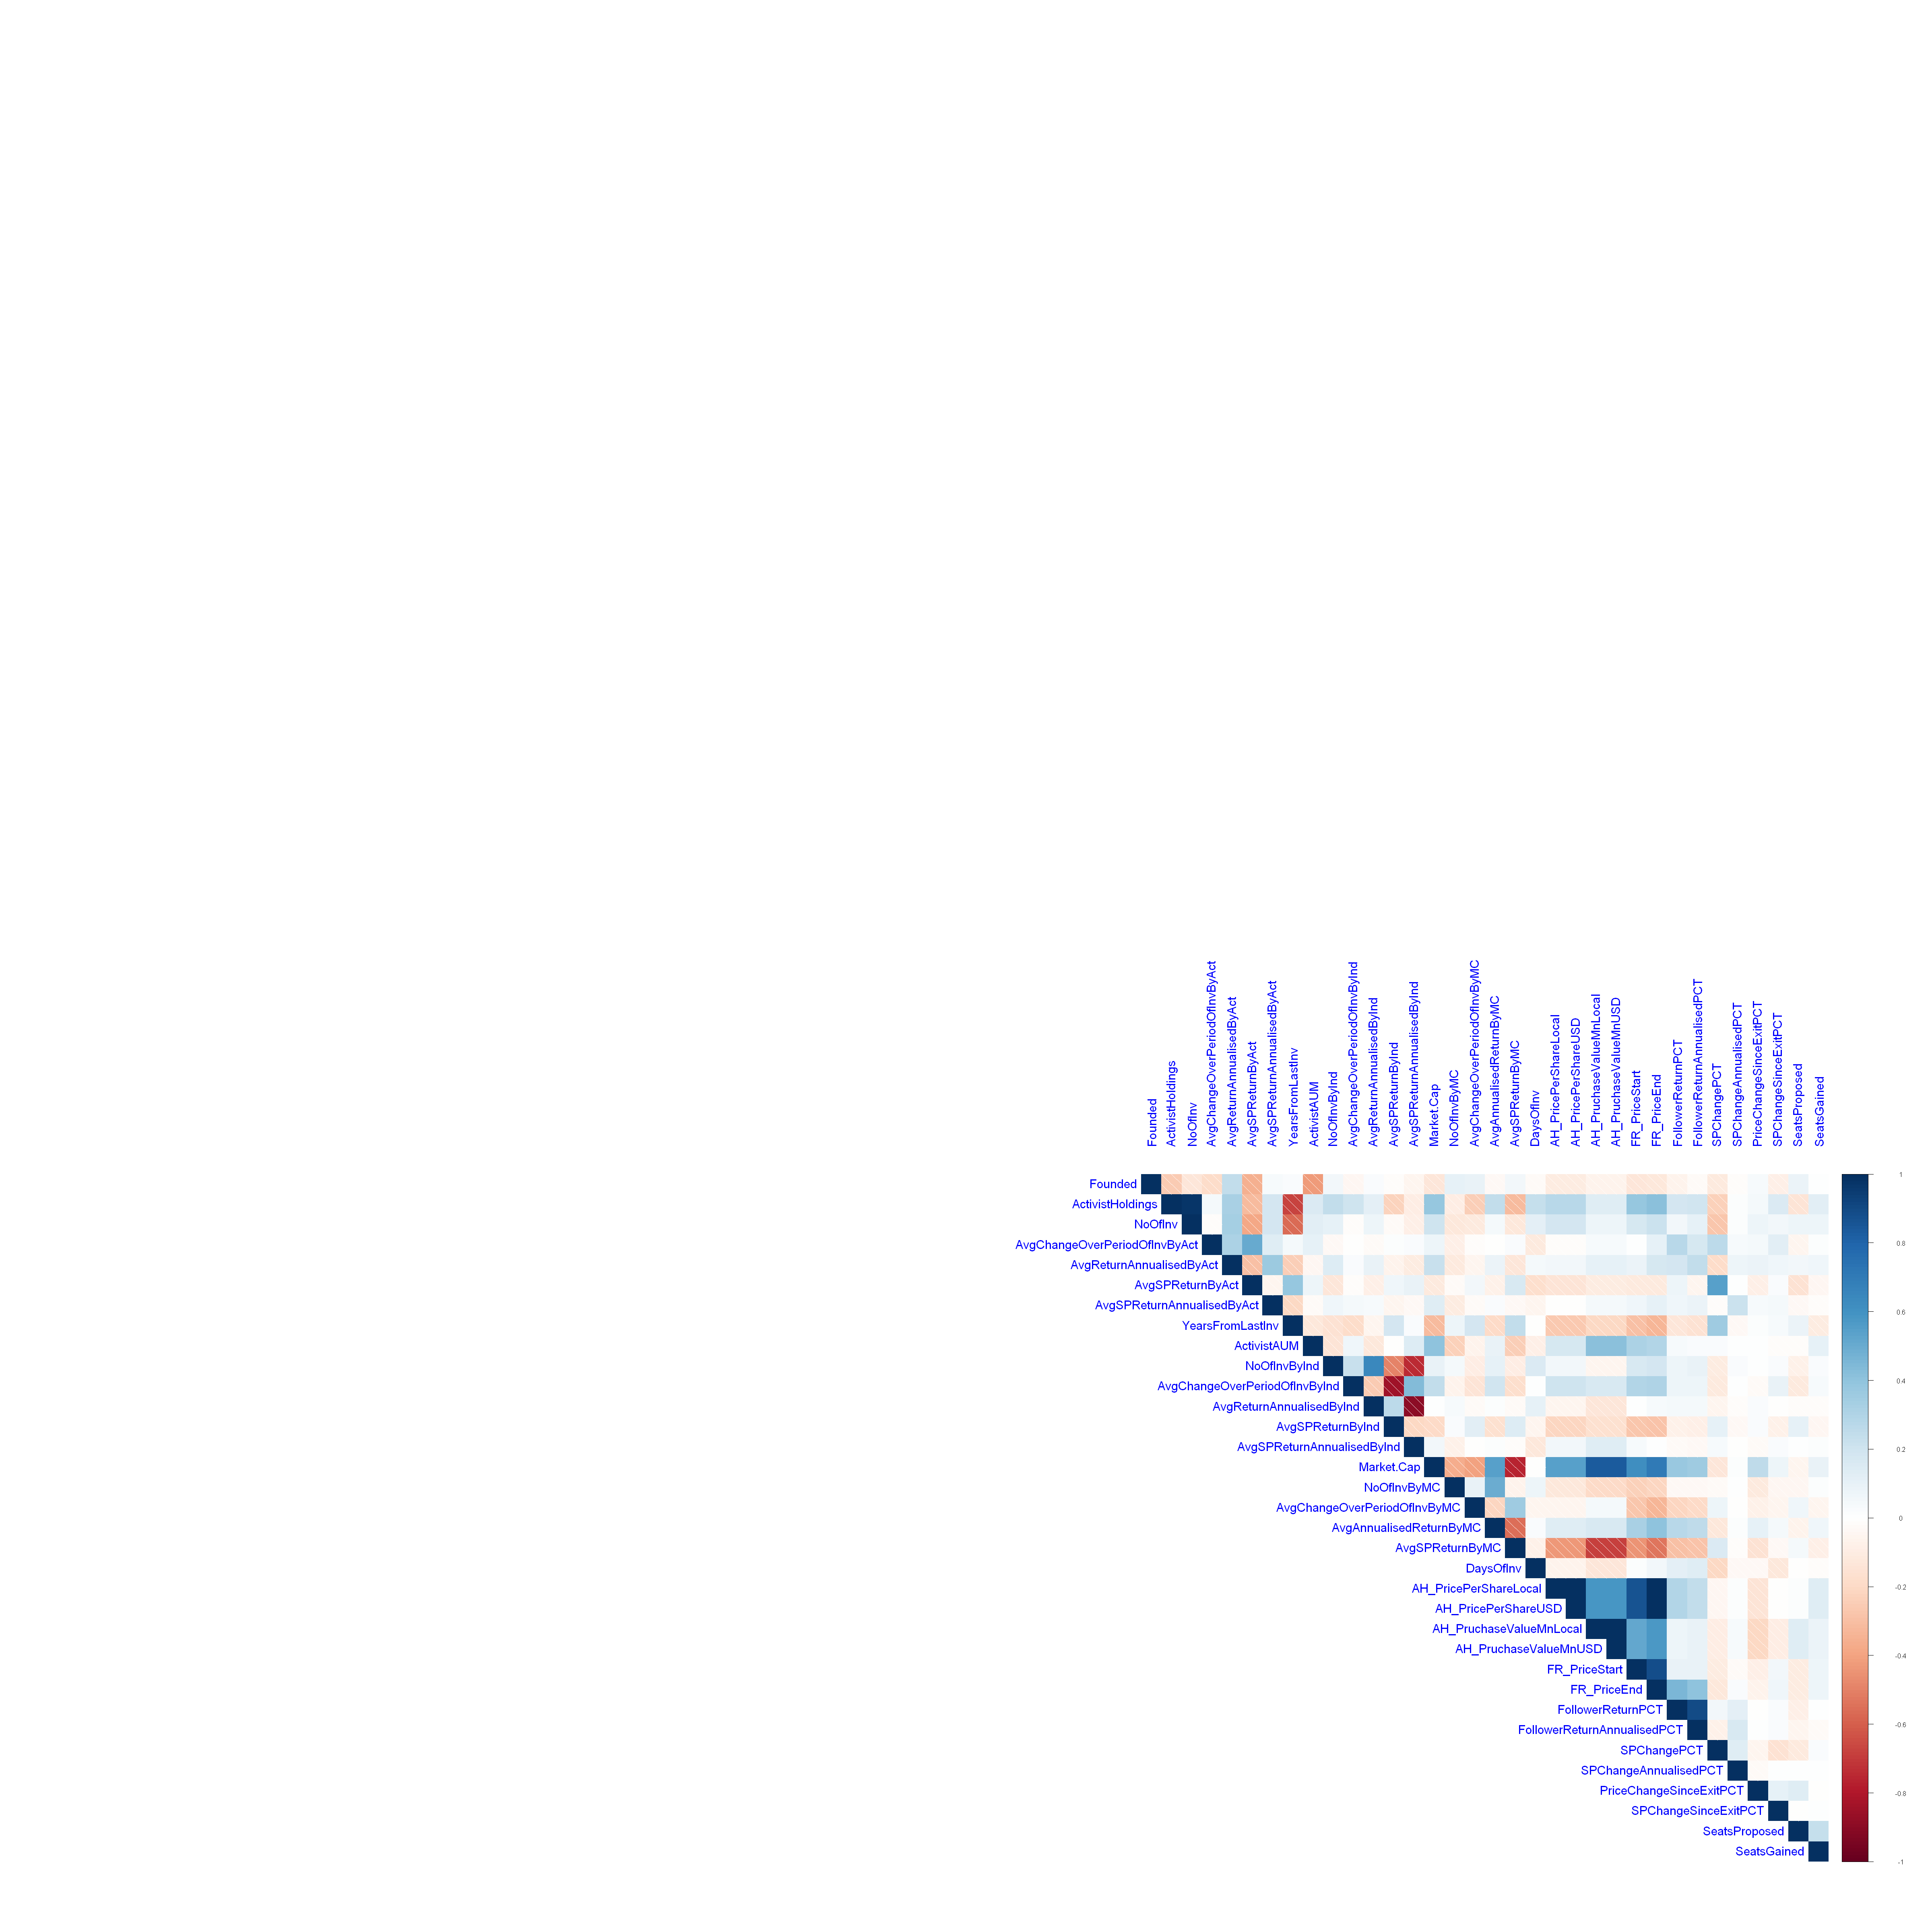

In [82]:
corrplot(res, method = "shade",type = "upper", is.corr = TRUE,tl.cex=1.5,tl.col = "Blue", tl.srt = 90, na.rm = TRUE)
options(repr.plot.width = 30, repr.plot.height = 30)


## Outliers

In [12]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- setdiff(names(data),c("Investor.ID","PID"))
    outdata <- data.frame(Investor.ID=data$Investor.ID)
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median (data[[v]],na.rm=TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[(v)] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

df_outliers <- outlierMatrix(df)

In [13]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Investor.ID,Founded,ActivistYaers,ActivistHoldings,NoOfInv,AvgChangeOverPeriodOfInvByAct,AvgReturnAnnualisedByAct,AvgSPReturnByAct,AvgSPReturnAnnualisedByAct,YearsFromLastInv,...,DelayShareholderMeeting,CloseFund,ClosedAGM,ActivistIssuesPublicLetter,ActivistLetterToRegulatoryBodies,LitigationInitiated,ConsentSolicitationInitiated,SECFiling,SeatsProposed,SeatsGained
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,0,0,0,0,0,0,0,0,NA,NA
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA
6,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA,NA


In [9]:
for (i in 2:length(df_outliers)){
    no_outliers <- df[[i]]
    no_outliers <- ifelse(df_outliers[[i]]==1, NA, no_outliers)
}


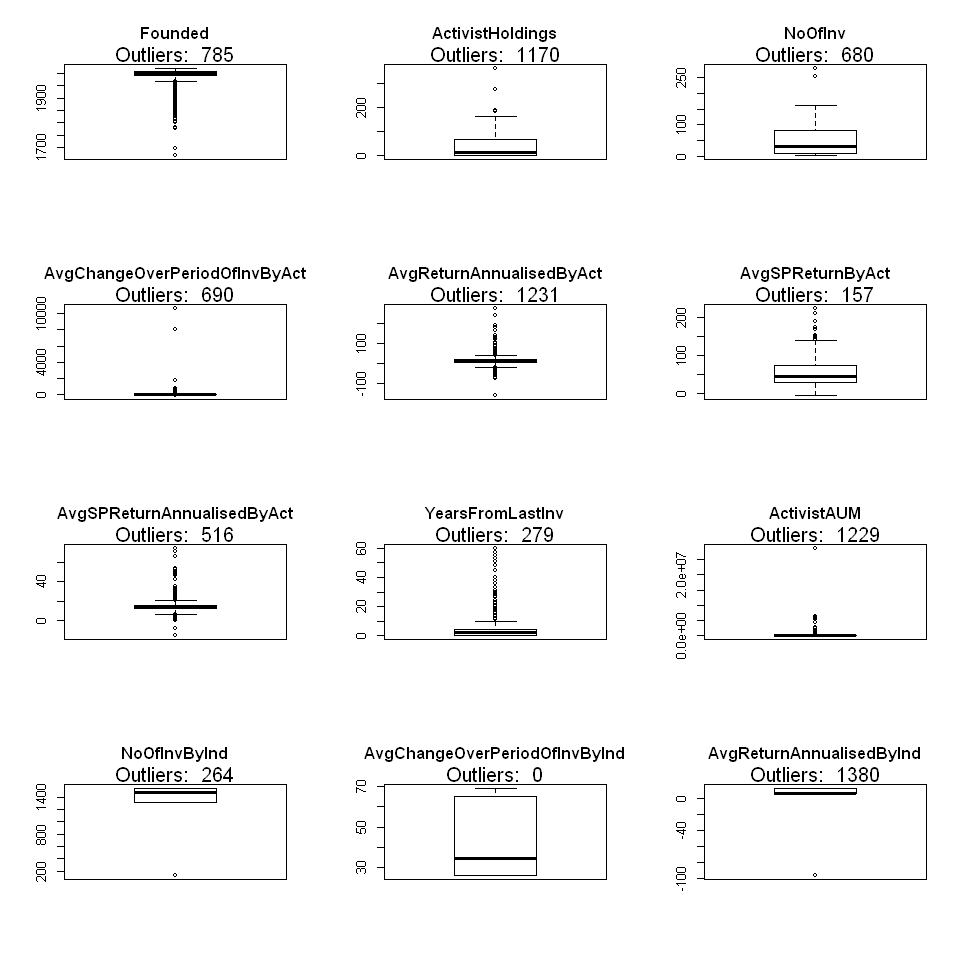

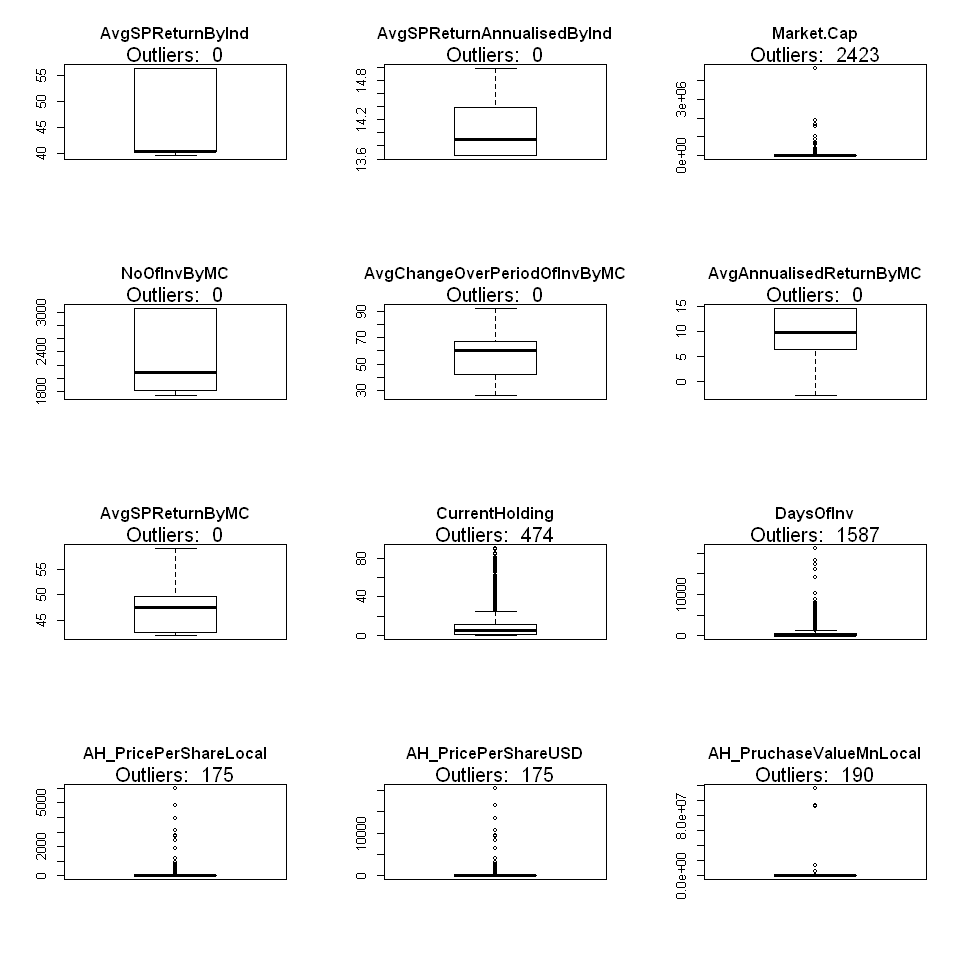

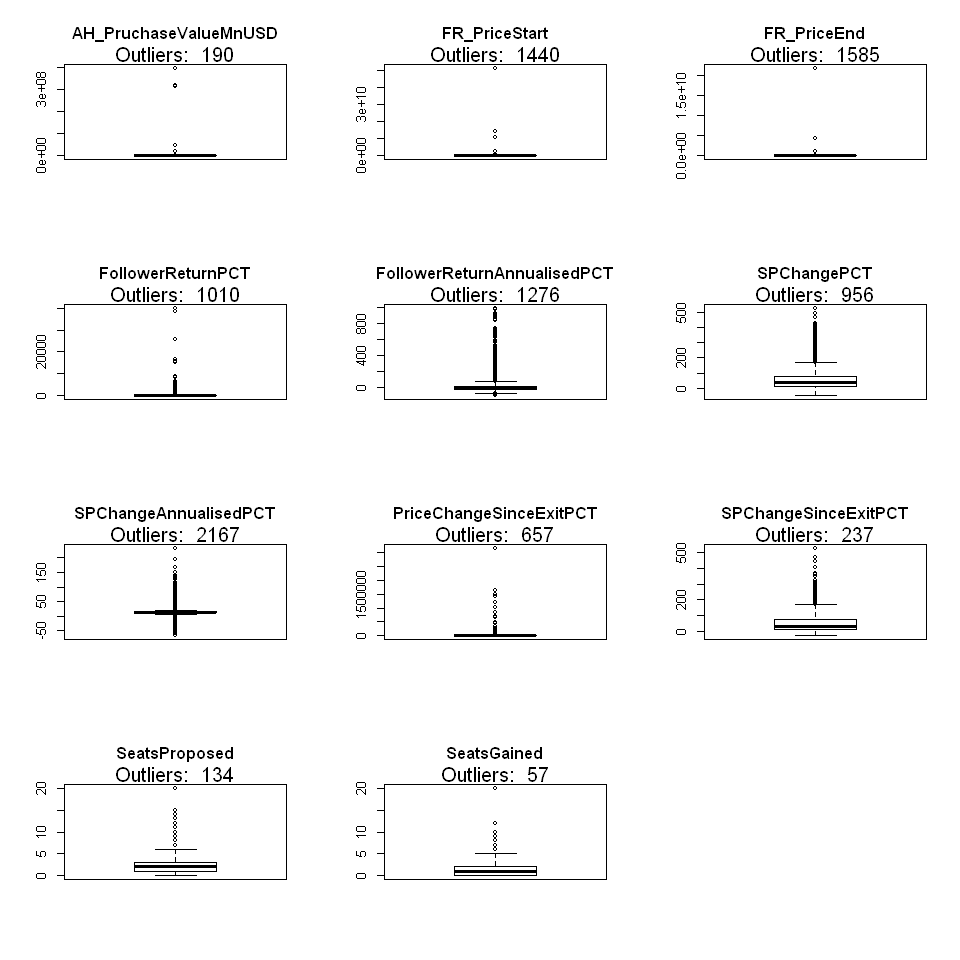

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(Activism_continuous)) {
    outlier_values <- boxplot.stats(Activism_continuous[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

In [11]:
Activism_continuous <- df[,c(5,7:12,14,20,29:38,42,46,48,50:60,164:165)]
dim(Activism_continuous)

[1] 15141    35

## Missingness

In [11]:
getMissingness(df)

list(var = c(51, 52, 48, 50, 174, 165, 164, 39, 60, 59), na_count = c(13679, 13679, 13435, 13435, 12753, 12255, 12206, 11433, 10706, 9735), rate = c(90.3, 90.3, 88.7, 88.7, 84.2, 80.9, 80.6, 75.5, 70.7, 64.3))This dataset has 0 (0%) complete rows. Original data has 15141 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,13679,90.3
AH_PruchaseValueMnUSD,13679,90.3
AH_PricePerShareLocal,13435,88.7
AH_PricePerShareUSD,13435,88.7
Buyer,12753,84.2
SeatsGained,12255,80.9
SeatsProposed,12206,80.6
ThirteenD,11433,75.5
SPChangeSinceExitPCT,10706,70.7


In [10]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"Investor.ID")
    missdata <- data.frame(Investor.ID=data$Investor.ID)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
head(df_missing)

,Investor.ID,Activist,ActivistHQ,ActivistRegion,Founded,ActivistYaers,ActivistHoldings,NoOfInv,AvgChangeOverPeriodOfInvByAct,AvgReturnAnnualisedByAct,...,SeatsGainedMethod,Ongoing,WithdrewDemands,PartiallySuccessful,Successful,Unsuccessful,CompromiseOrSettlement,Unresolved,Buyer,PublicDemand
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
6,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Warning message:
"Removed 174 rows containing missing values (geom_tile)."


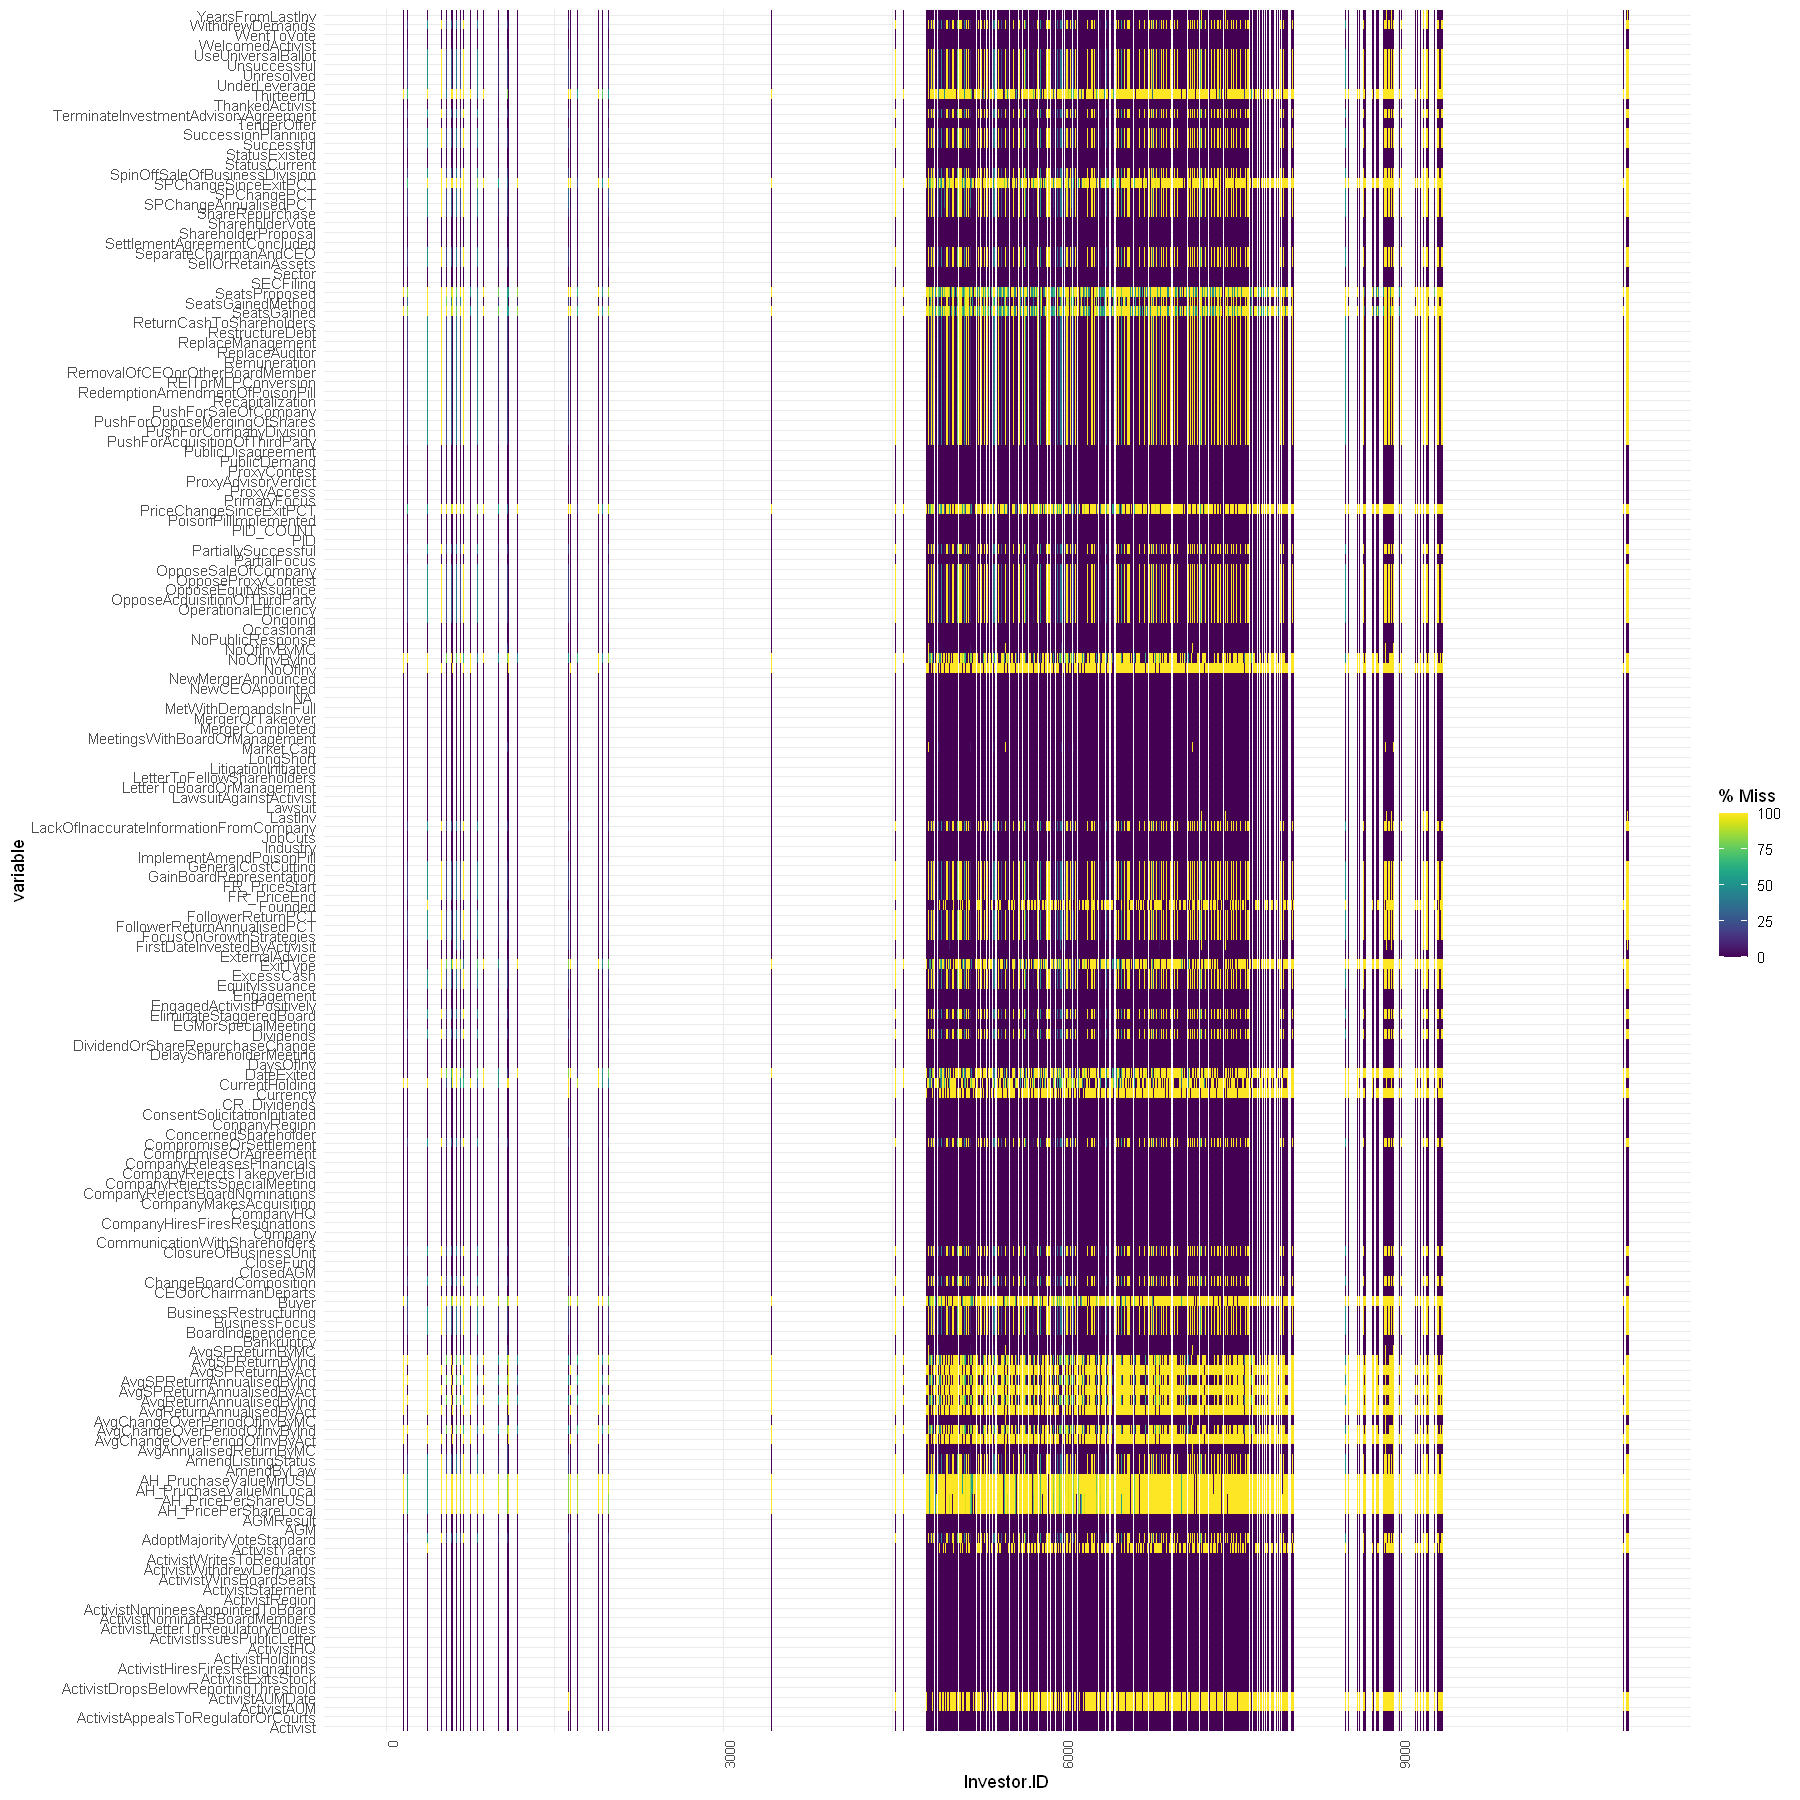

In [18]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Investor.ID) + 
theme(axis.text.x = element_text(angle=90, size=8))

# Data Cleansing

## Outliers

### For the variables where outliers were found, checking the distribution with(blue) / without outliers(red)

Joining, by = c("Founded", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 3136 rows containing non-finite values (stat_density)."
Joining, by = c("ActivistHoldings", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2 rows containing non-finite values (stat_density)."
Joining, by = c("NoOfInv", "outliers")



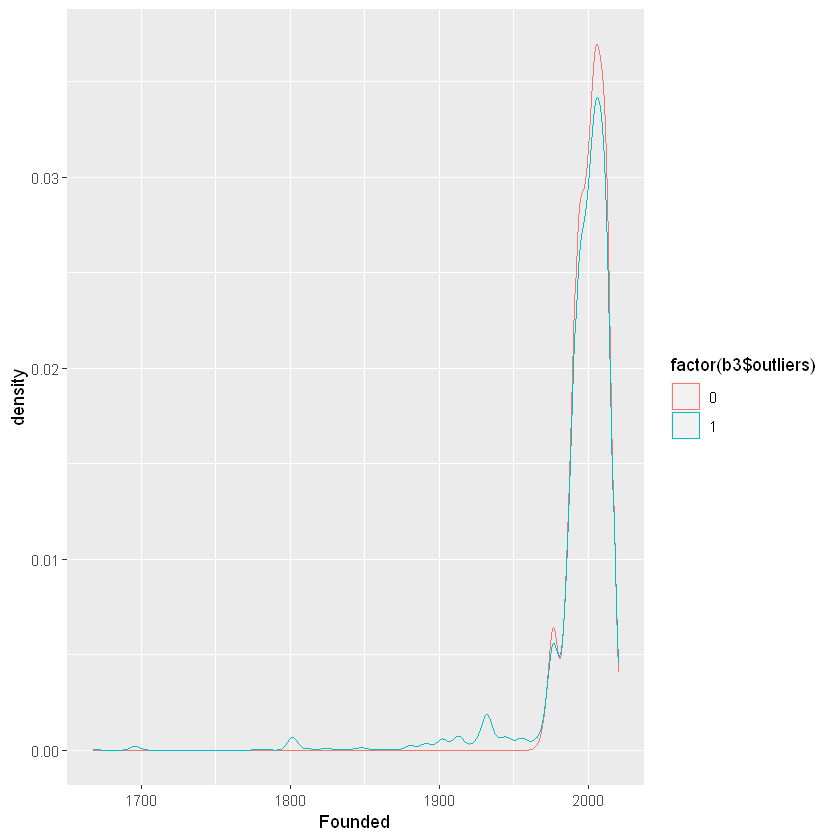

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 5122 rows containing non-finite values (stat_density)."
Joining, by = c("AvgChangeOverPeriodOfInvByAct", "outliers")



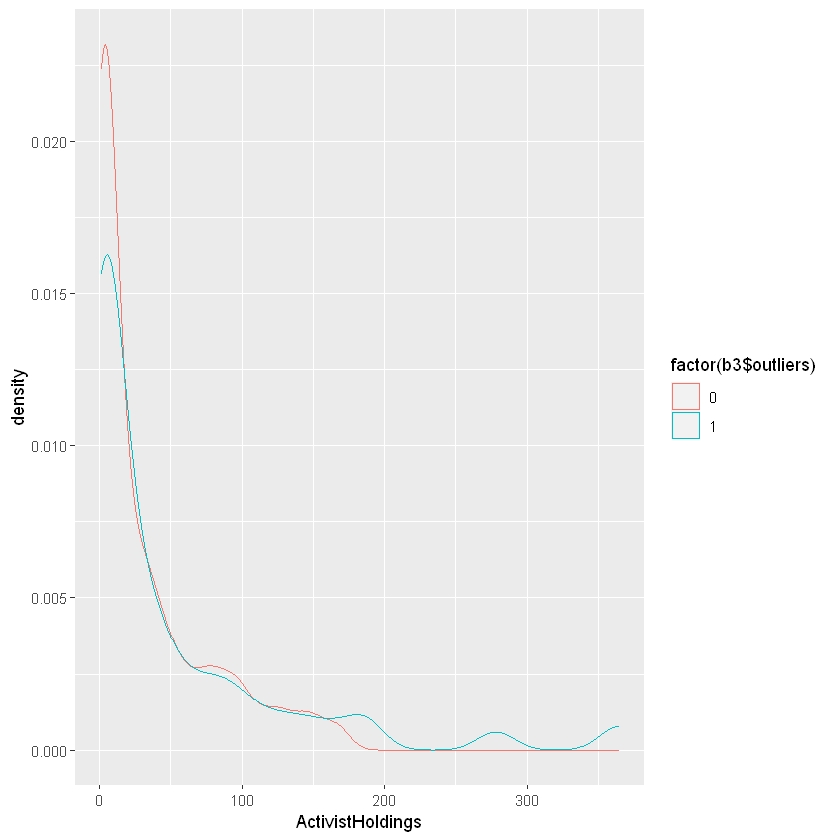

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 5122 rows containing non-finite values (stat_density)."
Joining, by = c("AvgReturnAnnualisedByAct", "outliers")



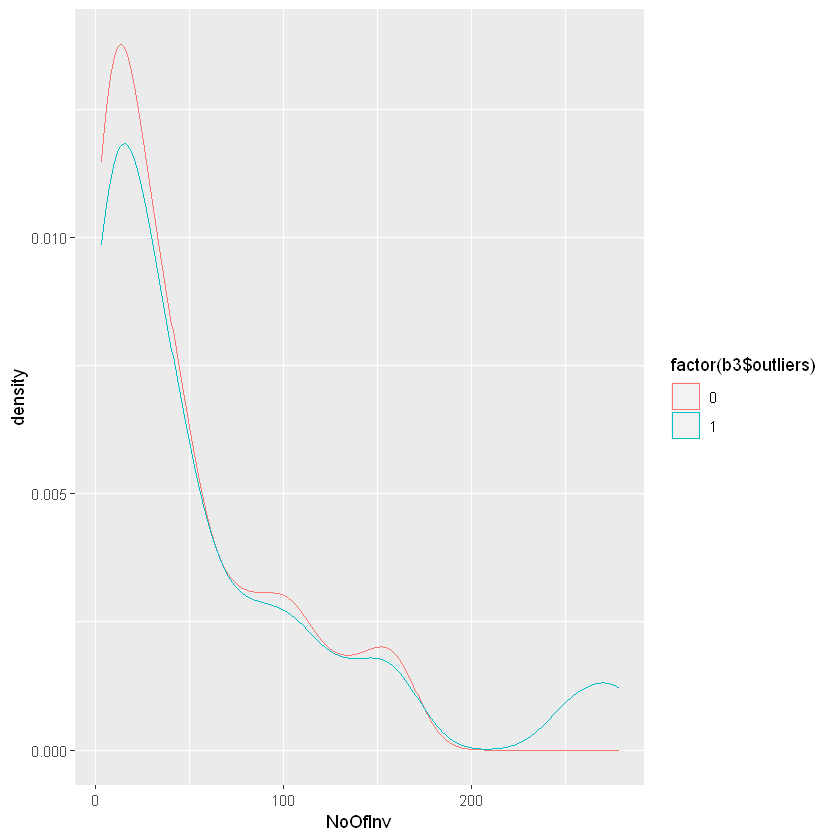

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 5122 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnByAct", "outliers")



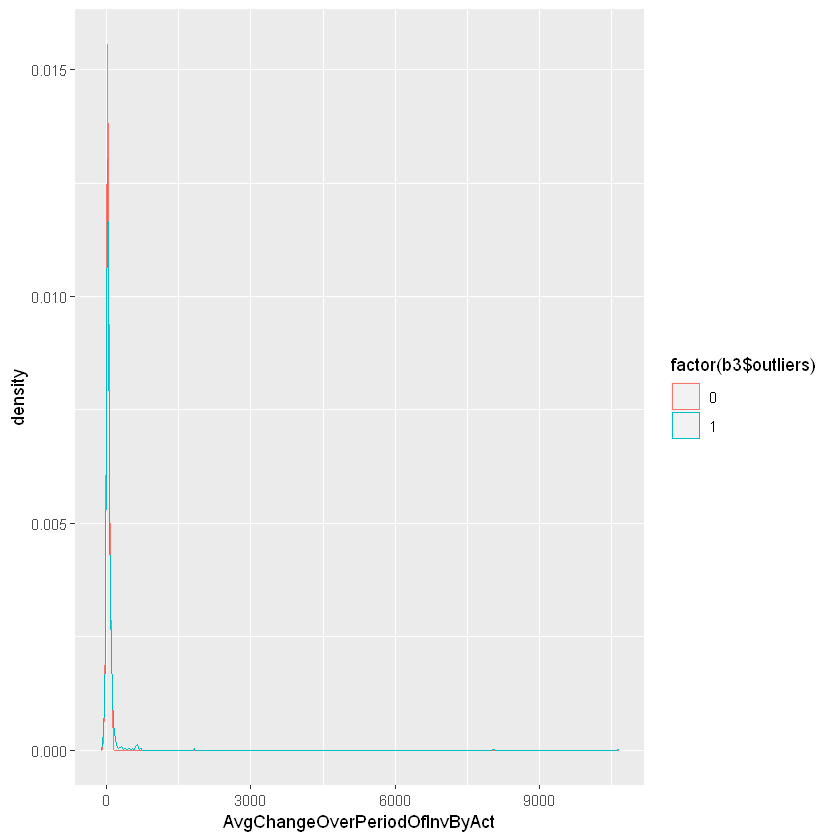

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 5122 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnAnnualisedByAct", "outliers")



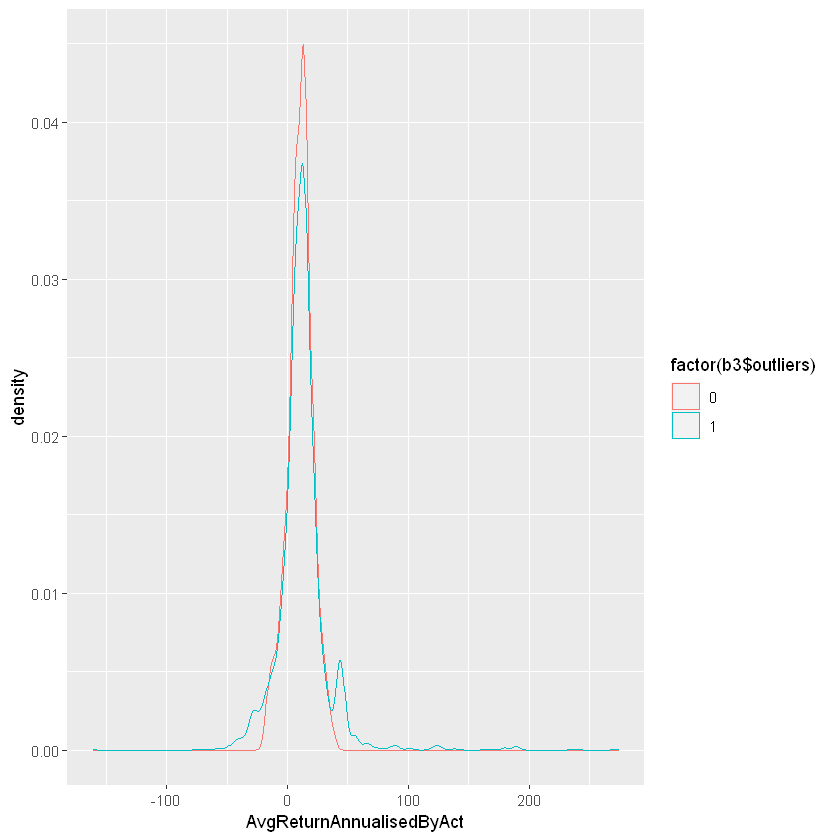

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 5122 rows containing non-finite values (stat_density)."
Joining, by = c("YearsFromLastInv", "outliers")



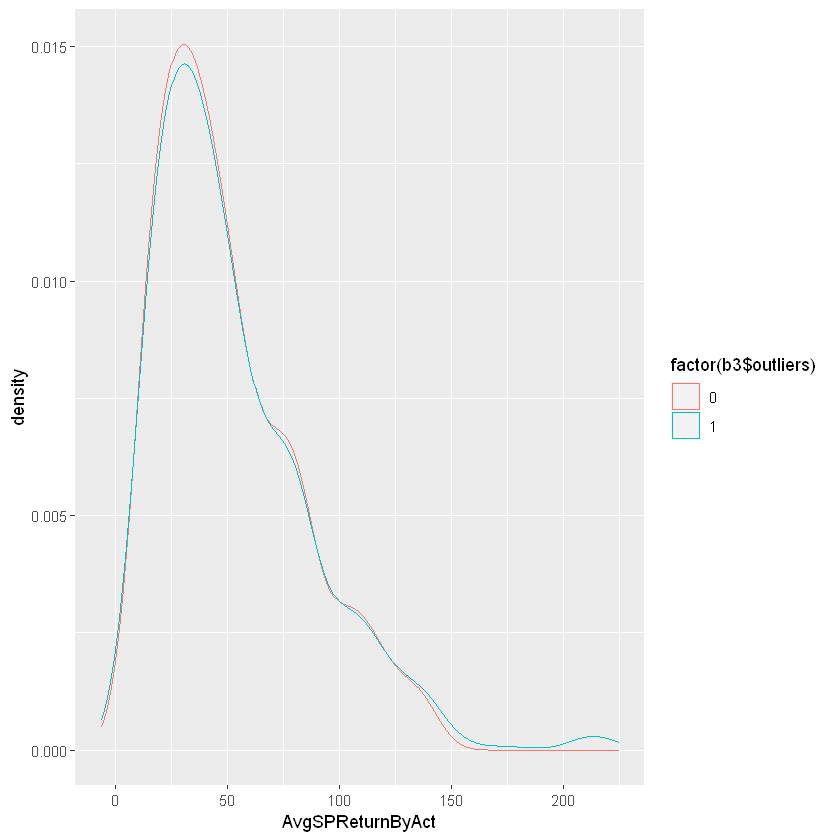

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 78 rows containing non-finite values (stat_density)."
Joining, by = c("ActivistAUM", "outliers")



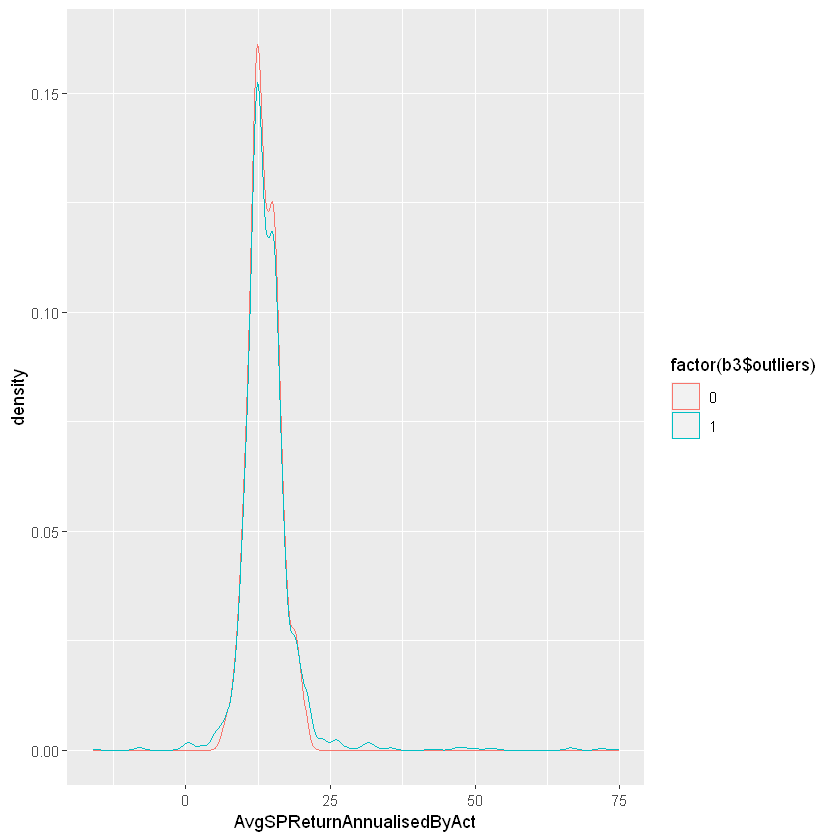

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 5619 rows containing non-finite values (stat_density)."
Joining, by = c("NoOfInvByInd", "outliers")



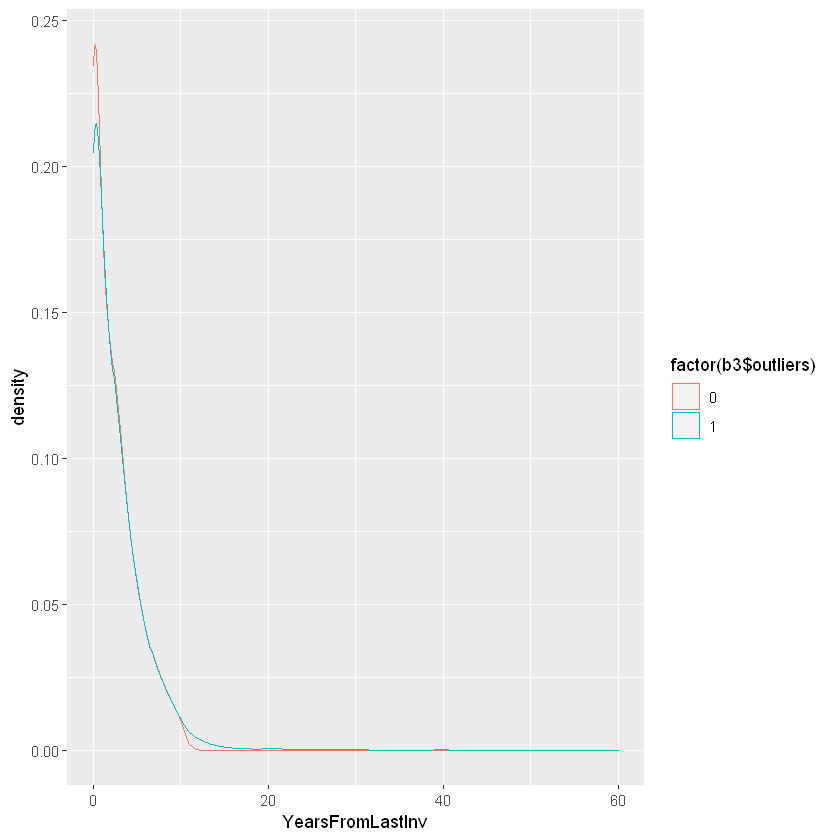

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9617 rows containing non-finite values (stat_density)."
Joining, by = c("AvgChangeOverPeriodOfInvByInd", "outliers")



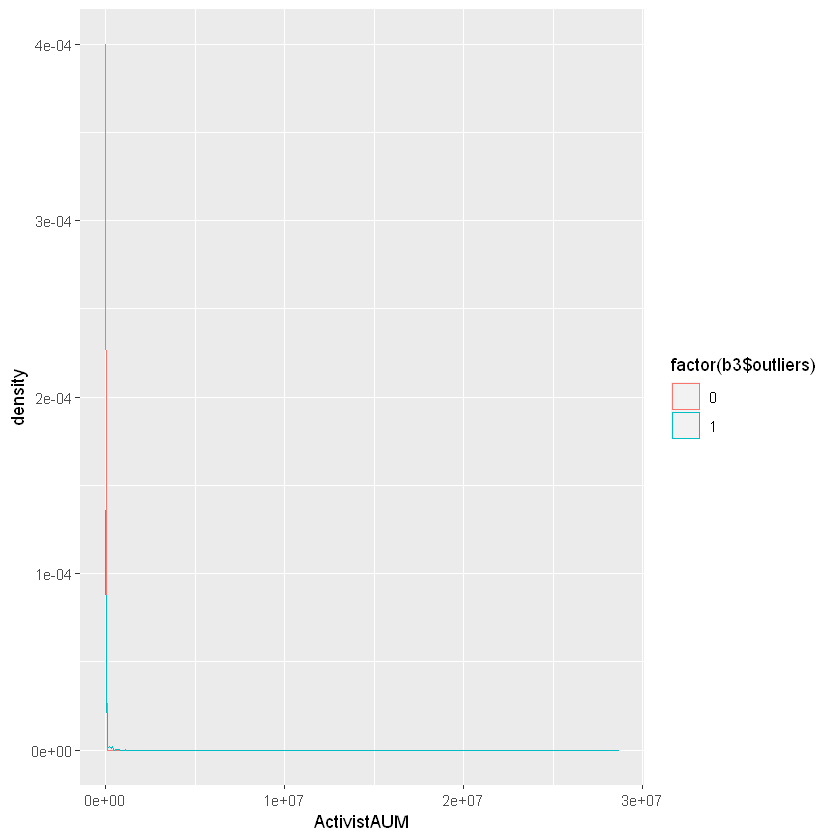

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9617 rows containing non-finite values (stat_density)."
Joining, by = c("AvgReturnAnnualisedByInd", "outliers")



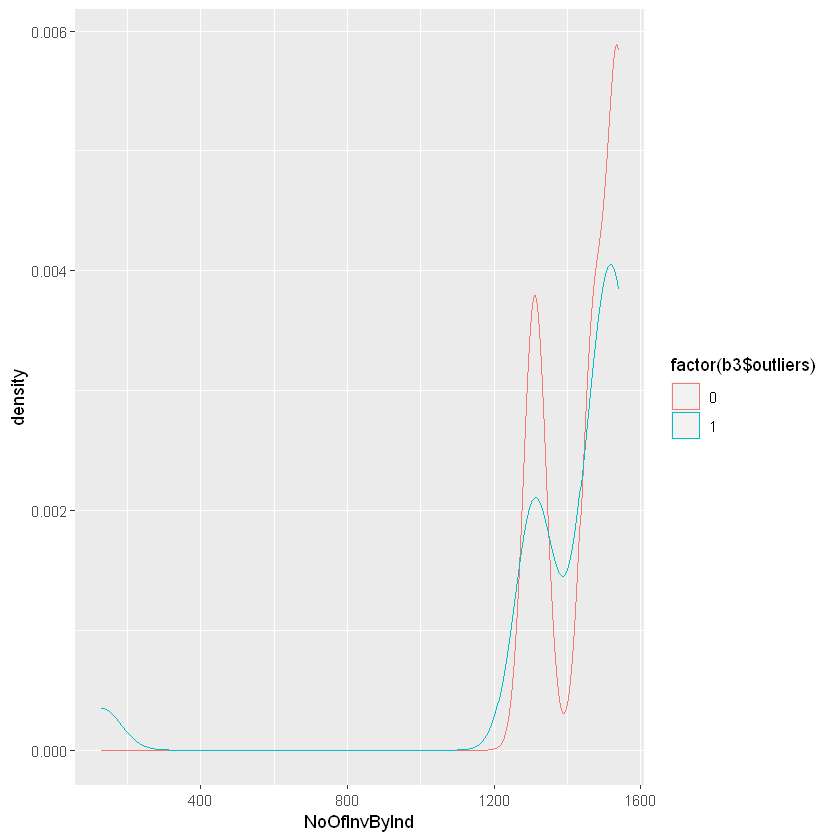

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9617 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnByInd", "outliers")



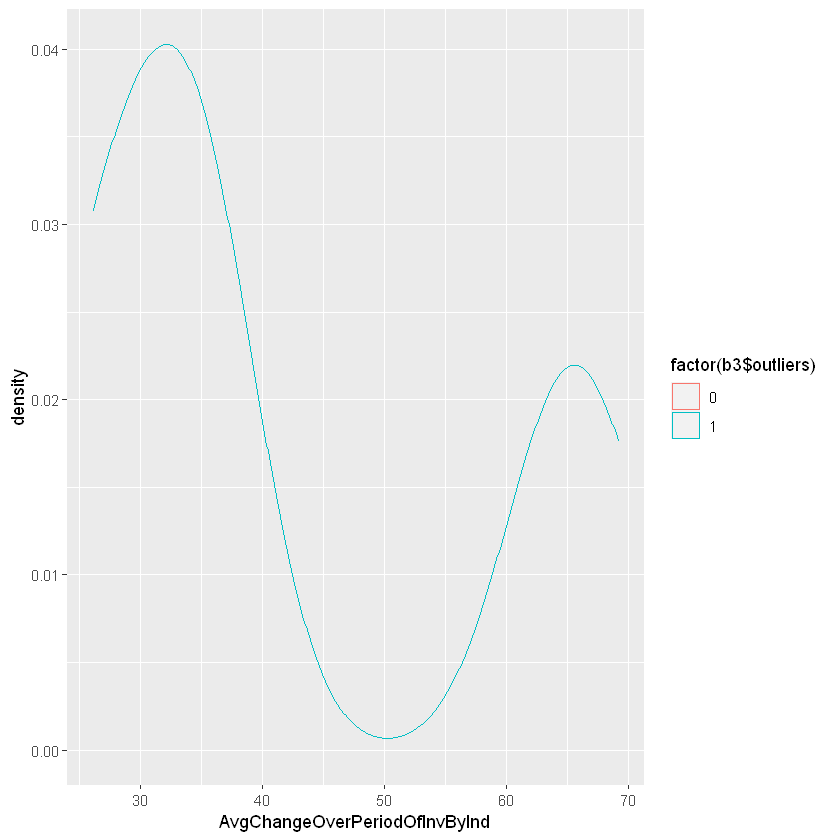

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9617 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnAnnualisedByInd", "outliers")



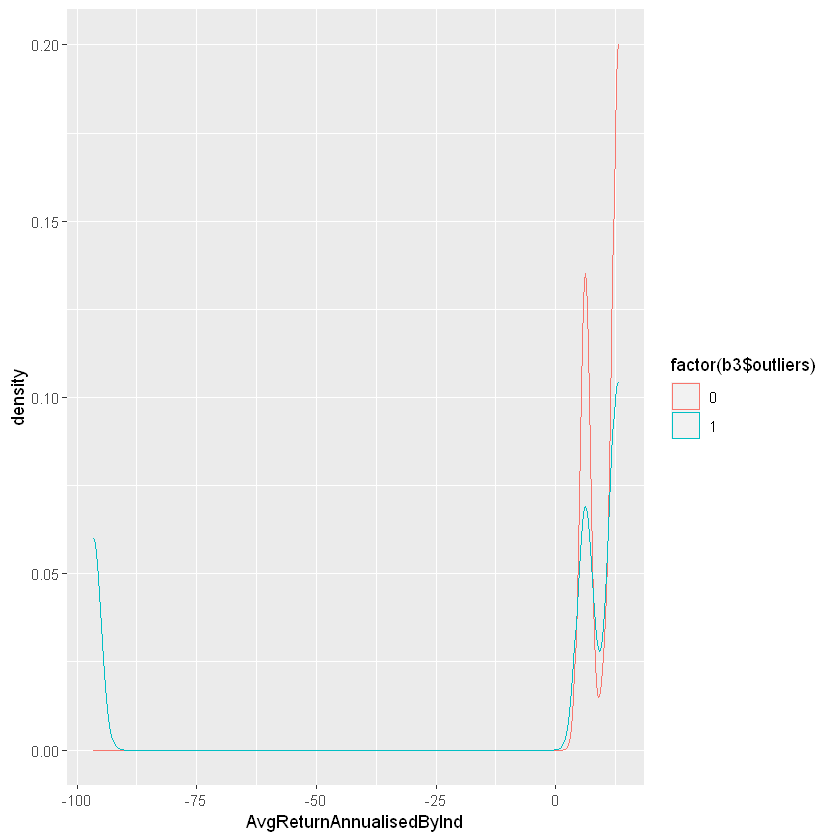

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9617 rows containing non-finite values (stat_density)."
Joining, by = c("Market.Cap", "outliers")



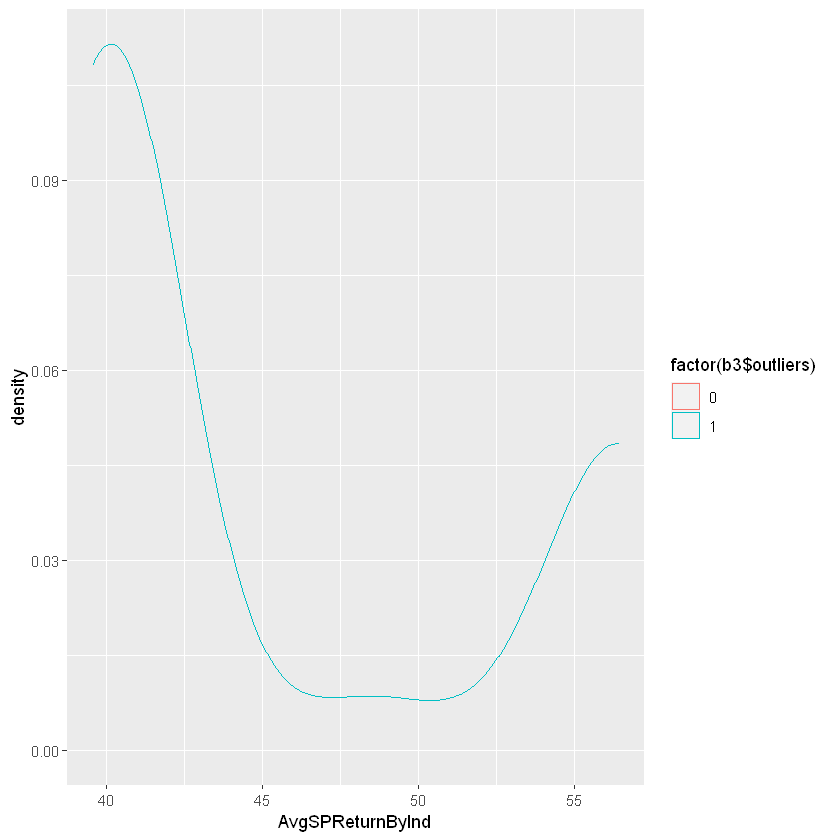

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 291 rows containing non-finite values (stat_density)."
Joining, by = c("NoOfInvByMC", "outliers")



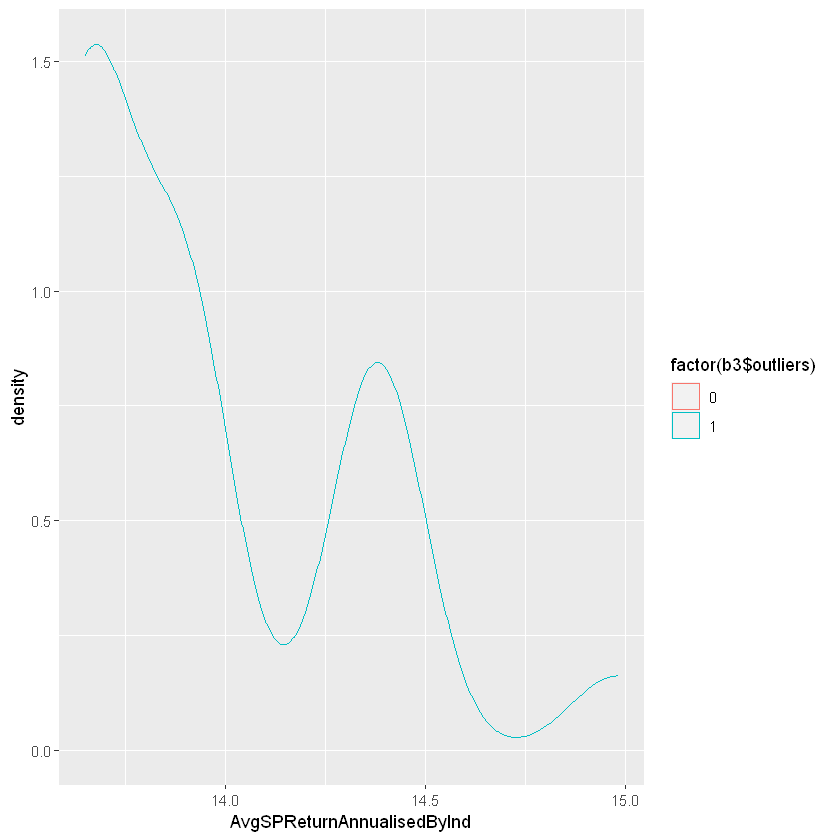

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 291 rows containing non-finite values (stat_density)."
Joining, by = c("AvgChangeOverPeriodOfInvByMC", "outliers")



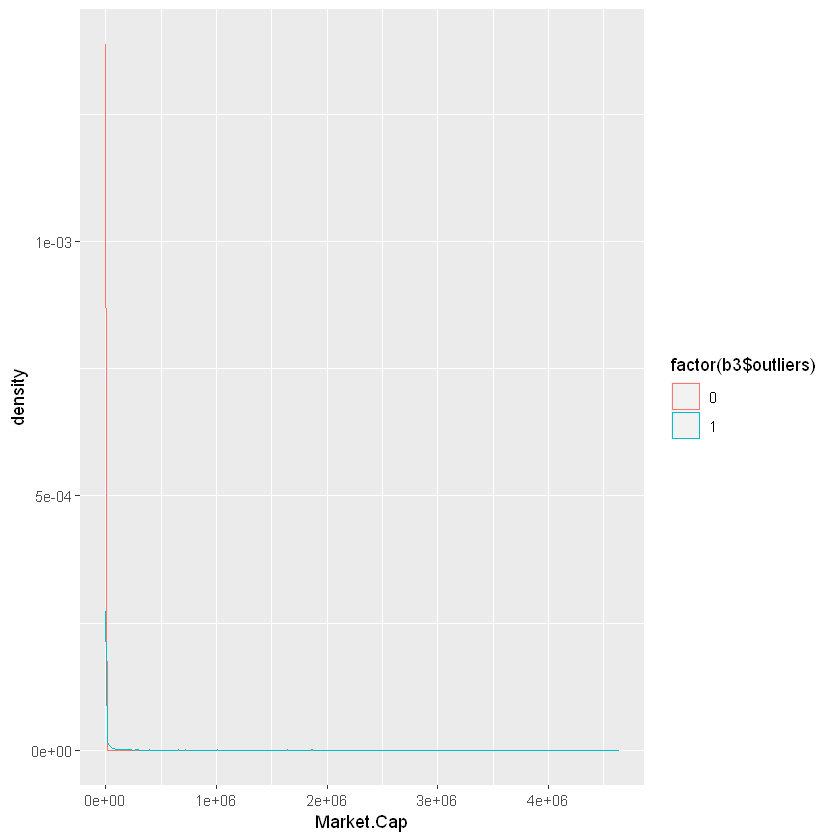

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 291 rows containing non-finite values (stat_density)."
Joining, by = c("AvgAnnualisedReturnByMC", "outliers")



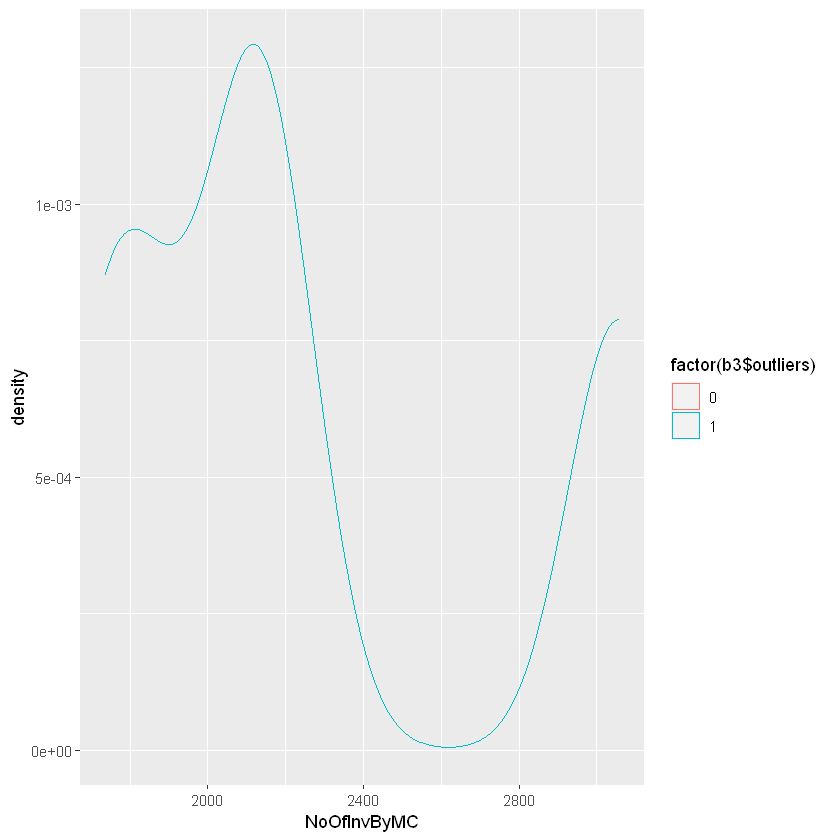

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 291 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnByMC", "outliers")



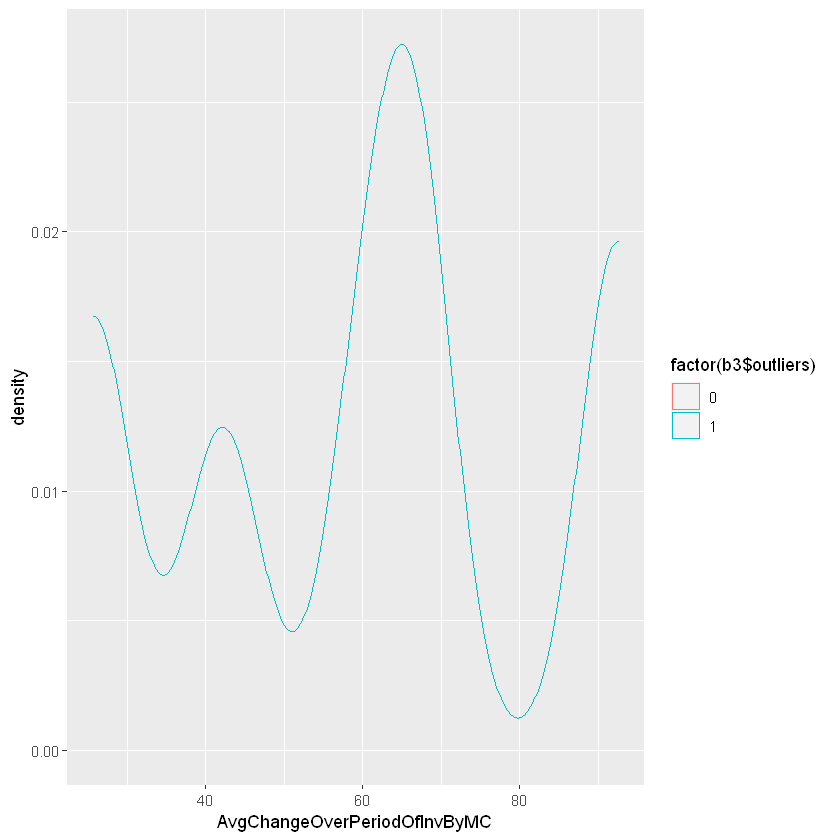

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 291 rows containing non-finite values (stat_density)."
Joining, by = c("CurrentHolding", "outliers")



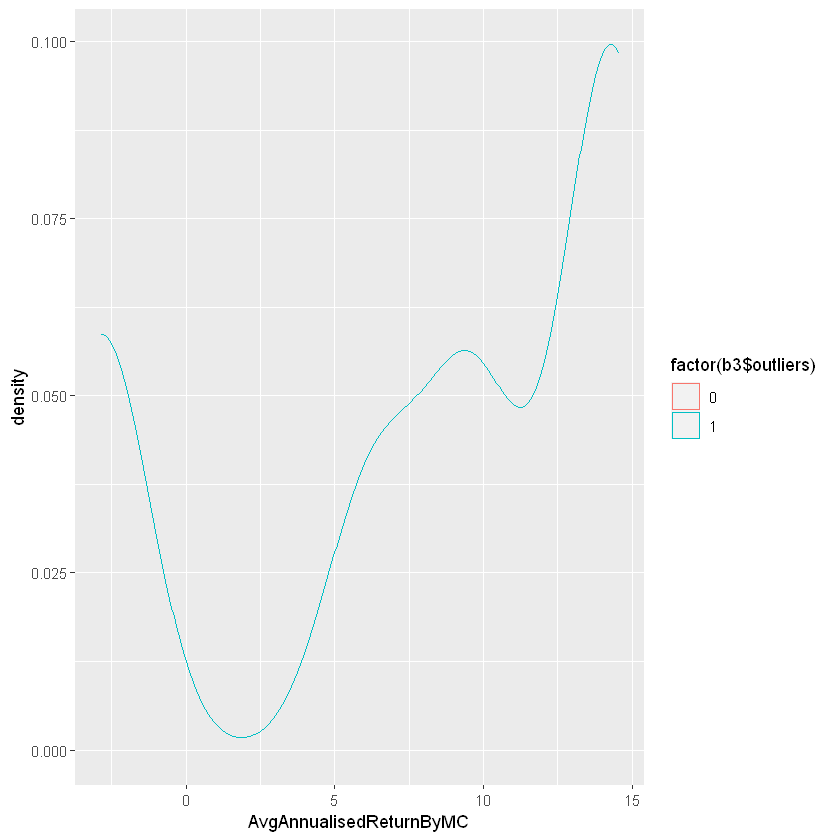

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9100 rows containing non-finite values (stat_density)."
Joining, by = c("DaysOfInv", "outliers")



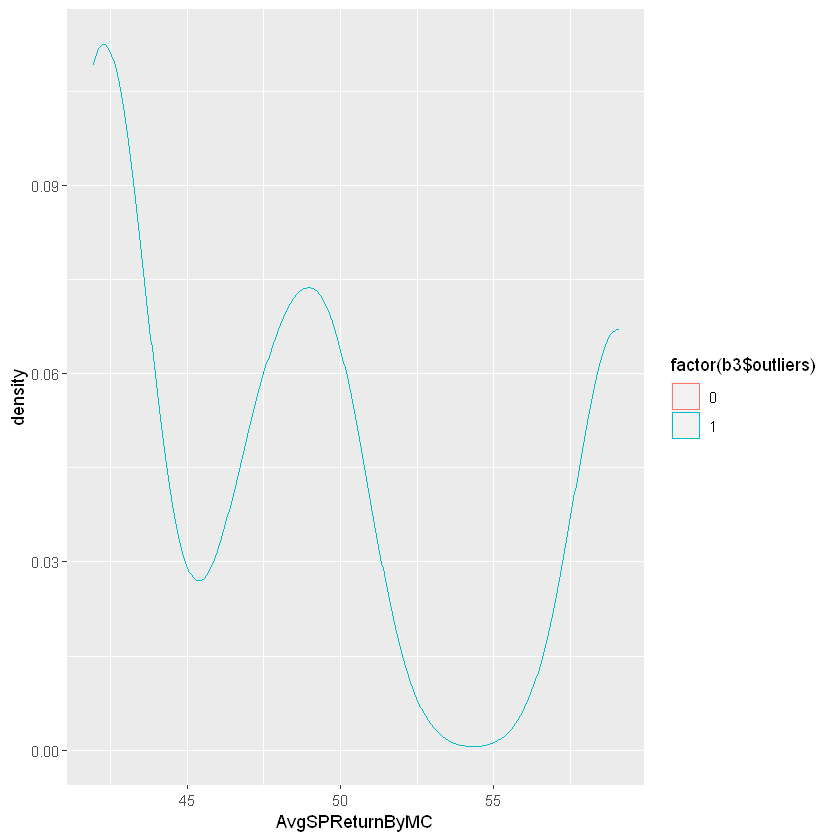

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("AH_PricePerShareLocal", "outliers")



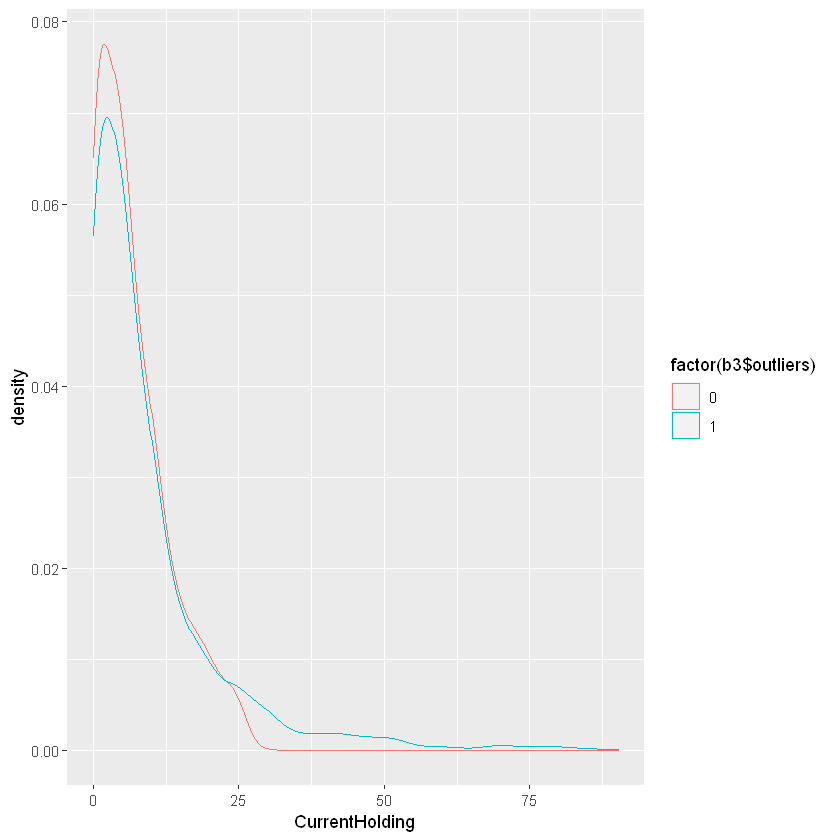

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 13435 rows containing non-finite values (stat_density)."
Joining, by = c("AH_PricePerShareUSD", "outliers")



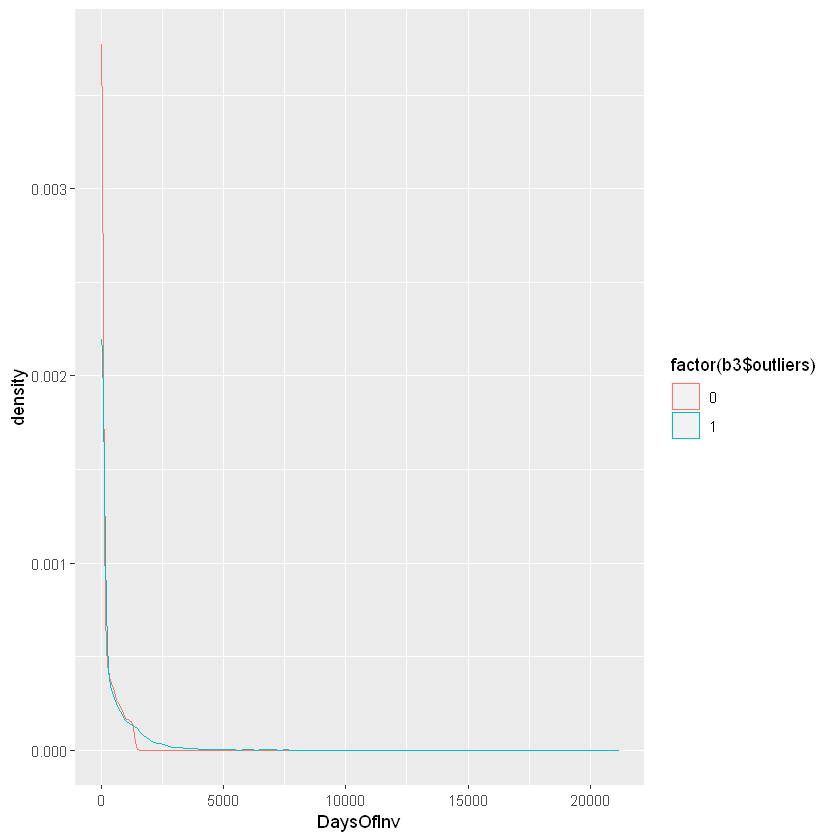

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 13435 rows containing non-finite values (stat_density)."
Joining, by = c("AH_PruchaseValueMnLocal", "outliers")



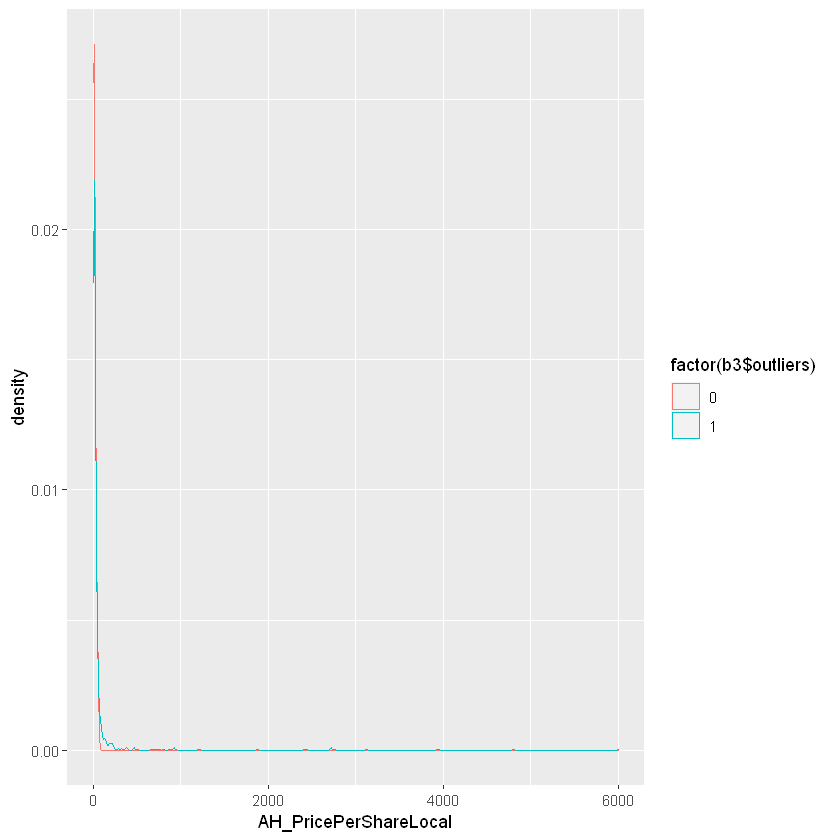

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 13679 rows containing non-finite values (stat_density)."
Joining, by = c("AH_PruchaseValueMnUSD", "outliers")



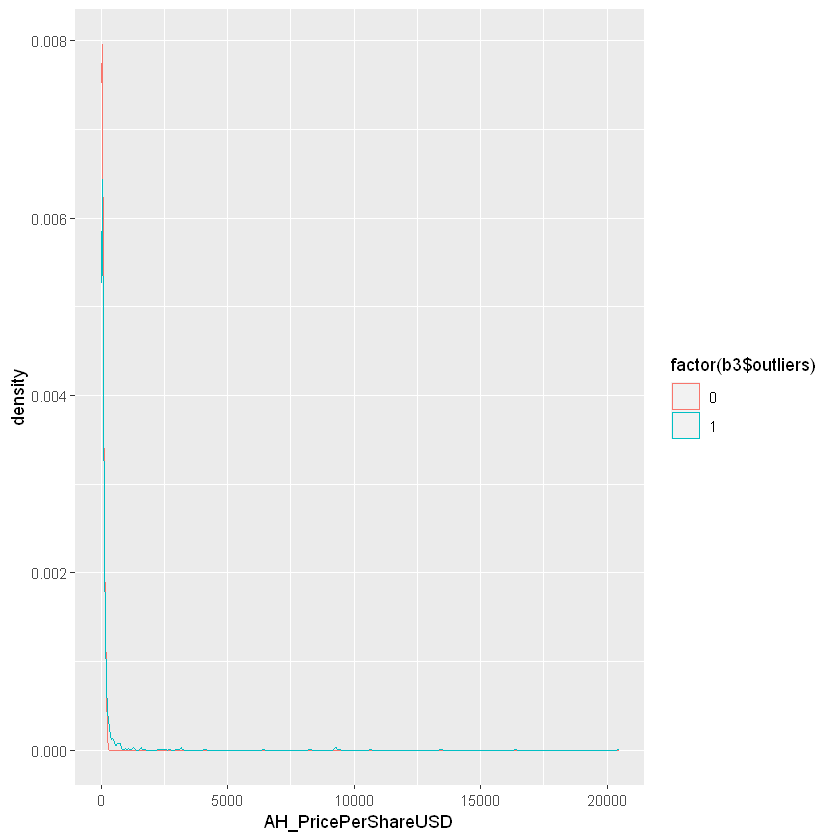

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 13679 rows containing non-finite values (stat_density)."
Joining, by = c("FR_PriceStart", "outliers")



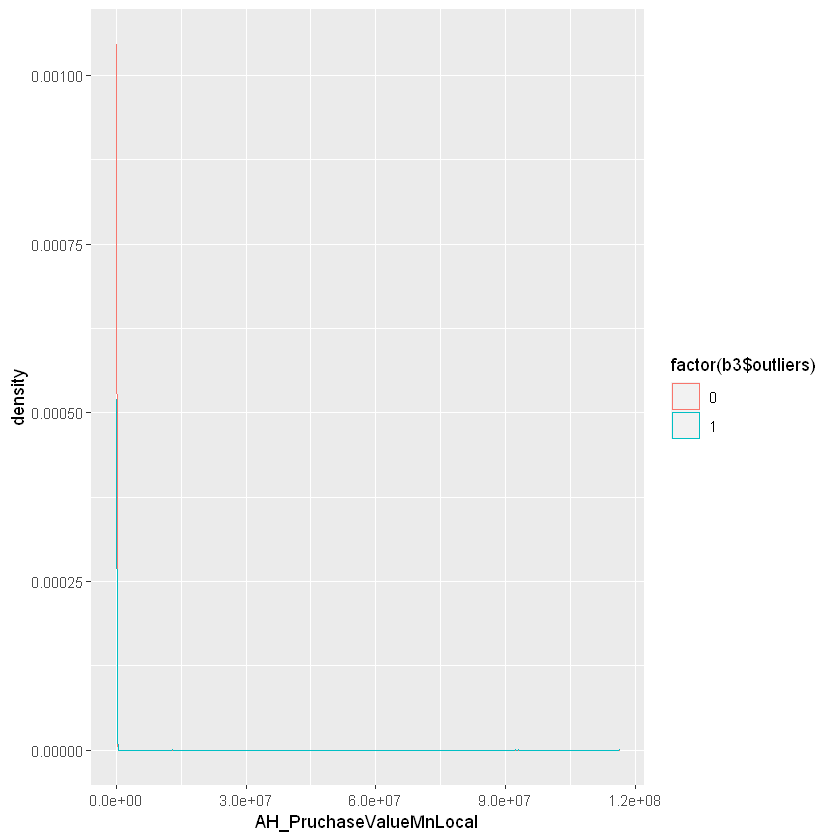

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2581 rows containing non-finite values (stat_density)."
Joining, by = c("FR_PriceEnd", "outliers")



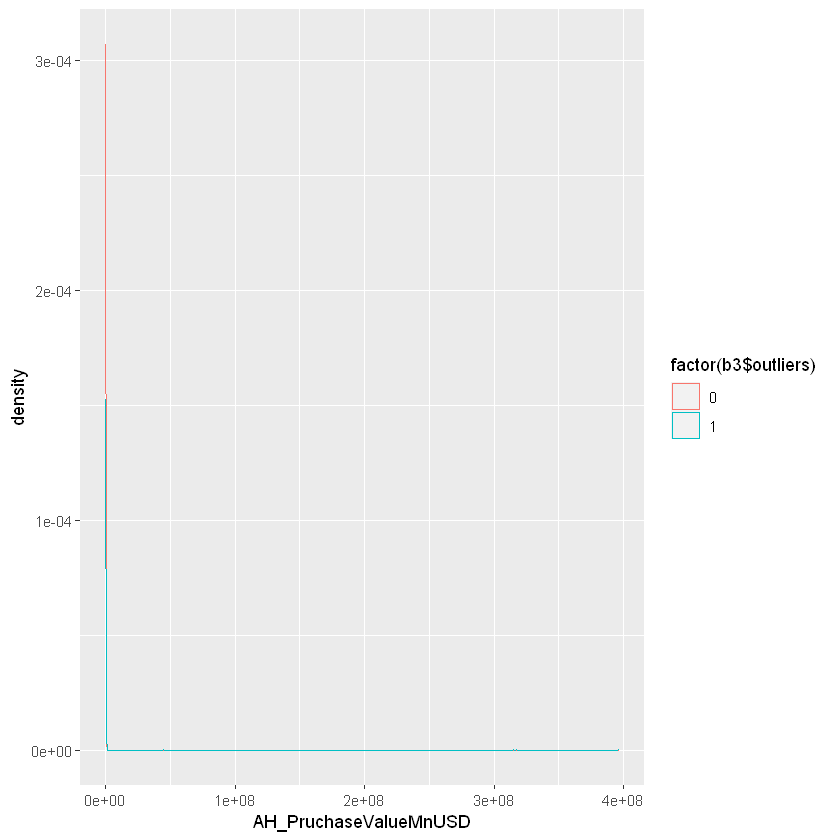

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2581 rows containing non-finite values (stat_density)."
Joining, by = c("FollowerReturnPCT", "outliers")



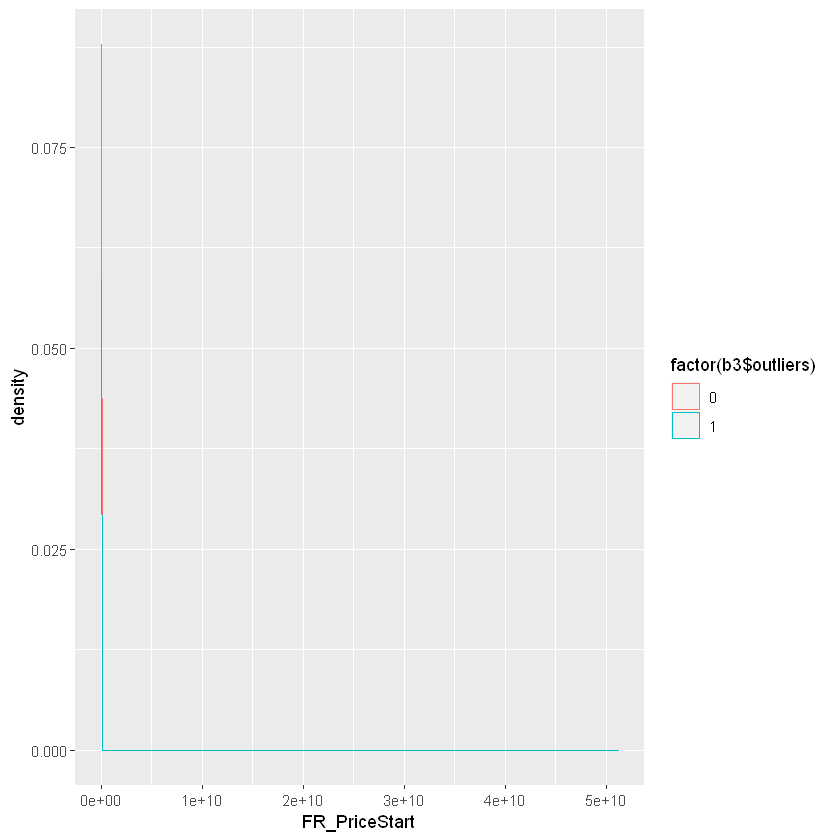

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2581 rows containing non-finite values (stat_density)."
Joining, by = c("FollowerReturnAnnualisedPCT", "outliers")



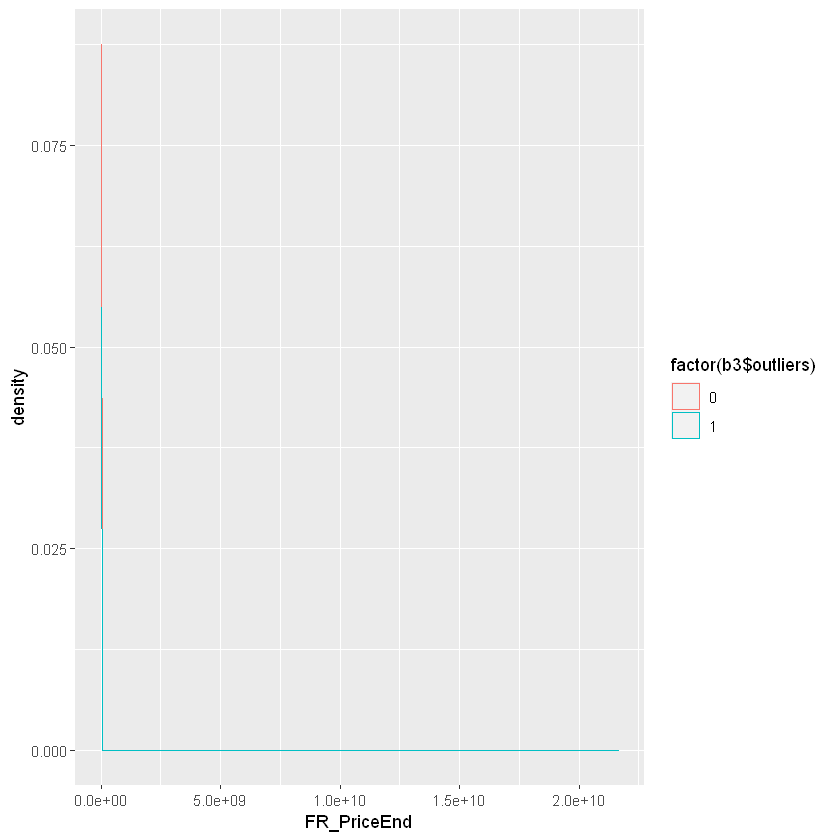

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2583 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangePCT", "outliers")



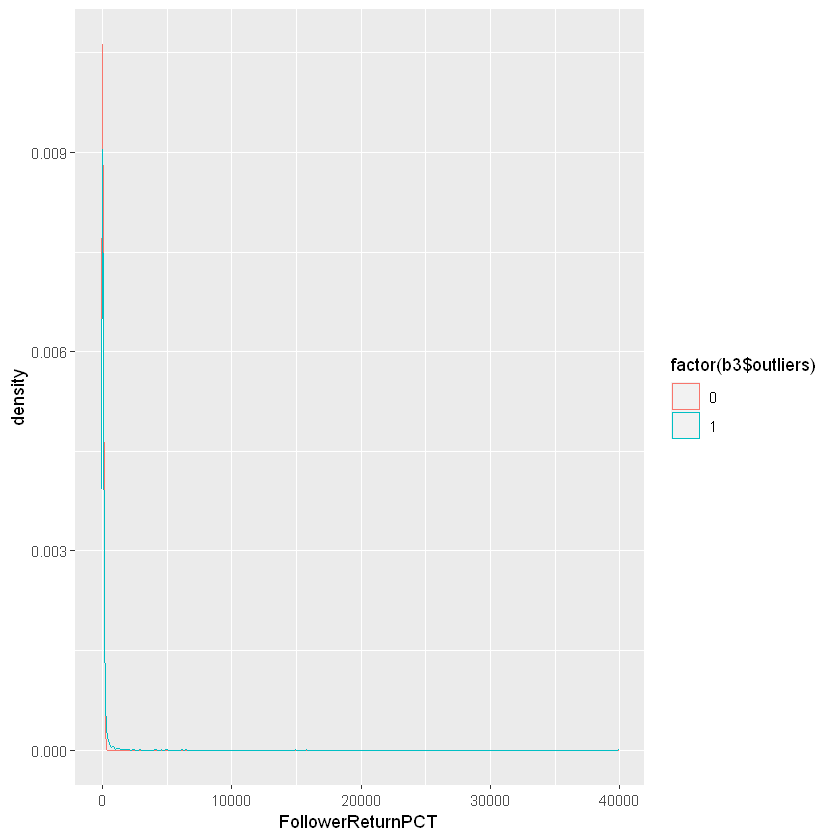

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2903 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangeAnnualisedPCT", "outliers")



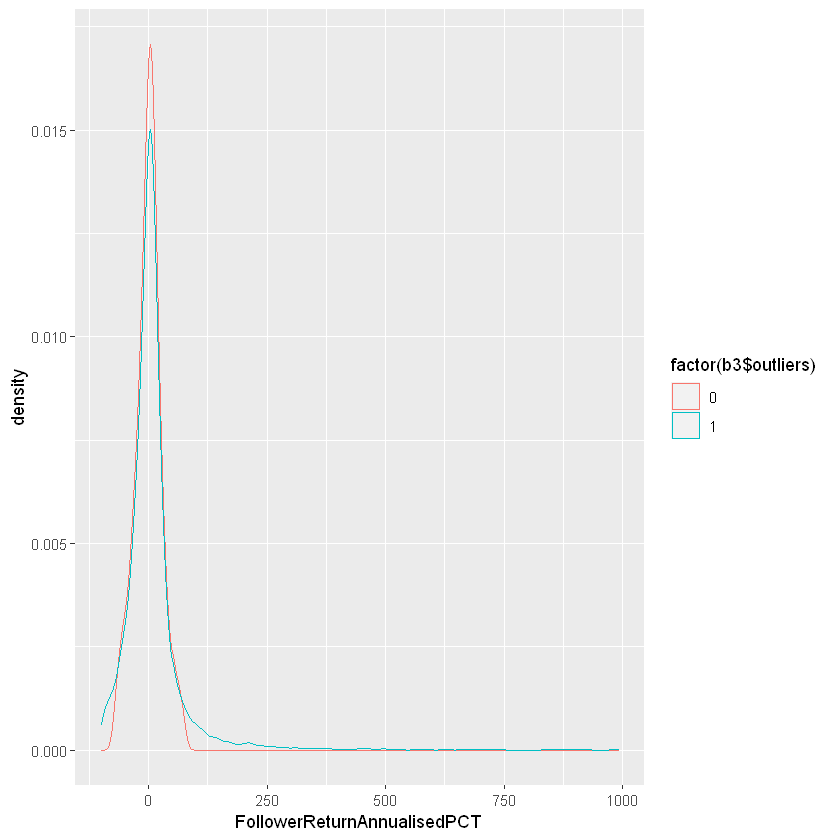

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2903 rows containing non-finite values (stat_density)."
Joining, by = c("PriceChangeSinceExitPCT", "outliers")



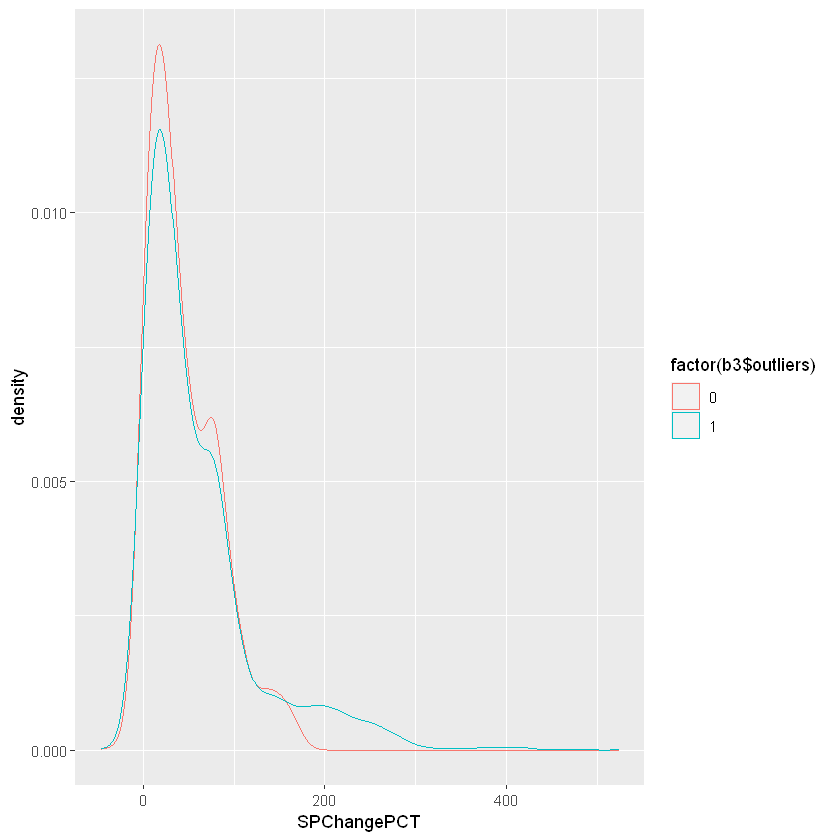

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 9735 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangeSinceExitPCT", "outliers")



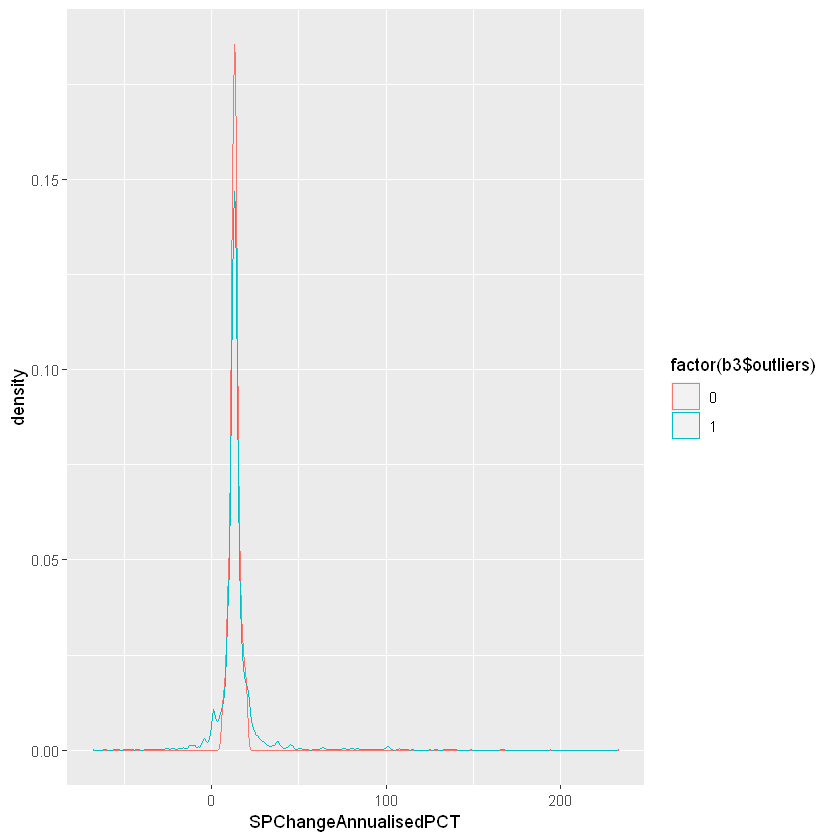

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 10706 rows containing non-finite values (stat_density)."
Joining, by = c("SeatsProposed", "outliers")



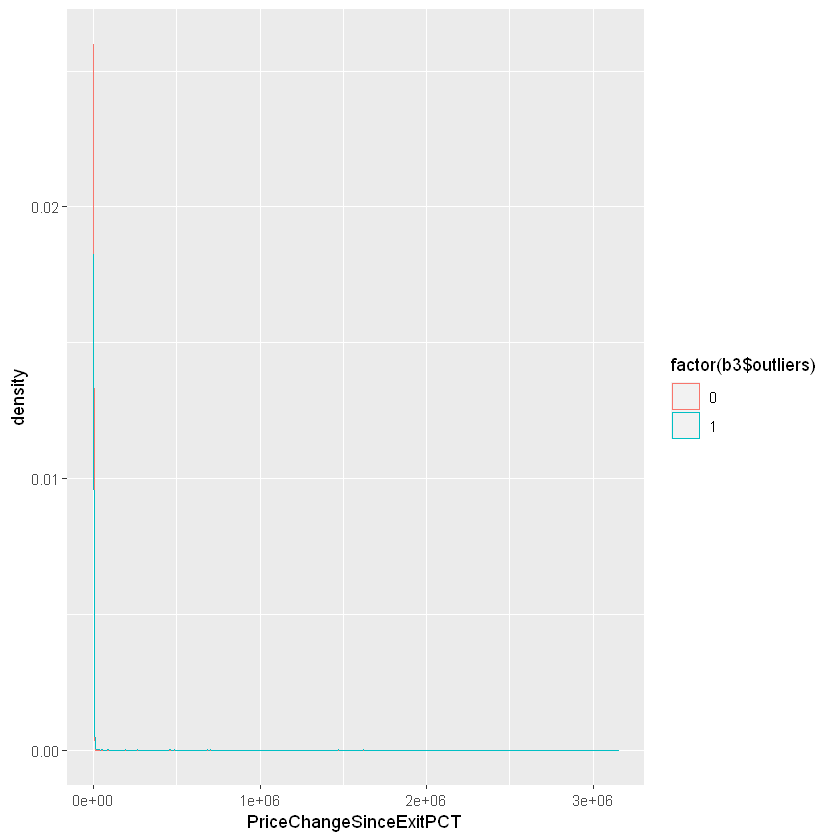

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 12206 rows containing non-finite values (stat_density)."
Joining, by = c("SeatsGained", "outliers")



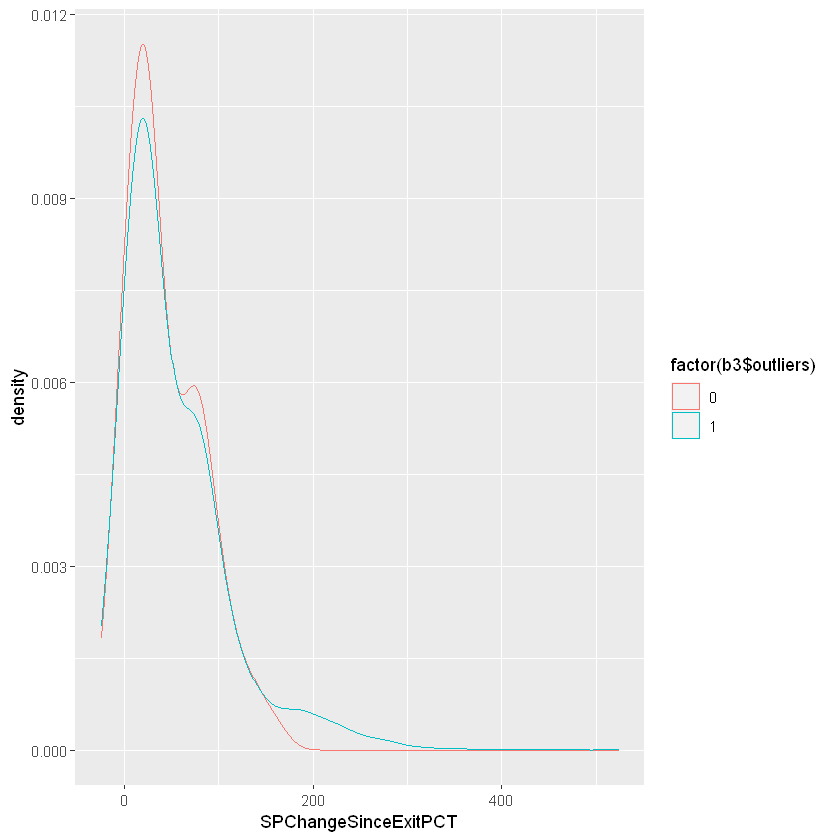

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 12255 rows containing non-finite values (stat_density)."


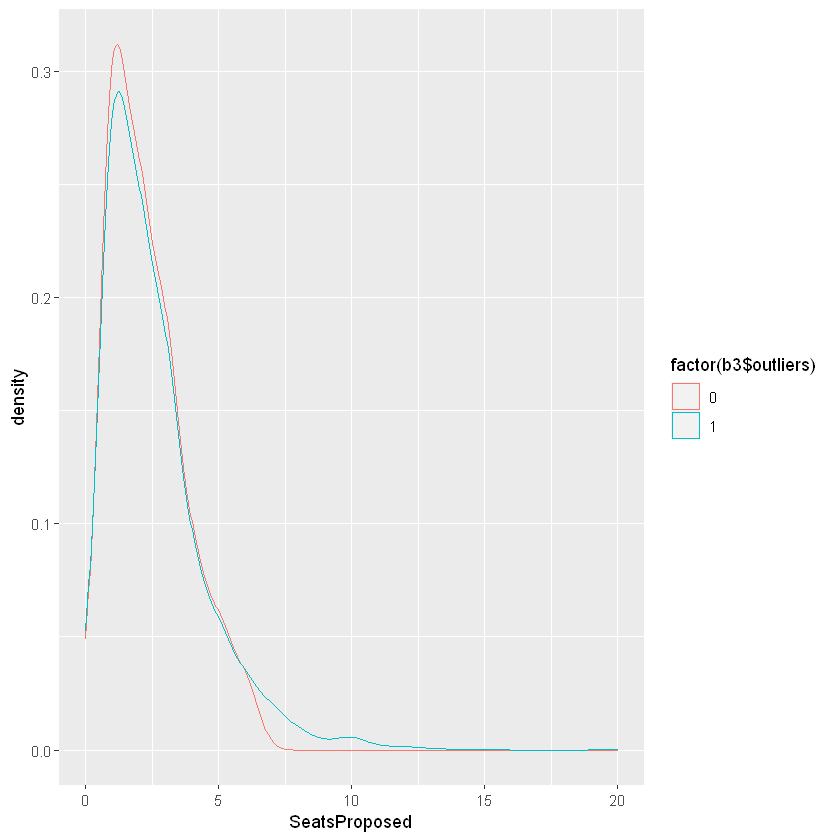

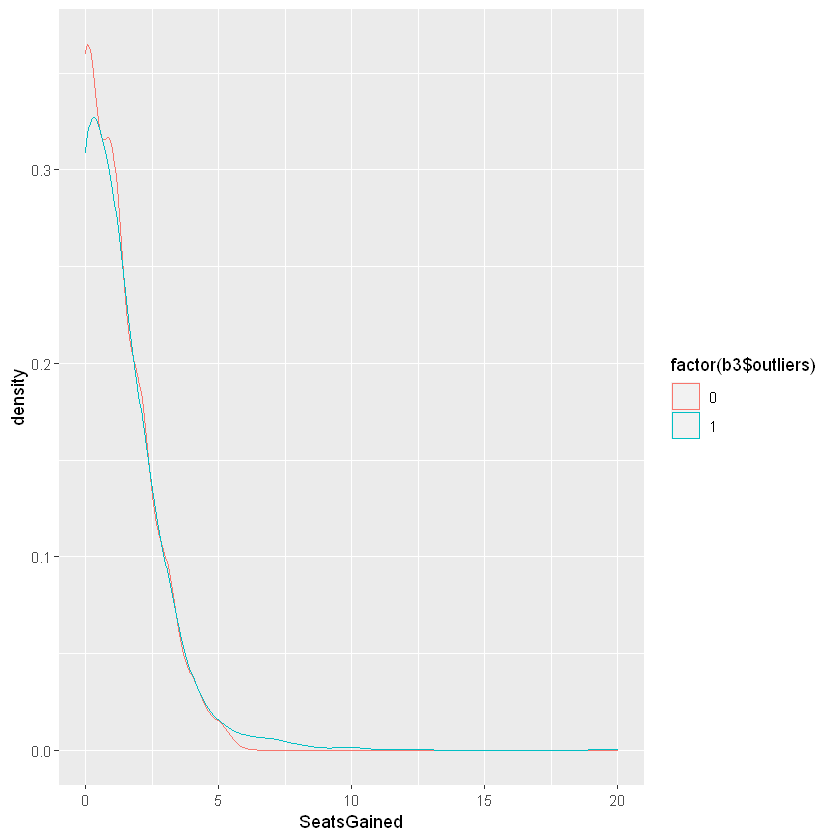

In [14]:
for (v in Activism_continuous) {
    b1 <- df %>% select(v) 
    b1$outliers <- 1
    b2 <- df %>% select(v) %>% filter(df_outliers[[paste(v,'out',sep='_')]]==0)
    b2$outliers <- 0
    b3 <- full_join(b1,b2)
    print(ggplot(b3,aes(x=b3[[v]], group=factor(b3$outliers),
                          color=factor(b3$outliers))) + xlab(v) +
    geom_density(adjust=2))
}


### Influence on outcome

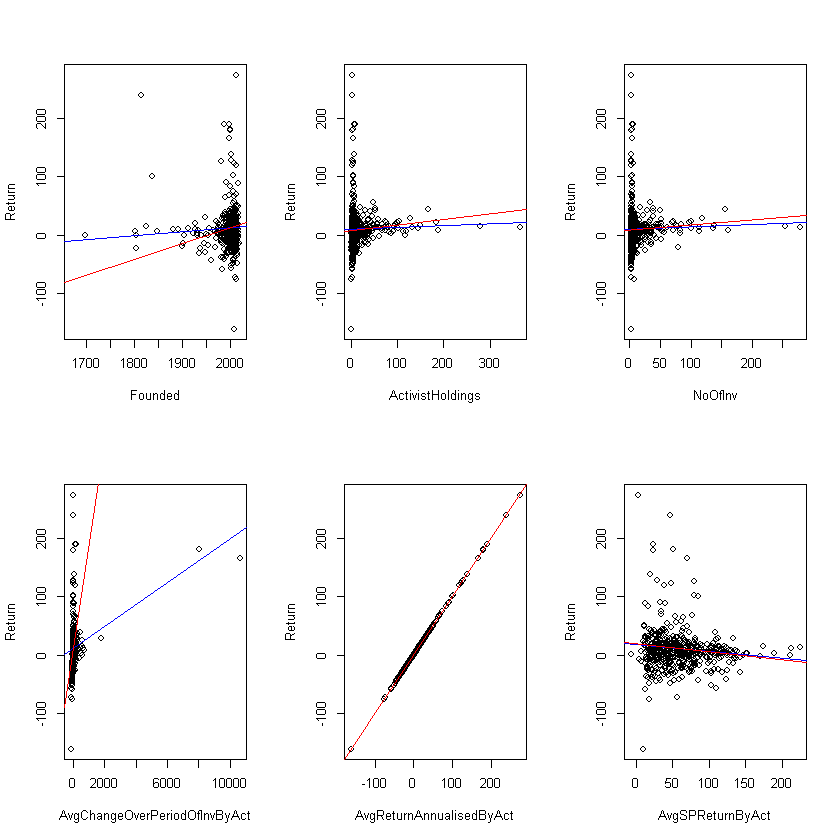

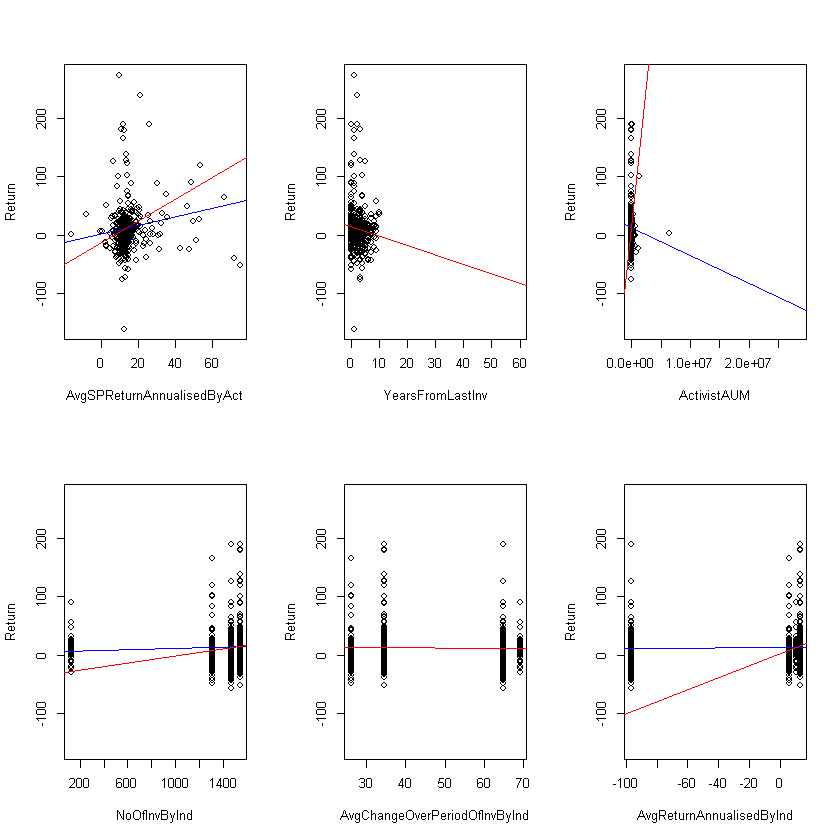

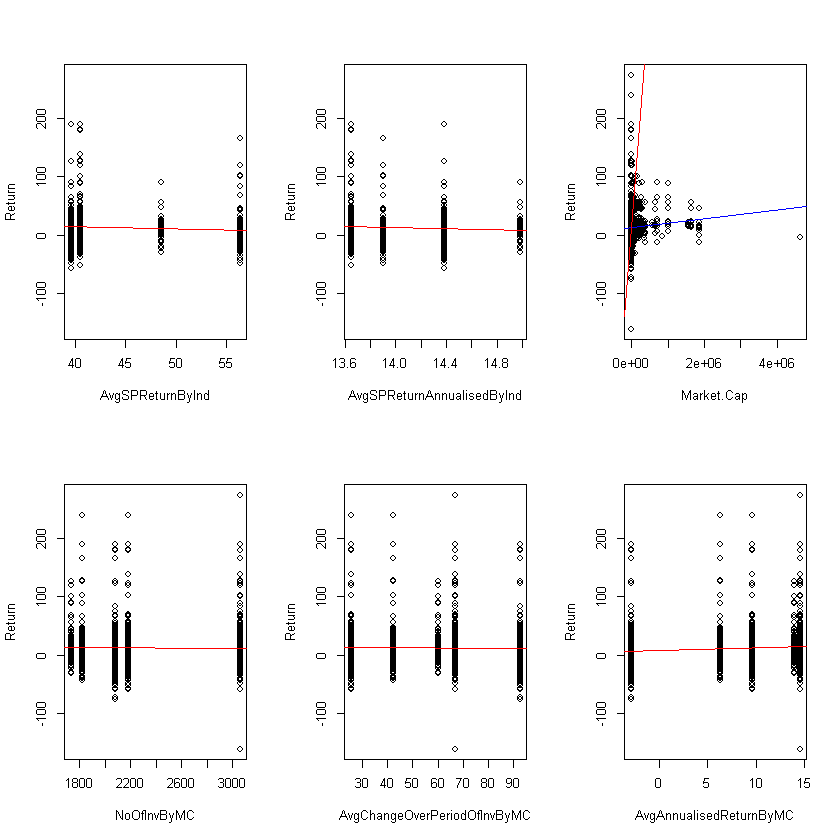

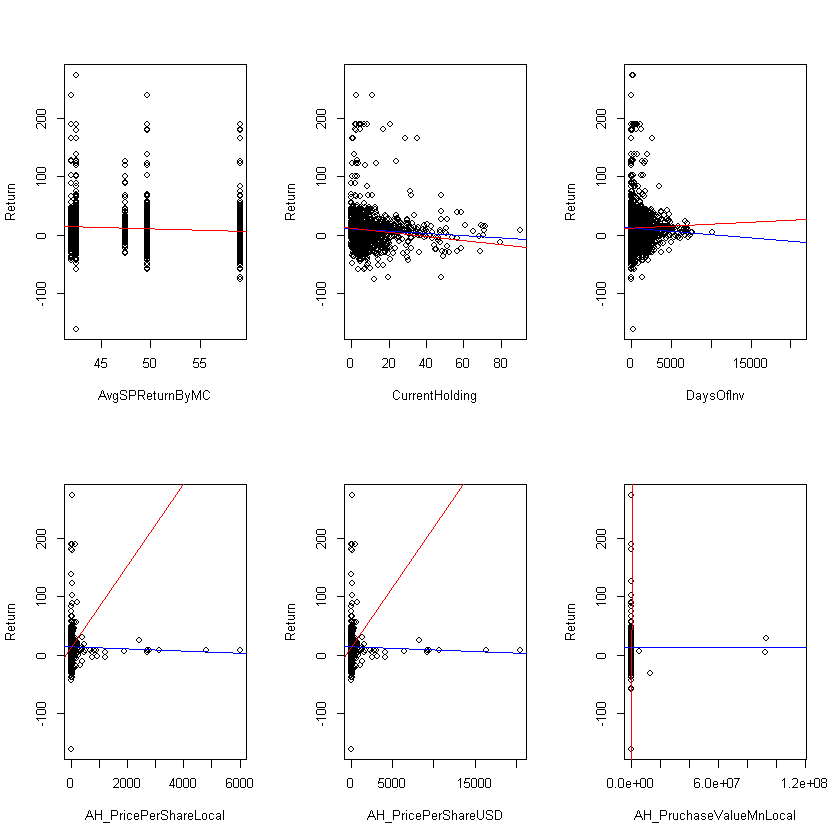

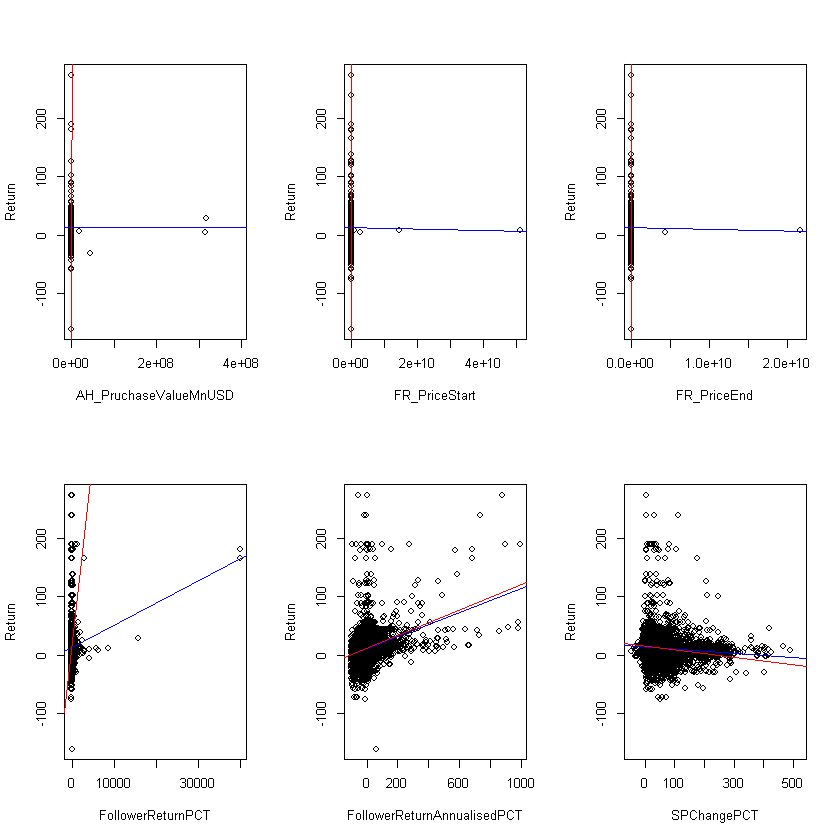

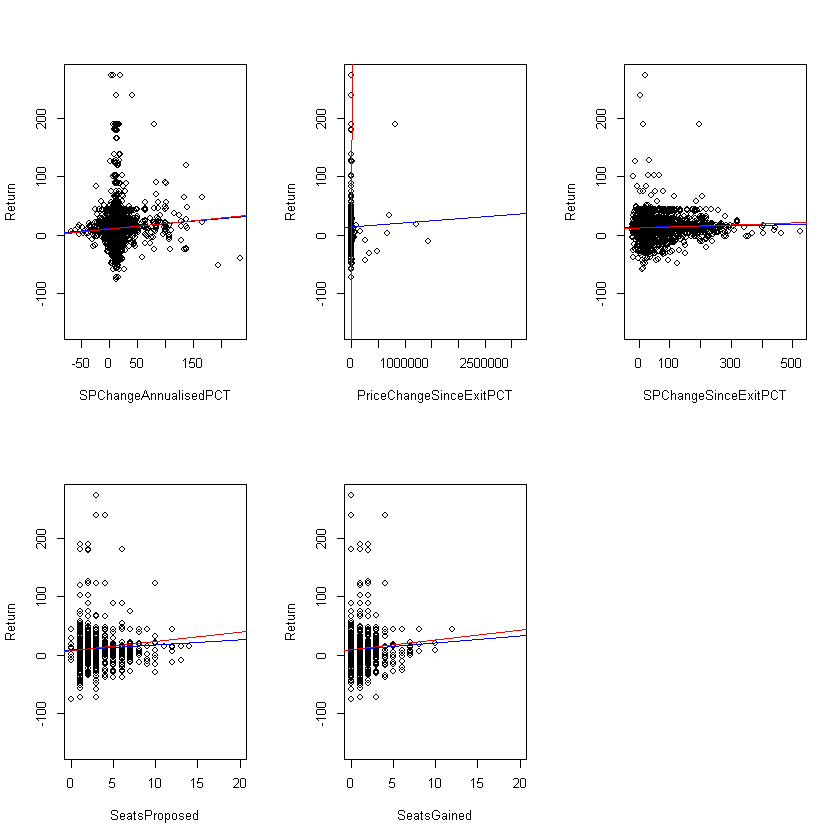

In [36]:
par(mfrow=c(2,3))
for (v in Activism_continuous){
            a1 <- min(df[[v]],na.rm=TRUE)
            a2 <- max(df[[v]],na.rm=TRUE)
            b1 <- df %>% select(AvgReturnAnnualisedByAct,v)   
            b2 <- df %>% select(AvgReturnAnnualisedByAct,v) %>% filter(df_outliers[[v]]==0) 
            plot (b1[[v]],b1$AvgReturnAnnualisedByAct,xlab=v,ylab='Return',xlim=c(a1,a2))
            abline(coef(lm(b1$AvgReturnAnnualisedByAct~b1[[v]])), col='blue')
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$AvgReturnAnnualisedByAct~b2[[v]])), col = "red")}
    }


<head>
<style>
table, th, td {
  border: 1px solid black;
  border-collapse: collapse;
}
</style>
</head>
<body>

<h2>Table with variables having outliers</h2>
<p>Comparing the distributions with/without outliers showed me that some of the distributions were about to change, transformation was done to avoid such case. In cases where the distribution and the result of the model didn’t change, I used categorization method.
Here are the conclusions for outliers’ treatment:</p>

<table>
<style>
th, td {
  padding: 15px;
}
th, tr, td {
  text-align: left;
}
table {
  border-spacing: 5px;
}
table, tr td:first-child {
  width: 100px;
}
table tr td:nth-child(2) {
  width: 200px;
}
table tr td:last-child {
  width: 300px;
}
</style>
  <tr>
    <th>Variable</th>
    <th>Treatment</th> 
    <th>Why</th>
  </tr>  
  <tr>
    <td>Founded</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>ActivistHoldings</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>NoOfInv</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgChangeOverPeriodOfInvByAct</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AvgSPReturnByAct</td>
    <td>Drop</td> 
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgSPReturnAnnualisedByAct</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>YearsFromLastInv</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>ActivistAUM</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>NoOfInvByInd</td>
    <td>Drop</td>
    <td>It changes the assumption but dosen't change the results</td>
  </tr>
  <tr>
    <td>AvgChangeOverPeriodOfInvByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgReturnAnnualisedByInd</td>
    <td>Leave</td>
    <td>It changes both the assumption the results</td>
  </tr>
  <tr>
    <td>AvgSPReturnByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
  <td>AvgSPReturnAnnualisedByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>Market.Cap</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>NoOfInvByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgChangeOverPeriodOfInvByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgAnnualisedReturnByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgSPReturnByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>CurrentHolding</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>DaysOfInv</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AH_PricePerShareLocal</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AH_PricePerShareUSD</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AH_PruchaseValueMnLocal</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AH_PruchaseValueMnUSD</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FR_PriceStart</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FR_PriceEnd</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FollowerReturnPCT</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FollowerReturnAnnualisedPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SPChangePCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SPChangeAnnualisedPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>PriceChangeSinceExitPCT</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>SPChangeSinceExitPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SPChangeSinceExitPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SeatsProposed</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SeatsGained</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
</table>

</body>



In [48]:
l1 <- Activism_continuous

In [62]:
#if(!require(dgof)) {install.packages("dgof");require(dgof)}

In [63]:
#x = df$NoOfInv
#y = df$AvgReturnAnnualisedByAct
#ks.test(x=x, y=y, alternative="two.sided",simulate.p.value=TRUE)

### Cleansed dataset for Outliers

In [49]:
## function which takes a dataframe and a vector of names and transforms outliers to NA
## at the features which are in the vector
outlierRepNAMatrix <- function(data,vec,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]]) & (v %in% vec)) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]]  > outhigh & v!='revenue',NA,data[[v]])
            outdata[v] <- mv
        } else {
            outdata[v] <- data[[v]]
        }
    }
    return(outdata)
}

In [50]:
df.noout <- outlierRepNAMatrix(df,l1) 

In [51]:
df.noout <- df.noout[,! names(df.noout) %in% c('row1')]

In [53]:
summary(df.noout)

  Investor.ID      Activist          ActivistHQ        ActivistRegion    
 Min.   :    2   Length:15141       Length:15141       Length:15141      
 1st Qu.: 5124   Class :character   Class :character   Class :character  
 Median : 5849   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 5600                                                           
 3rd Qu.: 6732                                                           
 Max.   :11052                                                           
 NA's   :1                                                               
    Founded     ActivistYaers     ActivistHoldings    NoOfInv      
 Min.   :1968   Min.   :-1.0000   Min.   :  1.00   Min.   :  3.00  
 1st Qu.:1994   1st Qu.: 0.0000   1st Qu.:  1.00   1st Qu.: 10.00  
 Median :2002   Median : 0.0000   Median : 10.00   Median : 30.00  
 Mean   :2001   Mean   :-0.0092   Mean   : 31.63   Mean   : 45.93  
 3rd Qu.:2009   3rd Qu.: 0.0000   3rd Qu.: 47.00   3rd Qu.: 71.00  


#### Categorizing quantity

In [134]:
table(df$quantity)


   0    1    2    3    4    5    6    7 
   1 1111  460   99   24   10    4    5 

In [135]:
df$quantity <- ifelse(is.na(df$quantity),'miss',
ifelse(df$quantity>=5,'5-7',as.character(df$quantity)))
table(df$quantity)


   0    1    2    3    4  5-7 miss 
   1 1111  460   99   24   19  470 

#### cleaning avg_recepit and avg_quantity

In [139]:
df$avg_receipt   <- avg_receipt.noout
df$avg_quantity  <- avg_quantity.noout

#### Transforming total_cancel12

In [140]:
mod1a <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$amount+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$amount+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

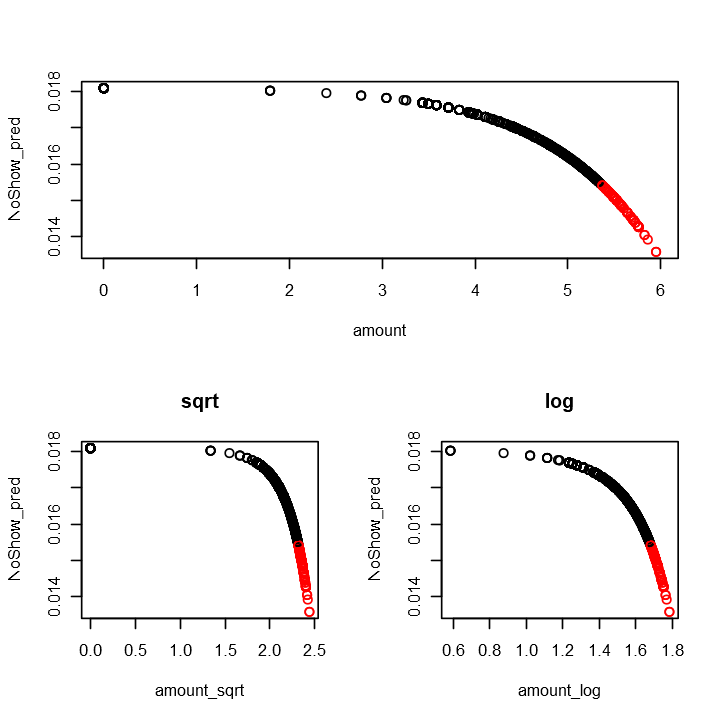

In [141]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$amount, pred5, col=factor(amount.out),xlab="amount",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$amount), pred5, col=factor(amount.out),xlab="amount_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$amount), pred5, col=factor(amount.out),xlab="amount_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

In [142]:
df$total_cancel12 <- log(df$total_cancel12+1)

## Missing values

In [54]:
getMissingness(df)

list(var = c(51, 52, 48, 50, 174, 165, 164, 39, 60, 59), na_count = c(13679, 13679, 13435, 13435, 12753, 12255, 12206, 11433, 10706, 9735), rate = c(90.3, 90.3, 88.7, 88.7, 84.2, 80.9, 80.6, 75.5, 70.7, 64.3))This dataset has 0 (0%) complete rows. Original data has 15141 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,13679,90.3
AH_PruchaseValueMnUSD,13679,90.3
AH_PricePerShareLocal,13435,88.7
AH_PricePerShareUSD,13435,88.7
Buyer,12753,84.2
SeatsGained,12255,80.9
SeatsProposed,12206,80.6
ThirteenD,11433,75.5
SPChangeSinceExitPCT,10706,70.7


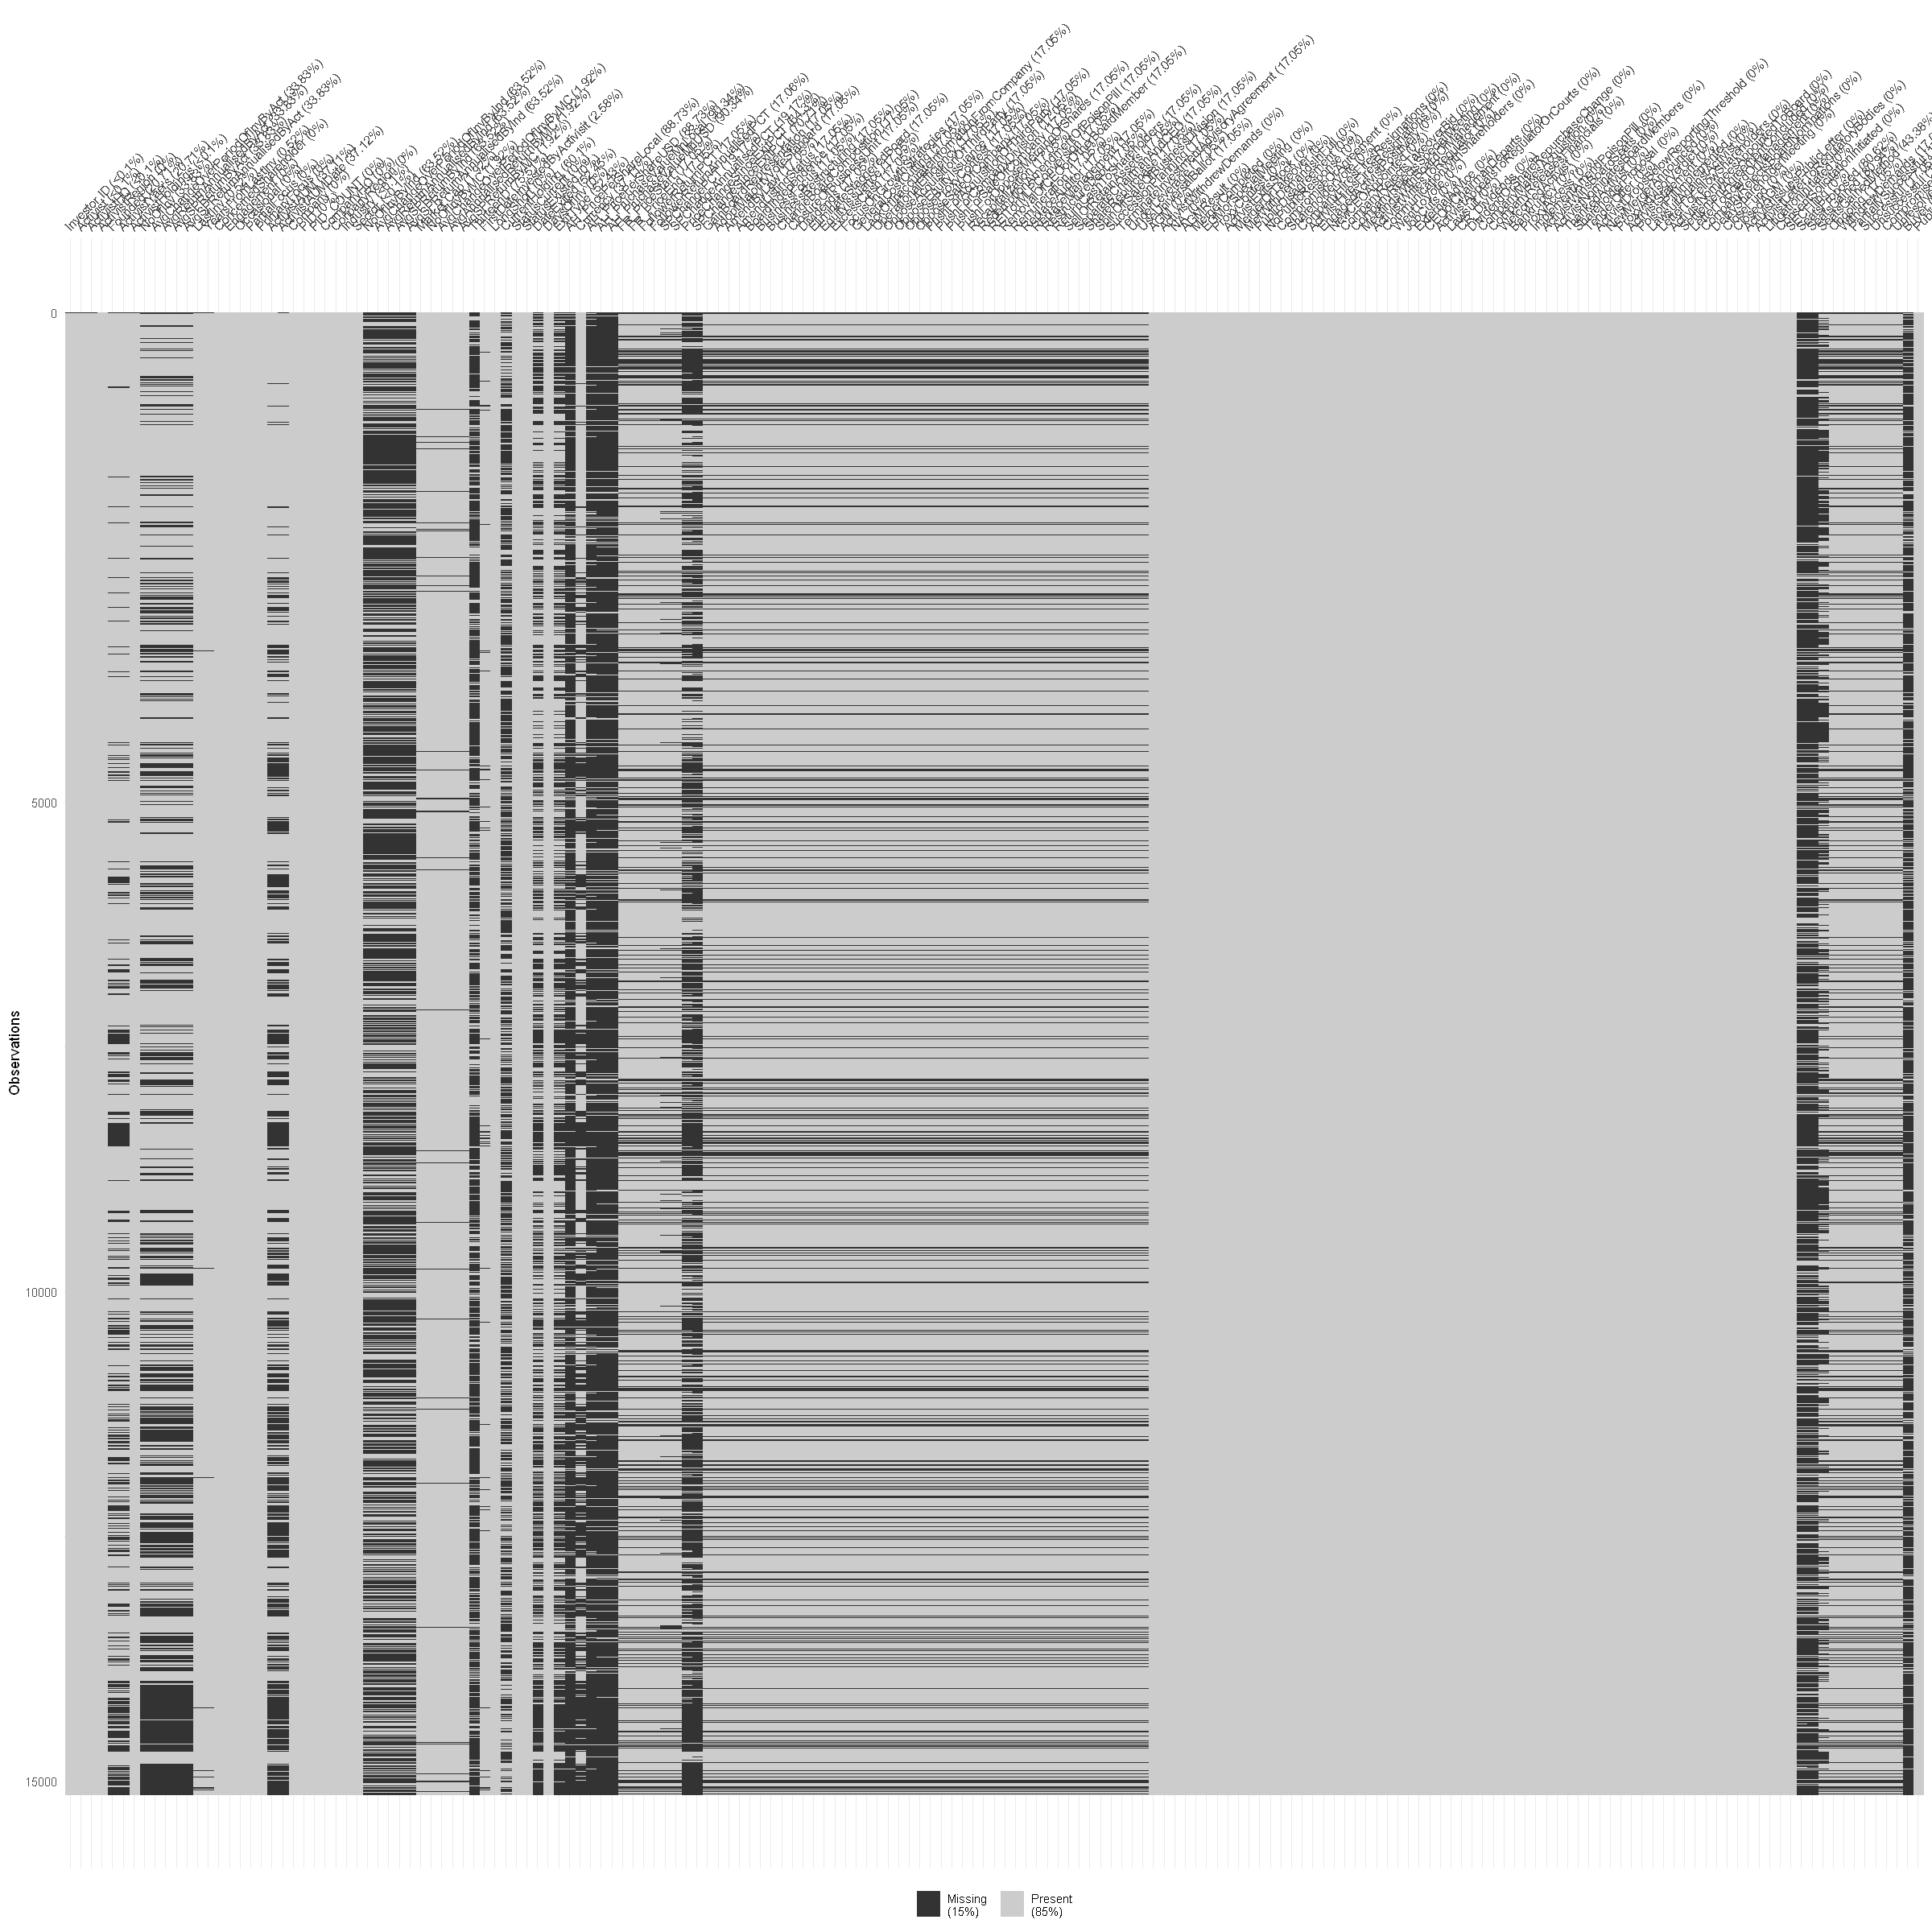

In [56]:
options(repr.plot.width = 20, repr.plot.height = 20)
vis_miss(df,warn_large_data=FALSE)

In [57]:
## remade the missing matrix to include the new missing values generated by the outliers treatment
df.na <- df.noout
for(i in names(df.noout)) {
    df.na[,i] <- ifelse(is.na(df.na[,i])==T,1,0)
}

In [58]:
missing <- getMissingness(df.noout)
missing

list(var = c(51, 52, 48, 50, 174, 164, 165, 39, 31, 60), na_count = c(13869, 13869, 13610, 13610, 12753, 12340, 12312, 11433, 10997, 10943), rate = c(91.6, 91.6, 89.9, 89.9, 84.2, 81.5, 81.3, 75.5, 72.6, 72.3))This dataset has 0 (0%) complete rows. Original data has 15141 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
AH_PruchaseValueMnLocal,13869,91.6
AH_PruchaseValueMnUSD,13869,91.6
AH_PricePerShareLocal,13610,89.9
AH_PricePerShareUSD,13610,89.9
Buyer,12753,84.2
SeatsProposed,12340,81.5
SeatsGained,12312,81.3
ThirteenD,11433,75.5
AvgReturnAnnualisedByInd,10997,72.6


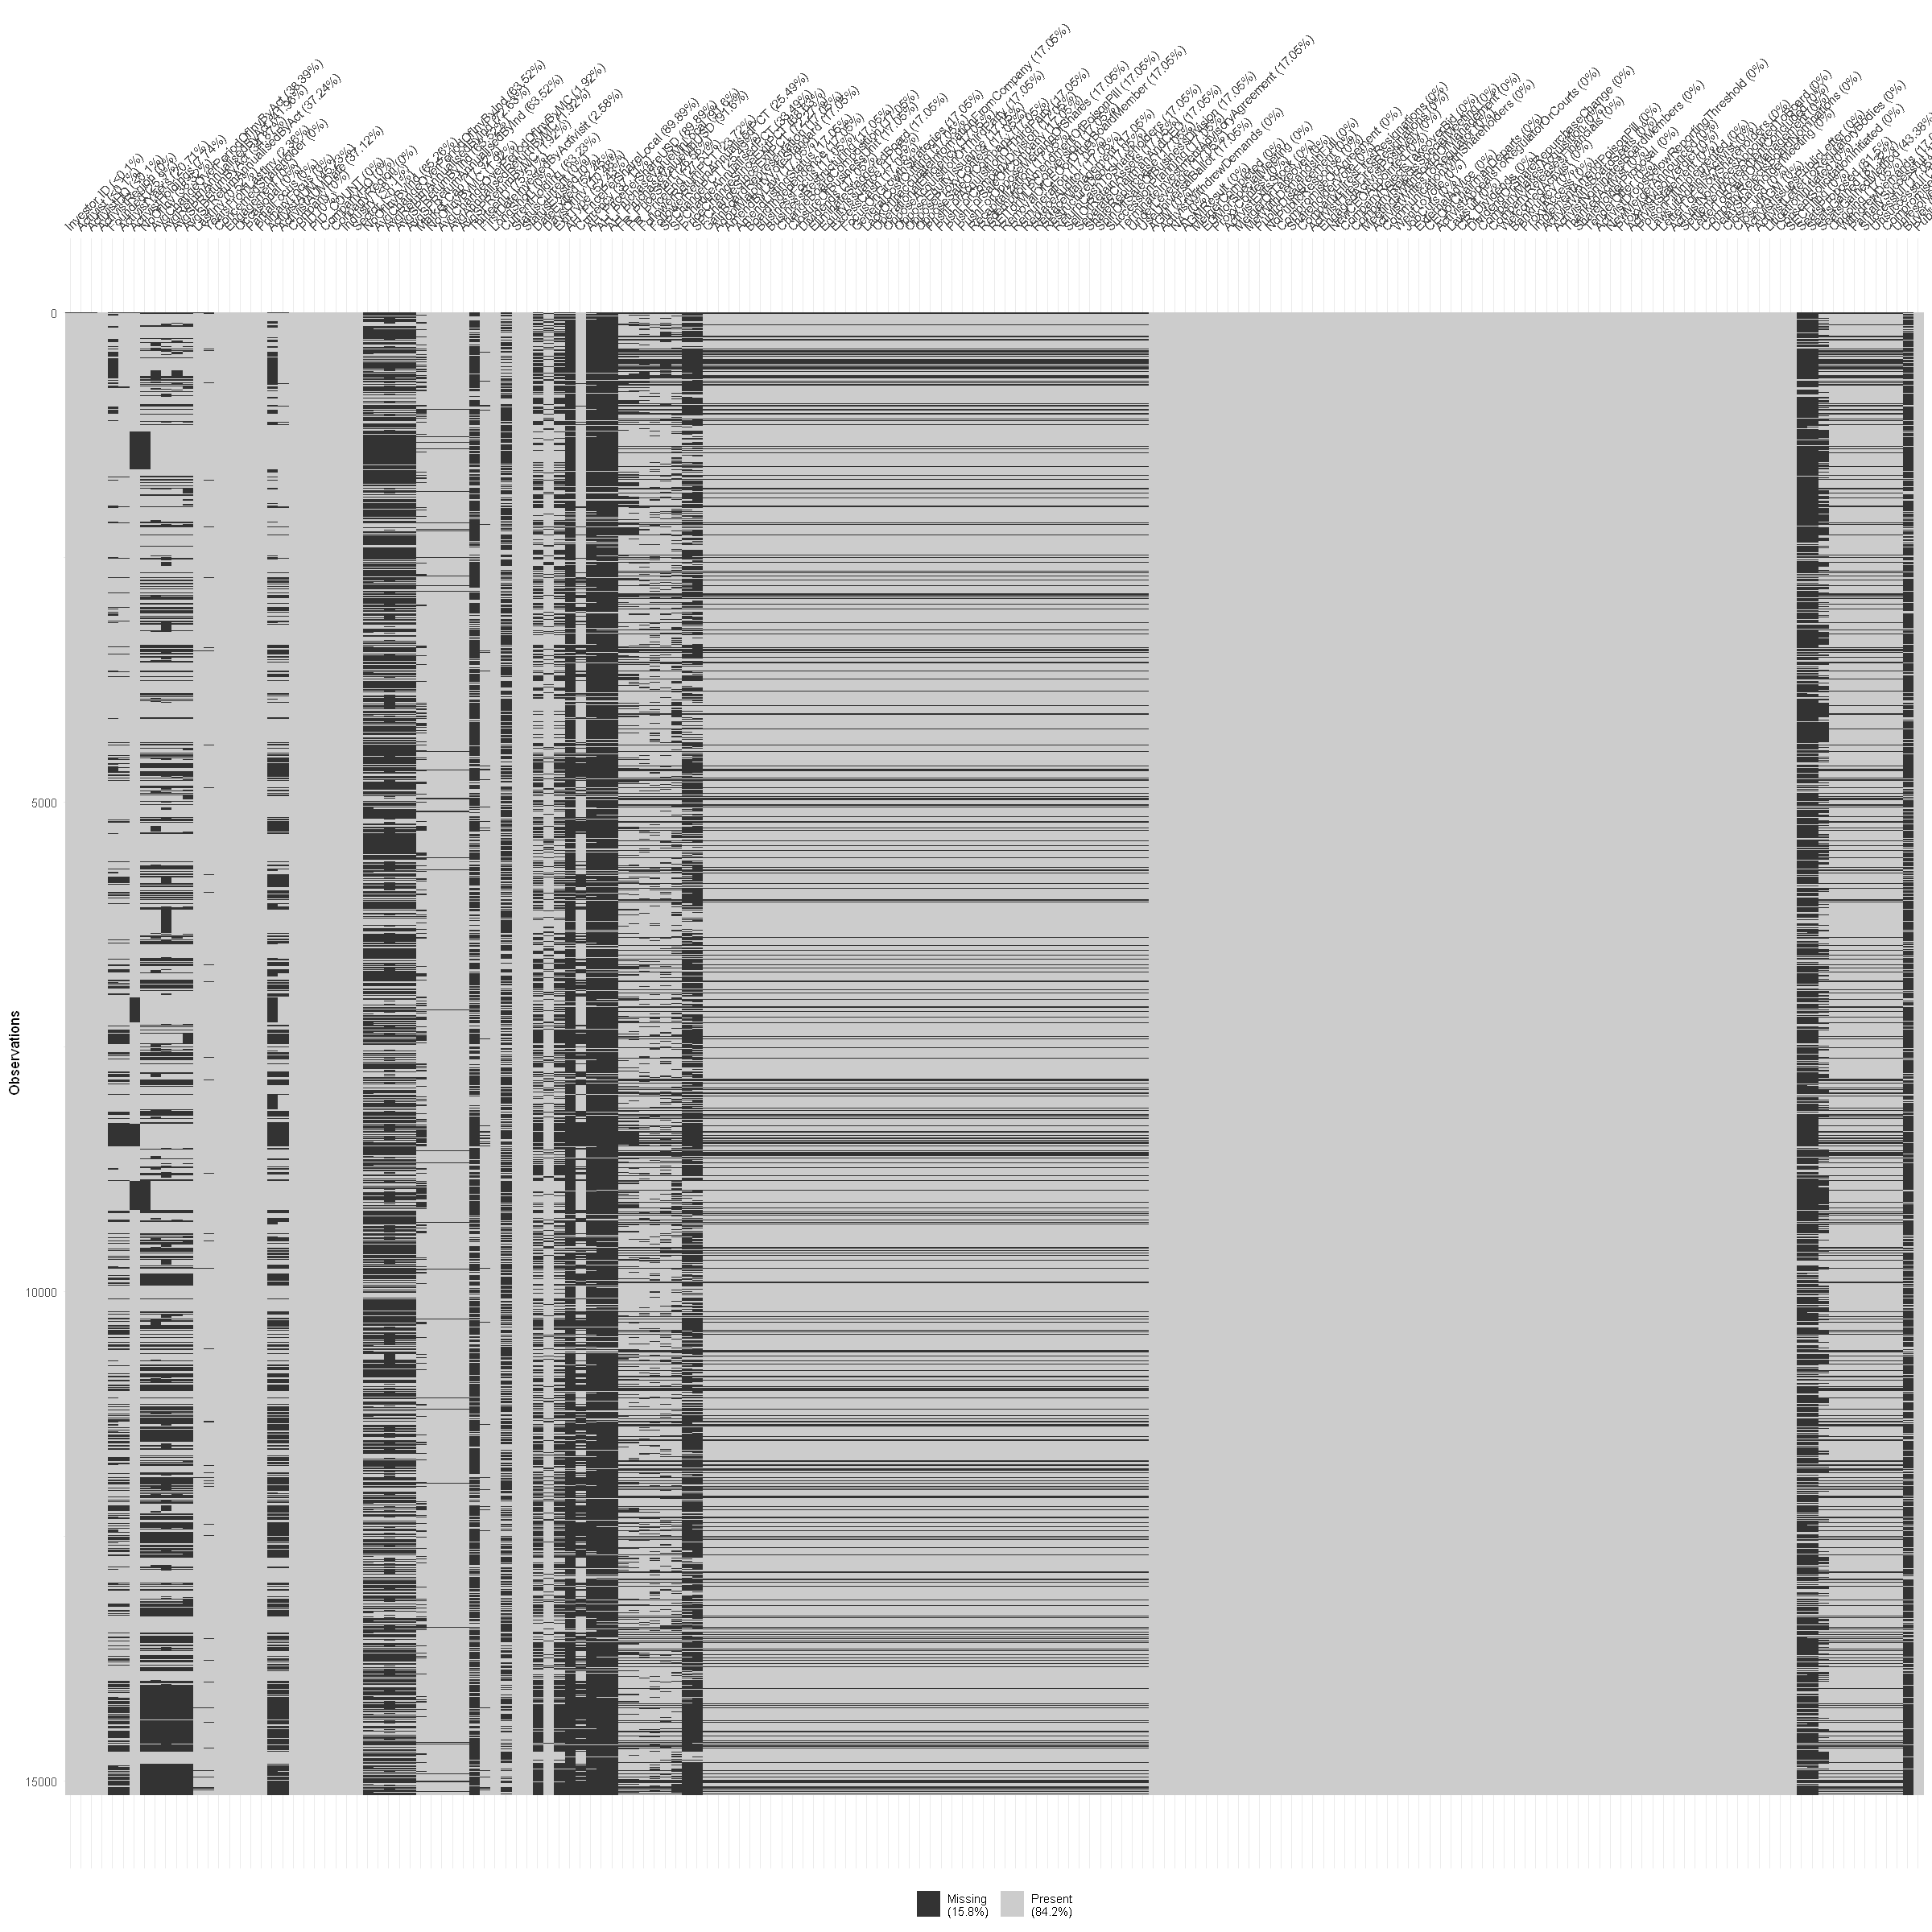

In [60]:
options(repr.plot.width = 20, repr.plot.height = 20)
vis_miss(df.noout, warn_large_data=FALSE)

## Determinate the Missingness Generation Mechanism
 
There are three mechanisms that generate Missing values:
 
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing not at Random (MNAR)
 
We will investigate the missingness mechanisms using different techniques.


Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


[1] "AH_PruchaseValueMnLocal by NA AH_PruchaseValueMnUSD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.8651, df = 189, p-value = 0.06372
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  -98839.59 3528041.92
sample estimates:
  mean of x   mean of y 
1715612.732    1011.571 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


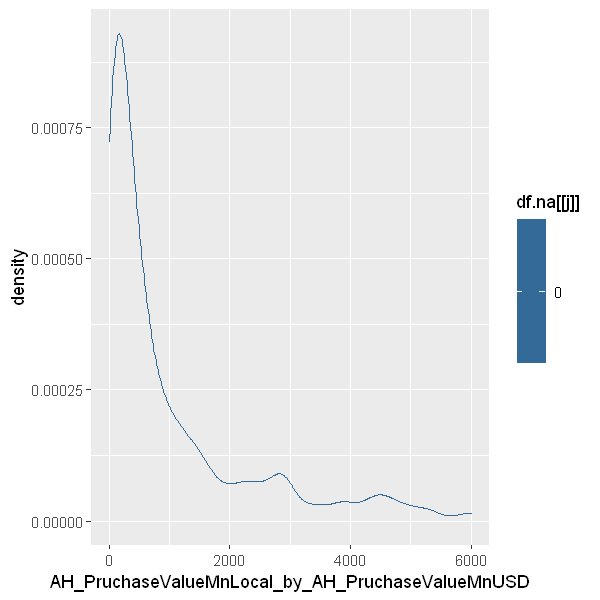

[1] "AH_PruchaseValueMnLocal by NA AH_PricePerShareLocal"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.61593, df = 383.63, p-value = 0.5383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -467338.1  893705.2
sample estimates:
mean of x mean of y 
 394736.2  181552.6 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


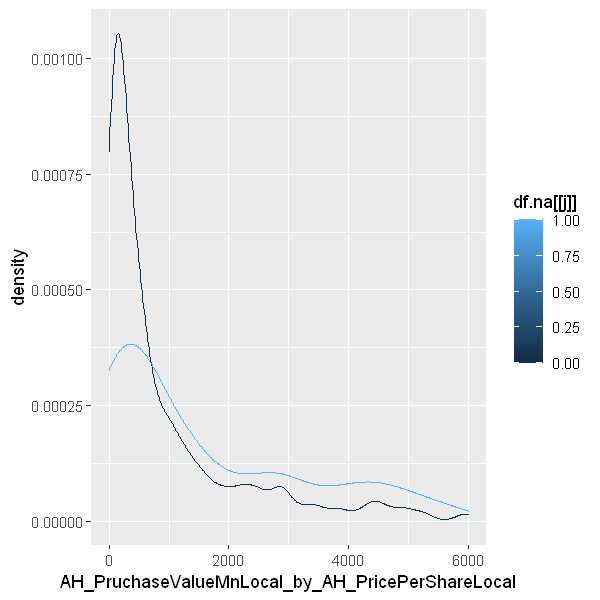

[1] "AH_PruchaseValueMnLocal by NA AH_PricePerShareUSD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.61593, df = 383.63, p-value = 0.5383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -467338.1  893705.2
sample estimates:
mean of x mean of y 
 394736.2  181552.6 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


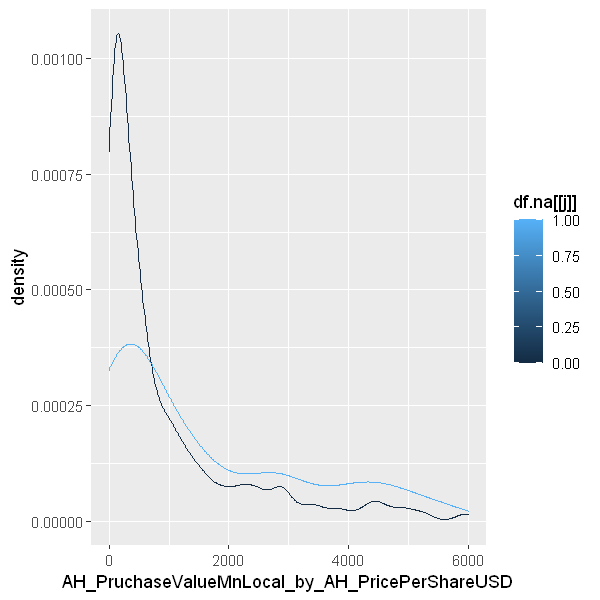

[1] "AH_PruchaseValueMnLocal by NA Buyer"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.67807, df = 7.4273, p-value = 0.5183
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1172698  2131165
sample estimates:
mean of x mean of y 
 700450.1  221217.0 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


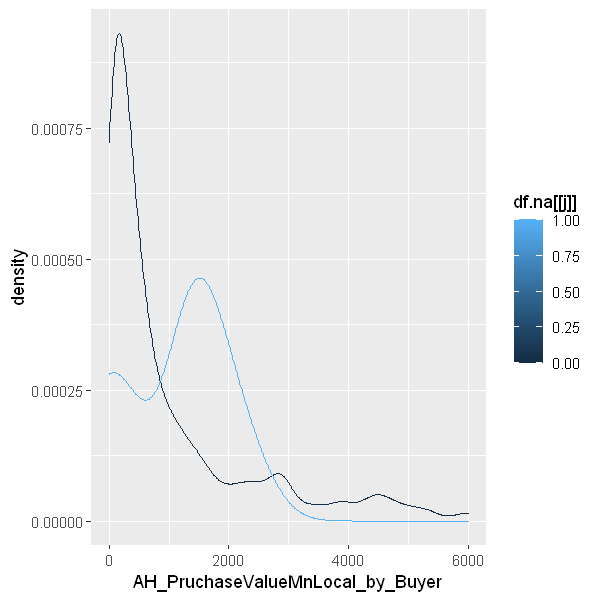

[1] "AH_PruchaseValueMnLocal by NA SeatsProposed"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.8369, df = 1186.1, p-value = 0.06648
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18506.4 562078.4
sample estimates:
 mean of x  mean of y 
274961.893   3175.891 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


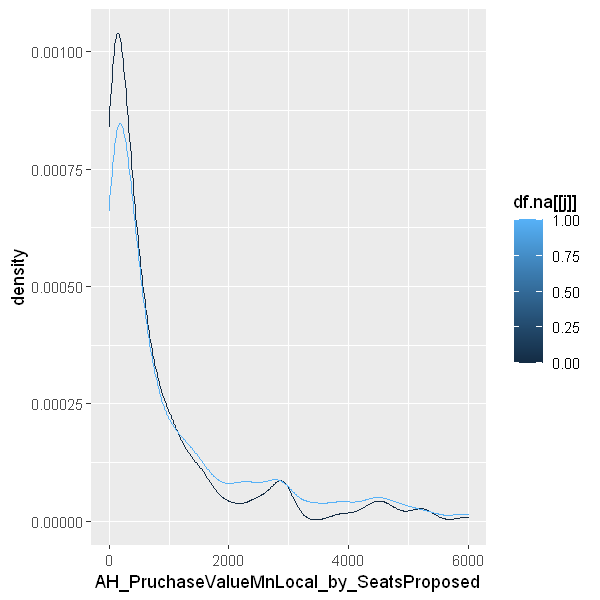

[1] "AH_PruchaseValueMnLocal by NA SeatsGained"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.8367, df = 1169.1, p-value = 0.06651
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18811.58 570208.36
sample estimates:
 mean of x  mean of y 
278903.603   3205.212 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


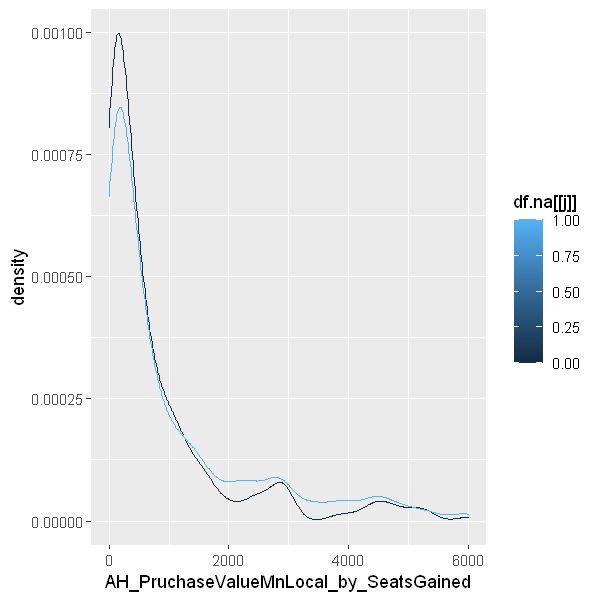

[1] "AH_PruchaseValueMnLocal by NA ThirteenD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.28282, df = 1334.8, p-value = 0.7774
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -395025.7  528113.5
sample estimates:
mean of x mean of y 
 248645.4  182101.5 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


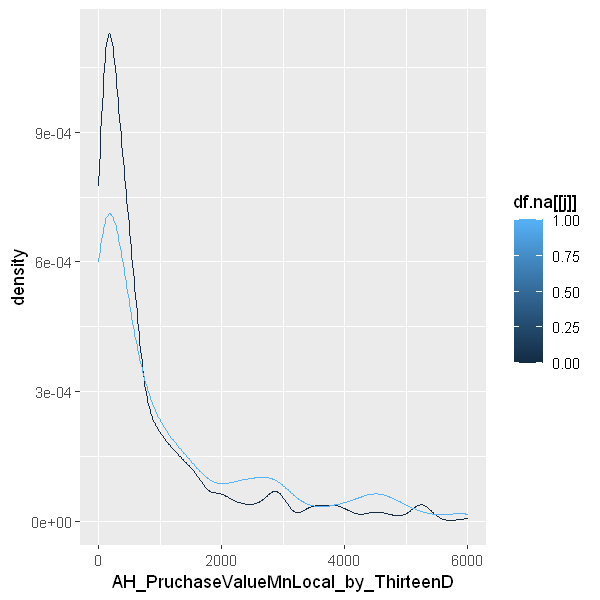

[1] "AH_PruchaseValueMnLocal by NA AvgReturnAnnualisedByInd"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.0015, df = 562.31, p-value = 0.317
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -970236.8  314959.9
sample estimates:
mean of x mean of y 
 117390.5  445028.9 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


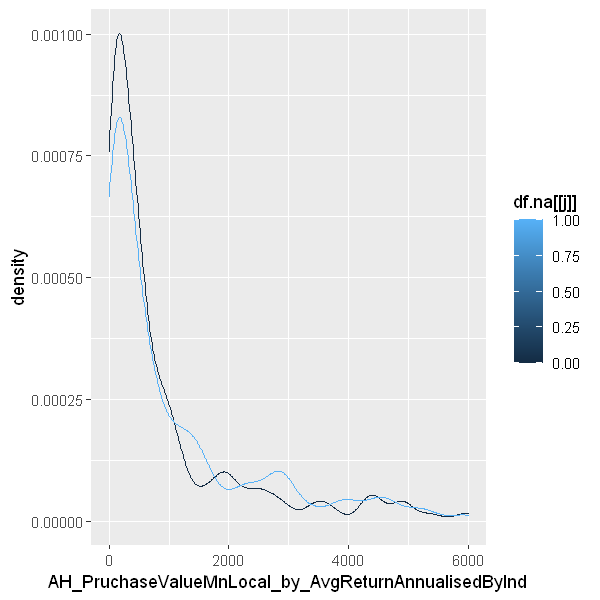

[1] "AH_PruchaseValueMnLocal by NA SPChangeSinceExitPCT"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.2132, df = 352.9, p-value = 0.2259
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1449706.1   343513.2
sample estimates:
mean of x mean of y 
 98617.11 651713.54 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


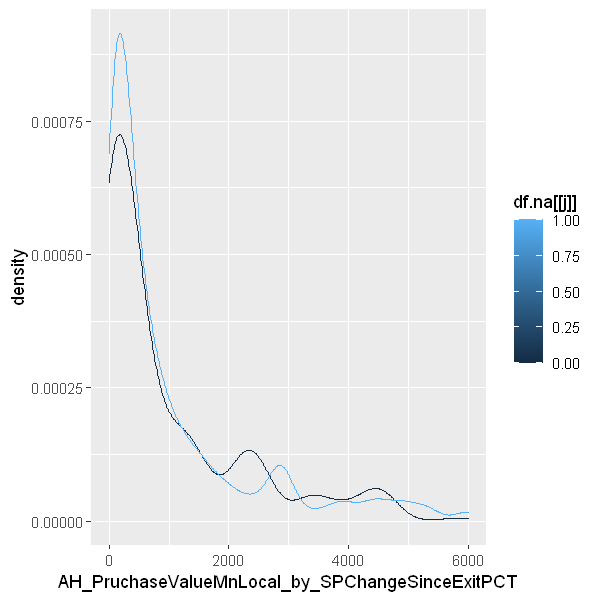

[1] "AH_PruchaseValueMnLocal by NA PriceChangeSinceExitPCT"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.69852, df = 1231.3, p-value = 0.485
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -302915.1  637877.4
sample estimates:
mean of x mean of y 
 307121.7  139640.5 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


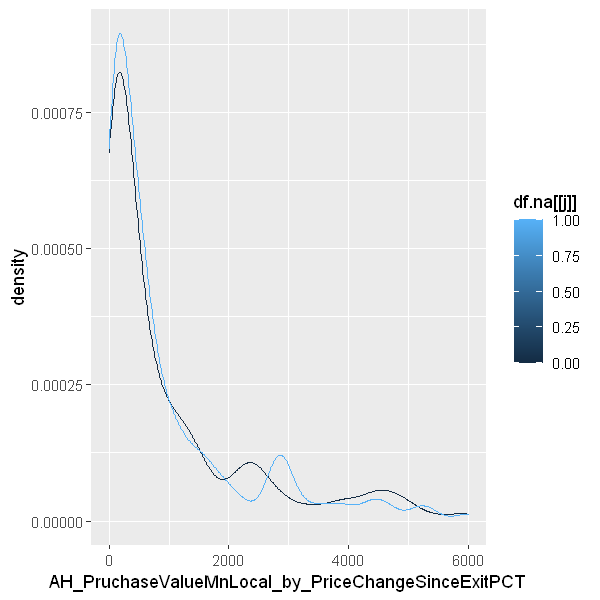

[1] "AH_PruchaseValueMnLocal by NA NoOfInvByInd"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -0.82353, df = 823.51, p-value = 0.4104
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -755894.4  309076.4
sample estimates:
mean of x mean of y 
 132458.7  355867.6 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


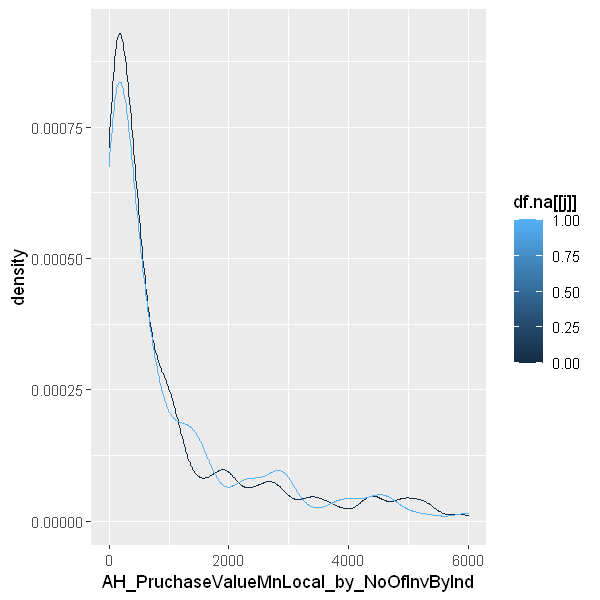

[1] "AH_PruchaseValueMnLocal by NA AvgChangeOverPeriodOfInvByInd"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -0.7937, df = 868.56, p-value = 0.4276
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -732890.6  310820.2
sample estimates:
mean of x mean of y 
 135066.0  346101.2 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


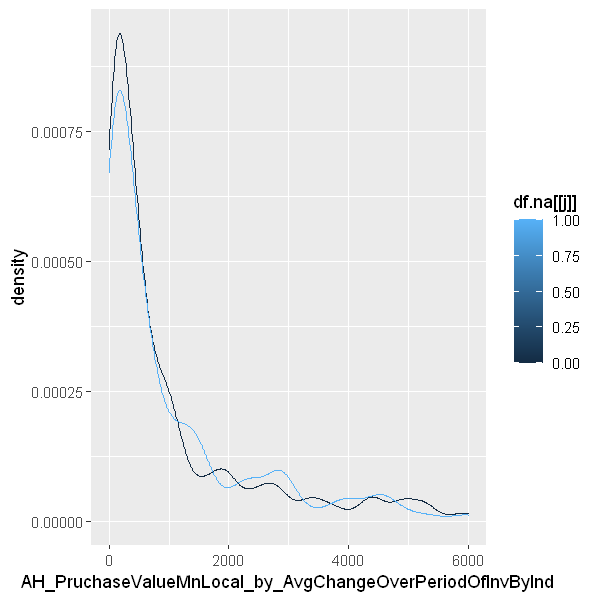

[1] "AH_PruchaseValueMnLocal by NA AvgSPReturnByInd"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -0.7937, df = 868.56, p-value = 0.4276
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -732890.6  310820.2
sample estimates:
mean of x mean of y 
 135066.0  346101.2 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


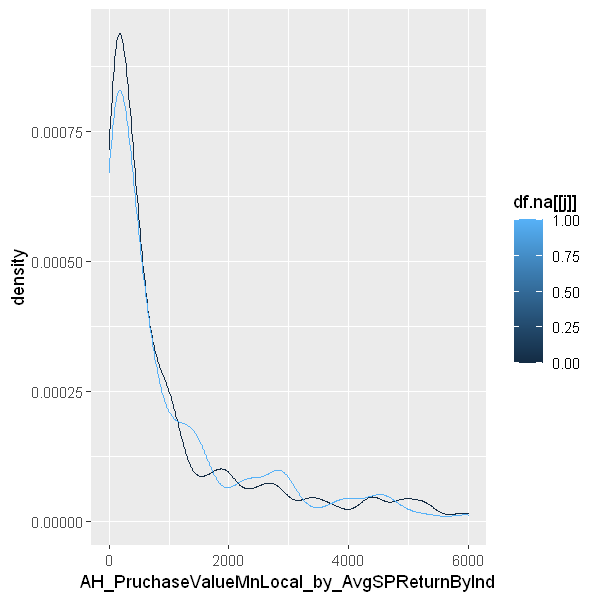

[1] "AH_PruchaseValueMnLocal by NA AvgSPReturnAnnualisedByInd"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -0.7937, df = 868.56, p-value = 0.4276
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -732890.6  310820.2
sample estimates:
mean of x mean of y 
 135066.0  346101.2 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 13869 rows containing non-finite values (stat_density)."


[1] "AH_PruchaseValueMnLocal by NA CurrentHolding"


ERROR: Error in t.test.default(b1[[i]], b2[[i]]): not enough 'y' observations


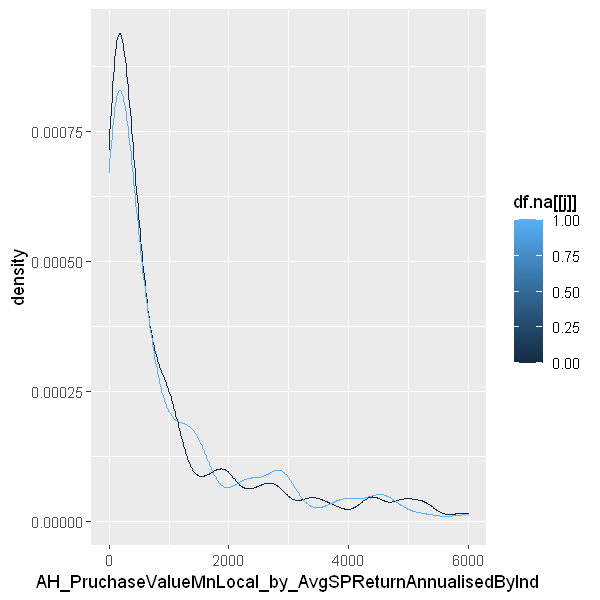

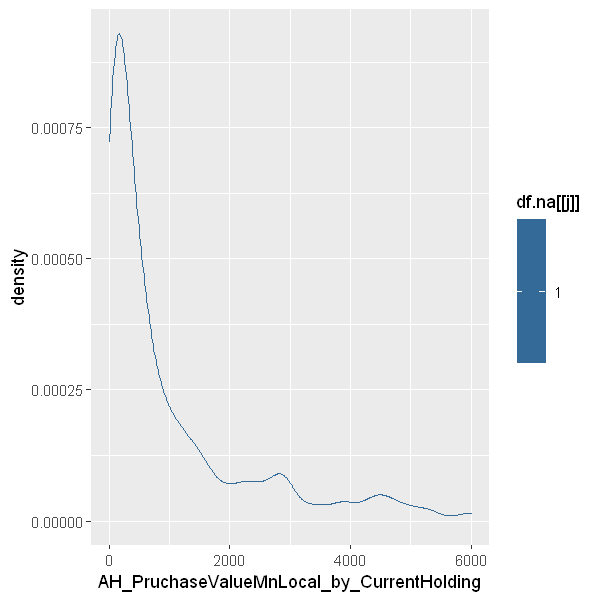

In [62]:
options(repr.plot.width = 5, repr.plot.height = 5)
for (i in (missing$missingness$var)) {
    for (j in (missing$missingness$var)) {
       if(i!=j){
           print(ggplot(df.noout,aes(x=df.noout[[i]],
                                     group=df.na[[j]],
                                     color=df.na[[j]]))+
                 geom_density()+
                 labs(x=paste(i,'_by_',j,sep='')))     
           b1 <- df %>% select (i,j) %>% filter(df.na[j]==1)
           b2 <- df %>% select (i,j) %>% filter(df.na[j]==0)
           print(paste(i,' by NA ', j,sep=''))
           print(t.test(b1[[i]],b2[[i]]))
           
       } 
    }
}


By the distribution above and the t-test I assume that the missing mechanism is MNAR

| Variable                     | Mechanism | Treatment               |
|------------------------------|-----------|-------------------------|
| amount                       | MAR       | Imputation              |
| time_booked                  | MAR       | Imputation              |
| avg_receipt                  | MNAR      | Categorize              |
| avg_quantity                 | MNAR      | Categorize              |

In [64]:
install.packages("finalfit")

also installing the dependencies 'glue', 'tibble', 'dplyr', 'tidyselect', 'tidyr'


Warning message:
"packages 'tibble', 'dplyr' are in use and will not be installed"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\user\anaconda3\envs\rstudio\lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\user\anaconda3\envs\rstudio\lib\R\library\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\user\anaconda3\envs\rstudio\lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\user\anaconda3\envs\rstudio\lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"
Warning message:
"restored 'tidyselect'"


package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\user\anaconda3\envs\rstudio\lib\R\library\00LOCK\tidyr\libs\x64\tidyr.dll to C:\Users\user\anaconda3\envs\rstudio\lib\R\library\tidyr\libs\x64\tidyr.dll: Permission denied"
Warning message:
"restored 'tidyr'"


package 'finalfit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpgnmF6D\downloaded_packages


In [71]:
install.packages("tibble")

Warning message:
"package 'tibble' is in use and will not be installed"


In [68]:
library(finalfit) 
explanatory = setdiff(names(df.noout),"AvgReturnAnnualisedByAct")
dependent = df.noout$AvgReturnAnnualisedByAct
ff_glimpse(dependent, explanatory)

Warning message:
"package 'finalfit' was built under R version 3.6.3"


ERROR: Error: package or namespace load failed for 'finalfit' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'tibble' 2.1.1 is already loaded, but >= 3.0.0 is required


#### Categorize avg_receipt 

In [163]:
table(df$avg_receipt)
summary(df$avg_receipt)


               0                5 13.3333333333333               15 
            1042                1                1                2 
              25               30               32             33.5 
               1               46                8                1 
           33.75               35 38.3333333333333               40 
               1               31                1               69 
              41 41.4285714285714 41.6666666666667             42.5 
               4                1                2                9 
43.3333333333333               44               45               46 
               4                2               30                4 
           46.25 46.6666666666667             46.8 46.9230769230769 
               1                6                1                9 
            47.2             47.5 47.6363636363636 47.6666666666667 
               1                1                1                1 
              48 48.1538461538462

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   30.00   37.27   67.22  174.93      79 

In [164]:
df$avg_receipt <- ifelse(is.na(df$avg_receipt),'miss',quantile(df$avg_receipt, probs = seq(0, 1, 0.25), na.rm = TRUE,
         names = TRUE))
table(df$avg_receipt)


               0 174.933333333333               30 67.2222222222222 
             844              424              420              417 
            miss 
              79 

In [165]:
table(df$avg_receipt)


               0 174.933333333333               30 67.2222222222222 
             844              424              420              417 
            miss 
              79 

#### Categorize avg_quantity

In [166]:
table(df$avg_quantity)
summary(df$avg_quantityantity)


               0                1              1.1 1.11111111111111 
            1033              596                1                2 
           1.125 1.16666666666667              1.2 1.22222222222222 
               1                2                7                3 
            1.25 1.26666666666667 1.27272727272727 1.28571428571429 
              21                3                1                4 
             1.3 1.30769230769231 1.33333333333333            1.375 
               1                1               35                3 
1.38461538461538              1.4 1.41666666666667 1.42857142857143 
               2               11                2                1 
1.44444444444444 1.45454545454545              1.5 1.55555555555556 
               2                5               76                3 
1.57142857142857              1.6            1.625 1.63636363636364 
               4                3                5                2 
1.66666666666667 1.69230769230769

Length  Class   Mode 
     0   NULL   NULL 

In [167]:
df$avg_quantity <- ifelse(is.na(df$avg_quantity),'miss',quantile(df$avg_quantity, probs = seq(0, 1, 0.25), na.rm = TRUE,
         names = TRUE))
table(df$avg_quantity)


   0    1  1.1    3 miss 
 869  435  435  434   11 

In [168]:
getMissingness(df)

list(var = c(53, 9), na_count = c(470, 276), rate = c(21.5, 12.6))This dataset has 1659 (76%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
amount,470,21.5
time_booked,276,12.6


#### Imputing the missing data using MICE

Converting time_booked to minutes

In [169]:
ch <- times(df$time_booked)
60 * hours(ch) + minutes(ch)

[1]   NA 1080  640  790   NA  660  810  990  790   NA  860 1010  930   NA
  [15]  960  840  990 1060  660  900  760  600   NA  920  700  820  840  820
  [29] 1080  720  930  750  710  670  930  660 1020   NA  960  930  780  660
  [43]  660  770  800  820 1140  640   NA  870  660  720  990 1050   NA  660
  [57] 1080  540  850 1050 1020  980  870  950  810  890   NA  700  870  600
  [71]  670   NA  600  780 1020   NA   NA 1030  840  930  820  810  600  630
  [85]  750  600  690  600  680  780  870  600  690  910  920  840  900  870
  [99]  780  930  670  990  960 1130  960 1000  870  780  780  960  600  780
 [113]  900  680  810  570  840  880  670  760  860  900  660  800  660  480
 [127]  540 1010  710   NA  600  840  660  750  560   NA 1110   NA   NA  660
 [141]  780  770  660  900  690   NA  970   NA  910  660  810  980 1110 1110
 [155]   NA  860 1020  900  960  840  840  590  900  590  610  600  540  590
 [169]  720  840  570  660  750  810  840   NA  700  810 1140  830  490 1020
 [183]  540  660   NA  780  840  500  770   NA  840  990 1020 1030  760  610
 [197]  650  660  940  870  700  900  620  720  630  720  680  770  600  810
 [211]  750  900  970  980  790  780   NA   NA  600  740   NA  960   NA   NA
 [225]  970   NA  640  840  590  840  840  840  840  840  780 1050 1080 1080
 [239] 1100  960   NA  780 1080   NA 1080  780 1080 1070 1030 1060  900  920
 [253] 1040  660  720  870  680  760  660 1030 1110 1020  780  850  540  610
 [267]  990 1020 1020 1100   NA  960  500  780  660  480  720 1030  840 1080
 [281] 1130   NA 1020  660  710   NA  760  840  890 1080   NA 1060  780 1070
 [295]  990   NA 1100  630  690 1050   NA   NA  960   NA 1000 1050 1060   NA
 [309] 1080   NA  920   NA 1030   NA  540 1020  540  480  820  890  770 1050
 [323] 1110 1140 1050 1130 1150  760  600  870   NA  900  820  600  600  720
 [337]  600  600  600  600  990  600  960  720  590  650   NA  680  910  840
 [351]  600  730  840 1140  660  920 1080 1030 1020  800  720  780  510  750
 [365]  880 1030 1140  810  910  720  530  480   NA 1140  480  510  780  590
 [379]  770  780  850  960  770  690  750  980  630   NA  630  730  540  910
 [393]  760  840  750  600  870  940  540  550  550  550  550  550 1110 1110
 [407]  630  480  490   NA  900  680  600  780  670  850  690  720  800  900
 [421]  620  810  900  810  910 1060 1000 1020  780  810  670  700  570  620
 [435] 1020   NA 1110  780  840  790 1080 1080   NA  960  720  640 1080  900
 [449]   NA 1000 1080   NA  860  900  980  960  960  760  830  660  960  500
 [463]  600 1050 1040  960  780  630  650  950   NA  900  620  900  910 1080
 [477]  560  830  840   NA 1080  670  840   NA  600  920 1010  920  780  870
 [491]   NA  840  630  680  800   NA 1050 1080  690  720  900   NA   NA   NA
 [505]   NA   NA  510  720 1140  900   NA   NA 1140 1090 1030  810  840  940
 [519]  960 1020   NA  640  660   NA  640  550   NA  570  530   NA   NA  630
 [533]  690  780   NA 1000 1020  900  950  970 1010  760  690  540  620   NA
 [547]  990   NA  540  610 1020 1120  600  840   NA  630  900  560  660   NA
 [561]  600 1020 1020 1070  760  630  660 1050  770  660  660  840  970  720
 [575] 1140   NA  990  600   NA  690  780  540  680  600  600  540   NA 1050
 [589]  630  750  600  680   NA 1050 1140 1130 1050  840  780  900  540  780
 [603]  860 1020  880 1100  590  820  900 1110 1170   NA  880  900 1050 1050
 [617]  660 1050 1050  510  540  500  600  680  960  720  780  780  790  720
 [631]  810  600  670  680  770 1040 1140  690 1110   NA   NA  480  810  870
 [645]  790  790  650   NA  660  600  900  600  700  660  590  720  750  630
 [659]  630  700  630  650  930  540  550  840  600  630  610  600  780  870
 [673]  650  600  600  670 1070 1110  990  940  890   NA 1000 1050  960 1010
 [687]  900  980  600  900  660  600  680  750  830  700 1050  660  540  980
 [701]   NA  840  960 1050  660   NA  540  620  600  690  720  580  660  550
 [715]  940   NA   NA  970  600  650 1110   NA 1070   NA   NA  930  730  870

In [170]:
time_booked<-(60 * hours(ch) + minutes(ch))
df$time_booked <- time_booked

In [171]:
init = mice(df, maxit=50, seed=123) 
meth = init$method
predM = init$predictorMatrix


 iter imp variable
  1   1  time_booked  amount
  1   2  time_booked  amount
  1   3  time_booked  amount
  1   4  time_booked  amount
  1   5  time_booked  amount
  2   1  time_booked  amount
  2   2  time_booked  amount
  2   3  time_booked  amount
  2   4  time_booked  amount
  2   5  time_booked  amount
  3   1  time_booked  amount
  3   2  time_booked  amount
  3   3  time_booked  amount
  3   4  time_booked  amount
  3   5  time_booked  amount
  4   1  time_booked  amount
  4   2  time_booked  amount
  4   3  time_booked  amount
  4   4  time_booked  amount
  4   5  time_booked  amount
  5   1  time_booked  amount
  5   2  time_booked  amount
  5   3  time_booked  amount
  5   4  time_booked  amount
  5   5  time_booked  amount
  6   1  time_booked  amount
  6   2  time_booked  amount
  6   3  time_booked  amount
  6   4  time_booked  amount
  6   5  time_booked  amount
  7   1  time_booked  amount
  7   2  time_booked  amount
  7   3  time_booked  amount
  7   4  time_booked  a

Warning message:
"Number of logged events: 507"


In [172]:
meth

Client_Code       Booking_Date             sunday             monday 
                ""                 ""                 ""                 "" 
         wednesday           thursday             friday           saturday 
                ""                 ""                 ""                 "" 
       time_booked        cancel_days             NoShow        service_CAL 
             "pmm"                 ""                 ""                 "" 
      service_CALC        service_CAS       service_CBAL      service_CCAMO 
                ""                 ""                 ""                 "" 
       service_CCO       service_CDPB        service_CFC      service_CHLFH 
                ""                 ""                 ""                 "" 
    service_CHLFHC      service_CHLHH     service_CHLHHC     service_CHLPHC 
                ""                 ""                 ""                 "" 
     service_CHLPL        service_CMT        service_CON         service_CT 
                ""                 ""                 ""                 "" 
       service_CTU        service_FRI       service_MISC        service_SBD 
                ""                 ""                 ""                 "" 
      service_SBD5       service_SDUD       service_SHCC       service_SHCM 
                ""                 ""                 ""                 "" 
      service_SHCW  service_SMARTBOND        service_SMO        staff_BECKY 
                ""                 ""                 ""                 "" 
       staff_HOUSE           staff_JJ       staff_JOANNE        staff_KELLY 
                ""                 ""                 ""                 "" 
      staff_SINEAD  Canceled_By_BECKY  Canceled_By_HOUSE     Canceled_By_JJ 
                ""                 ""                 ""                 "" 
Canceled_By_JOANNE  Canceled_By_KELLY Canceled_By_SINEAD           quantity 
                ""                 ""                 ""                 "" 
            amount        avg_receipt       avg_quantity     total_cancel12 
             "pmm"                 ""                 ""                 ""

In [173]:
predM

,Client_Code,Booking_Date,sunday,monday,wednesday,thursday,friday,saturday,time_booked,cancel_days,...,Canceled_By_HOUSE,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,quantity,amount,avg_receipt,avg_quantity,total_cancel12
Client_Code,0,0,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
Booking_Date,0,0,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
sunday,0,0,0,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
monday,0,0,1,0,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
wednesday,0,0,1,1,0,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
thursday,0,0,1,1,1,0,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1
friday,0,0,1,1,1,1,0,1,1,0,...,0,1,1,1,1,0,1,0,0,1
saturday,0,0,1,1,1,1,1,0,1,0,...,0,1,1,1,1,0,1,0,0,1
time_booked,0,0,1,1,1,1,1,1,0,0,...,0,1,1,1,1,0,1,0,0,1
cancel_days,0,0,1,1,1,1,1,1,1,0,...,0,1,1,1,1,0,1,0,0,1


In [174]:
### Predict the missing values
set.seed(123)
imputed = mice(df, method=meth, predictorMatrix=predM, m=10)


 iter imp variable
  1   1  time_booked  amount
  1   2  time_booked  amount
  1   3  time_booked  amount
  1   4  time_booked  amount
  1   5  time_booked  amount
  1   6  time_booked  amount
  1   7  time_booked  amount
  1   8  time_booked  amount
  1   9  time_booked  amount
  1   10  time_booked  amount
  2   1  time_booked  amount
  2   2  time_booked  amount
  2   3  time_booked  amount
  2   4  time_booked  amount
  2   5  time_booked  amount
  2   6  time_booked  amount
  2   7  time_booked  amount
  2   8  time_booked  amount
  2   9  time_booked  amount
  2   10  time_booked  amount
  3   1  time_booked  amount
  3   2  time_booked  amount
  3   3  time_booked  amount
  3   4  time_booked  amount
  3   5  time_booked  amount
  3   6  time_booked  amount
  3   7  time_booked  amount
  3   8  time_booked  amount
  3   9  time_booked  amount
  3   10  time_booked  amount
  4   1  time_booked  amount
  4   2  time_booked  amount
  4   3  time_booked  amount
  4   4  time_booked

Warning message:
"Number of logged events: 100"


In [175]:
summary(imputed)

Class: mids
Number of multiple imputations:  10 
Imputation methods:
       Client_Code       Booking_Date             sunday             monday 
                ""                 ""                 ""                 "" 
         wednesday           thursday             friday           saturday 
                ""                 ""                 ""                 "" 
       time_booked        cancel_days             NoShow        service_CAL 
             "pmm"                 ""                 ""                 "" 
      service_CALC        service_CAS       service_CBAL      service_CCAMO 
                ""                 ""                 ""                 "" 
       service_CCO       service_CDPB        service_CFC      service_CHLFH 
                ""                 ""                 ""                 "" 
    service_CHLFHC      service_CHLHH     service_CHLHHC     service_CHLPHC 
                ""                 ""                 ""                 "" 
     se

In [176]:
summary(imputed$imp)
imp1 <- complete(imputed,1)
dim(imp1)

                   Length Class      Mode
Client_Code        10     data.frame list
Booking_Date       10     data.frame list
sunday             10     data.frame list
monday             10     data.frame list
wednesday          10     data.frame list
thursday           10     data.frame list
friday             10     data.frame list
saturday           10     data.frame list
time_booked        10     data.frame list
cancel_days        10     data.frame list
NoShow             10     data.frame list
service_CAL        10     data.frame list
service_CALC       10     data.frame list
service_CAS        10     data.frame list
service_CBAL       10     data.frame list
service_CCAMO      10     data.frame list
service_CCO        10     data.frame list
service_CDPB       10     data.frame list
service_CFC        10     data.frame list
service_CHLFH      10     data.frame list
service_CHLFHC     10     data.frame list
service_CHLHH      10     data.frame list
service_CHLHHC     10     data.fra

[1] 2184   56

In [177]:
imputed.full <- complete(imputed,action="long")
dim(imputed.full)

[1] 21840    58

In [178]:
## Check if there are any missing on the imputed data
sapply(imputed, function(x) sum(is.na(x)))

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'language'"


data             imp               m           where          blocks 
            746               0               0               0               0 
           call            nmis          method predictorMatrix   visitSequence 
              0               0               0               0               0 
       formulas            post           blots            seed       iteration 
              0               0               0               1               0 
  lastSeedValue       chainMean        chainVar    loggedEvents         version 
              0            2700            2700               0               0 
           date 
              0

Inspecting the distribution of original (blue) and imputed data(red)

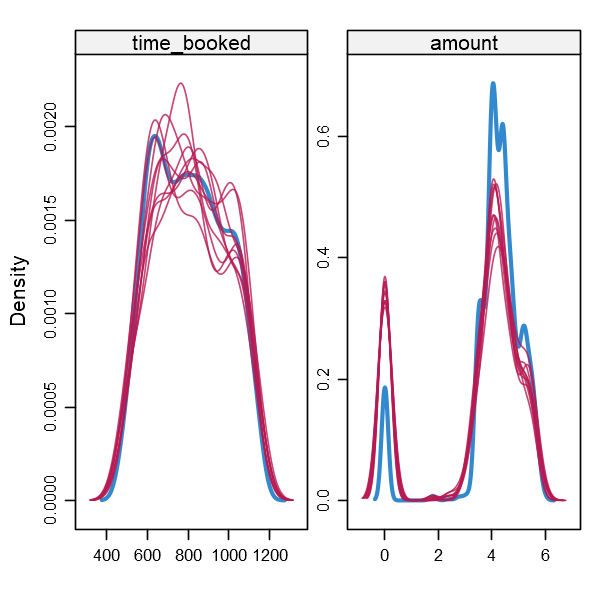

In [179]:
densityplot(imputed)

In [180]:
modelFit1 <- with(imputed,lm(time_booked~ amount))
summary(pool(modelFit1))

,estimate,std.error,statistic,df,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),789.817067,13.209467,59.791745,116.4157,0.0000000
amount,4.224868,3.158977,1.337416,107.0965,0.1839202


In [181]:
summary(imputed$imp$time_booked)
summary(df$time_booked)

       1                2                3                4         
 Min.   : 480.0   Min.   : 480.0   Min.   : 480.0   Min.   : 480.0  
 1st Qu.: 640.0   1st Qu.: 660.0   1st Qu.: 680.0   1st Qu.: 677.5  
 Median : 780.0   Median : 810.0   Median : 820.0   Median : 780.0  
 Mean   : 796.8   Mean   : 817.1   Mean   : 823.7   Mean   : 806.9  
 3rd Qu.: 960.0   3rd Qu.: 960.0   3rd Qu.: 980.0   3rd Qu.: 950.0  
 Max.   :1140.0   Max.   :1150.0   Max.   :1160.0   Max.   :1140.0  
       5                6                7                8         
 Min.   : 480.0   Min.   : 480.0   Min.   : 480.0   Min.   : 480.0  
 1st Qu.: 640.0   1st Qu.: 677.5   1st Qu.: 660.0   1st Qu.: 660.0  
 Median : 780.0   Median : 830.0   Median : 780.0   Median : 810.0  
 Mean   : 800.3   Mean   : 823.8   Mean   : 801.7   Mean   : 811.9  
 3rd Qu.: 960.0   3rd Qu.: 960.0   3rd Qu.: 930.0   3rd Qu.: 960.0  
 Max.   :1150.0   Max.   :1150.0   Max.   :1160.0   Max.   :1150.0  
       9                10        

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  480.0   660.0   790.0   805.9   960.0  1170.0     276 

In [182]:
imputed_comp <- complete(imputed)

In [183]:
mean(imputed_comp$time_booked)
mean(df$time_booked,na.rm=TRUE)
sd(imputed_comp$time_booked)
sd(df$time_booked,na.rm=TRUE)

[1] 804.7253

[1] 805.8753

[1] 175.7951

[1] 174.9124

In [184]:
df$time_booked <- imputed_comp$time_booked

In [185]:
getMissingness(df)

list(var = 53, na_count = 470, rate = 21.5)This dataset has 1714 (78.5%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>
amount,470,21.5


In [186]:
summary(imputed$imp$amount)
summary(df$amount)

       1               2               3               4        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:3.434   1st Qu.:3.258   1st Qu.:3.302   1st Qu.:3.434  
 Median :4.025   Median :4.063   Median :4.025   Median :4.025  
 Mean   :3.431   Mean   :3.382   Mean   :3.390   Mean   :3.435  
 3rd Qu.:4.534   3rd Qu.:4.635   3rd Qu.:4.615   3rd Qu.:4.562  
 Max.   :5.763   Max.   :5.763   Max.   :5.763   Max.   :5.753  
       5               6               7               8        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:3.258   1st Qu.:3.434   1st Qu.:3.434   1st Qu.:3.258  
 Median :4.111   Median :4.111   Median :4.111   Median :4.106  
 Mean   :3.436   Mean   :3.440   Mean   :3.431   Mean   :3.340  
 3rd Qu.:4.710   3rd Qu.:4.627   3rd Qu.:4.605   3rd Qu.:4.635  
 Max.   :5.826   Max.   :5.950   Max.   :5.763   Max.   :5.950  
       9               10       
 Min.   :0.000   Min.   :0.000  
 1st Qu.:3.434   1st Qu.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   3.932   4.263   4.133   4.754   5.950     470 

In [187]:
mean(imputed_comp$amount)
mean(df$amount,na.rm=TRUE)
sd(imputed_comp$amount)
sd(df$amount,na.rm=TRUE)

[1] 3.981693

[1] 4.132746

[1] 1.379298

[1] 1.19079

In [188]:
df$amount <- imputed_comp$amount

In [189]:
summary(df)

 Client_Code        Booking_Date           sunday            monday         
 Length:2184        Length:2184        Min.   :0.00000   Min.   :0.0000000  
 Class :character   Class :character   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Mode  :character   Median :0.00000   Median :0.0000000  
                                       Mean   :0.02976   Mean   :0.0004579  
                                       3rd Qu.:0.00000   3rd Qu.:0.0000000  
                                       Max.   :1.00000   Max.   :1.0000000  
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00

In [190]:
getMissingness(df)

list(var = integer(0), na_count = numeric(0), rate = numeric(0))This dataset has 2184 (100%) complete rows. Original data has 2184 rows.



var,na_count,rate
<fct>,<dbl>,<dbl>


## Recheck for variables with less than 2 levels

In [192]:
l1 <- c()
for (v in names(df)){
    if (length(unique(df[[v]]))==1){
        l1<- c(l1,v)
    }
}
df <- df[ , !names(df) %in% l1]


In [193]:
exploreData(data=df, y='NoShow',dir="report-r-cleansed", debug=FALSE,) 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |===================================================================== |  98%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report-r-cleansed\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

## Re-Check for Outliers

In [194]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

,Client_Code,sunday,monday,wednesday,thursday,friday,saturday,time_booked,NoShow,service_CAL,...,staff_JOANNE,staff_KELLY,staff_SINEAD,Canceled_By_BECKY,Canceled_By_JJ,Canceled_By_JOANNE,Canceled_By_KELLY,Canceled_By_SINEAD,amount,total_cancel12
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,WXATNI,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Q4NPGP,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,.L01,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,.L01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Choosing only continuos features for outliers re-checing

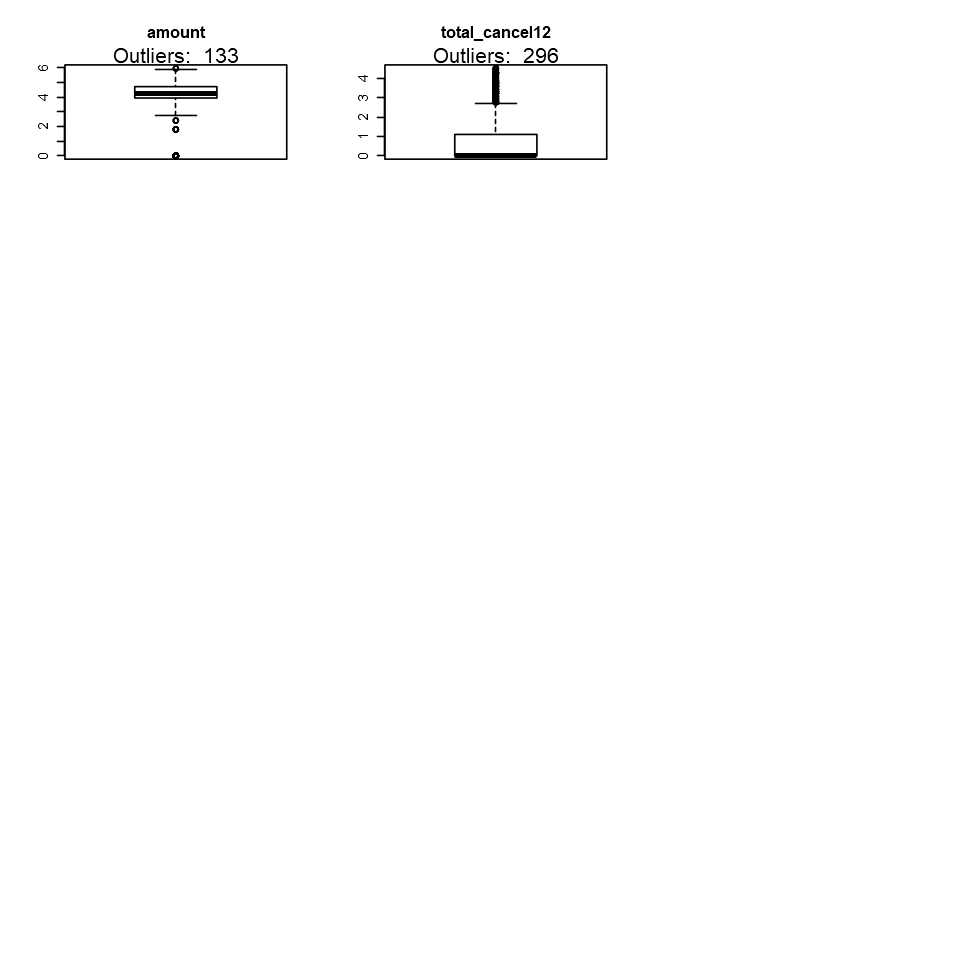

In [195]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(NOSHOW_continuousV[,c(3,6)])) {
    outlier_values <- boxplot.stats(NOSHOW_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

### Re-Checking for amount Outliers

#### amount outliers

[1] 0 0 0 0 0 0

[1] 0

[1] 5.950122

[1] 205

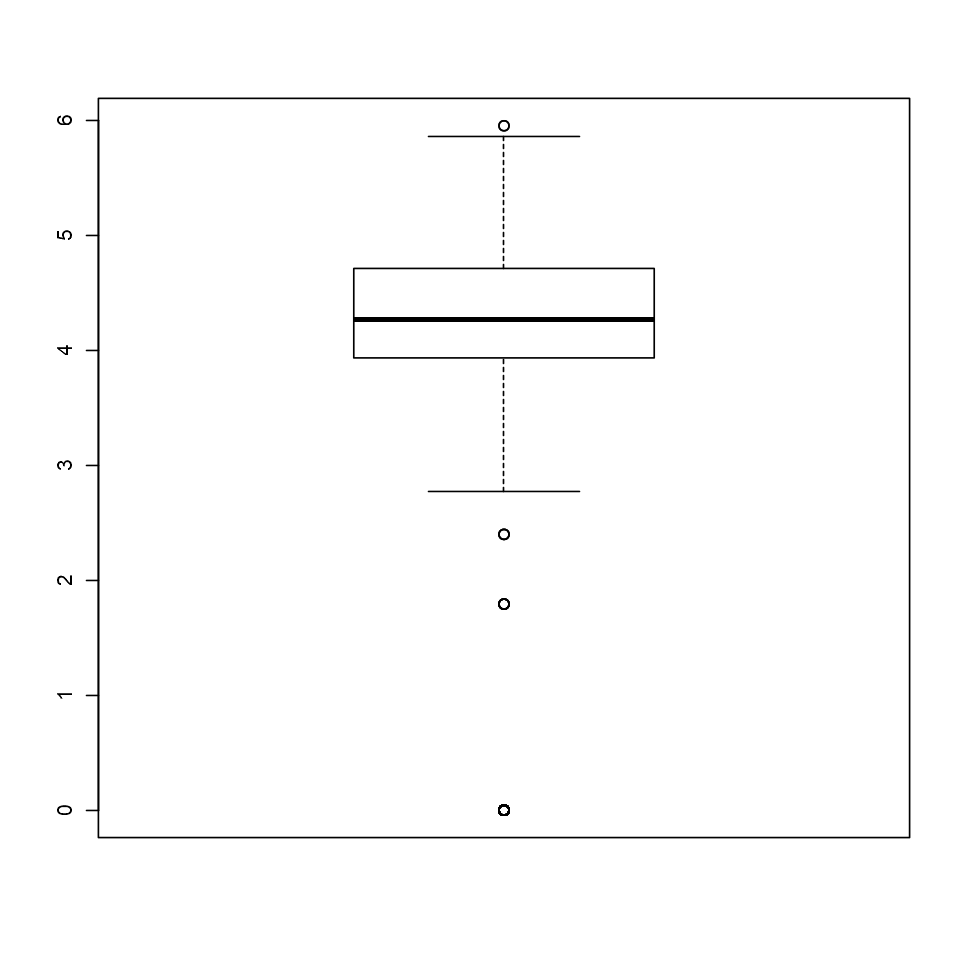

In [196]:
amount_out2  <- boxplot(df$amount)
head(amount_out2$out) # outlier
min(amount_out2$out) #  minimum outlier
max(amount_out2$out)
length(amount_out2$out)

In [197]:
amount.out2 <- ifelse(df[["amount"]] <2.40 , 1, 0)
table(amount.out2)

amount.out2
   0    1 
1981  203 

In [198]:
amount.noout2 <- df[["amount"]]
amount.noout2 <- ifelse(amount.out2==1,NA,amount.noout2)
head(amount.noout2)

[1] 5.145923 5.753366 5.572154 5.572154 4.025352 4.262680

Warning message:
"Removed 203 rows containing non-finite values (stat_bin)."
Warning message:
"Use of `df$amount` is discouraged. Use `amount` instead."
Warning message:
"Removed 203 rows containing non-finite values (stat_density)."


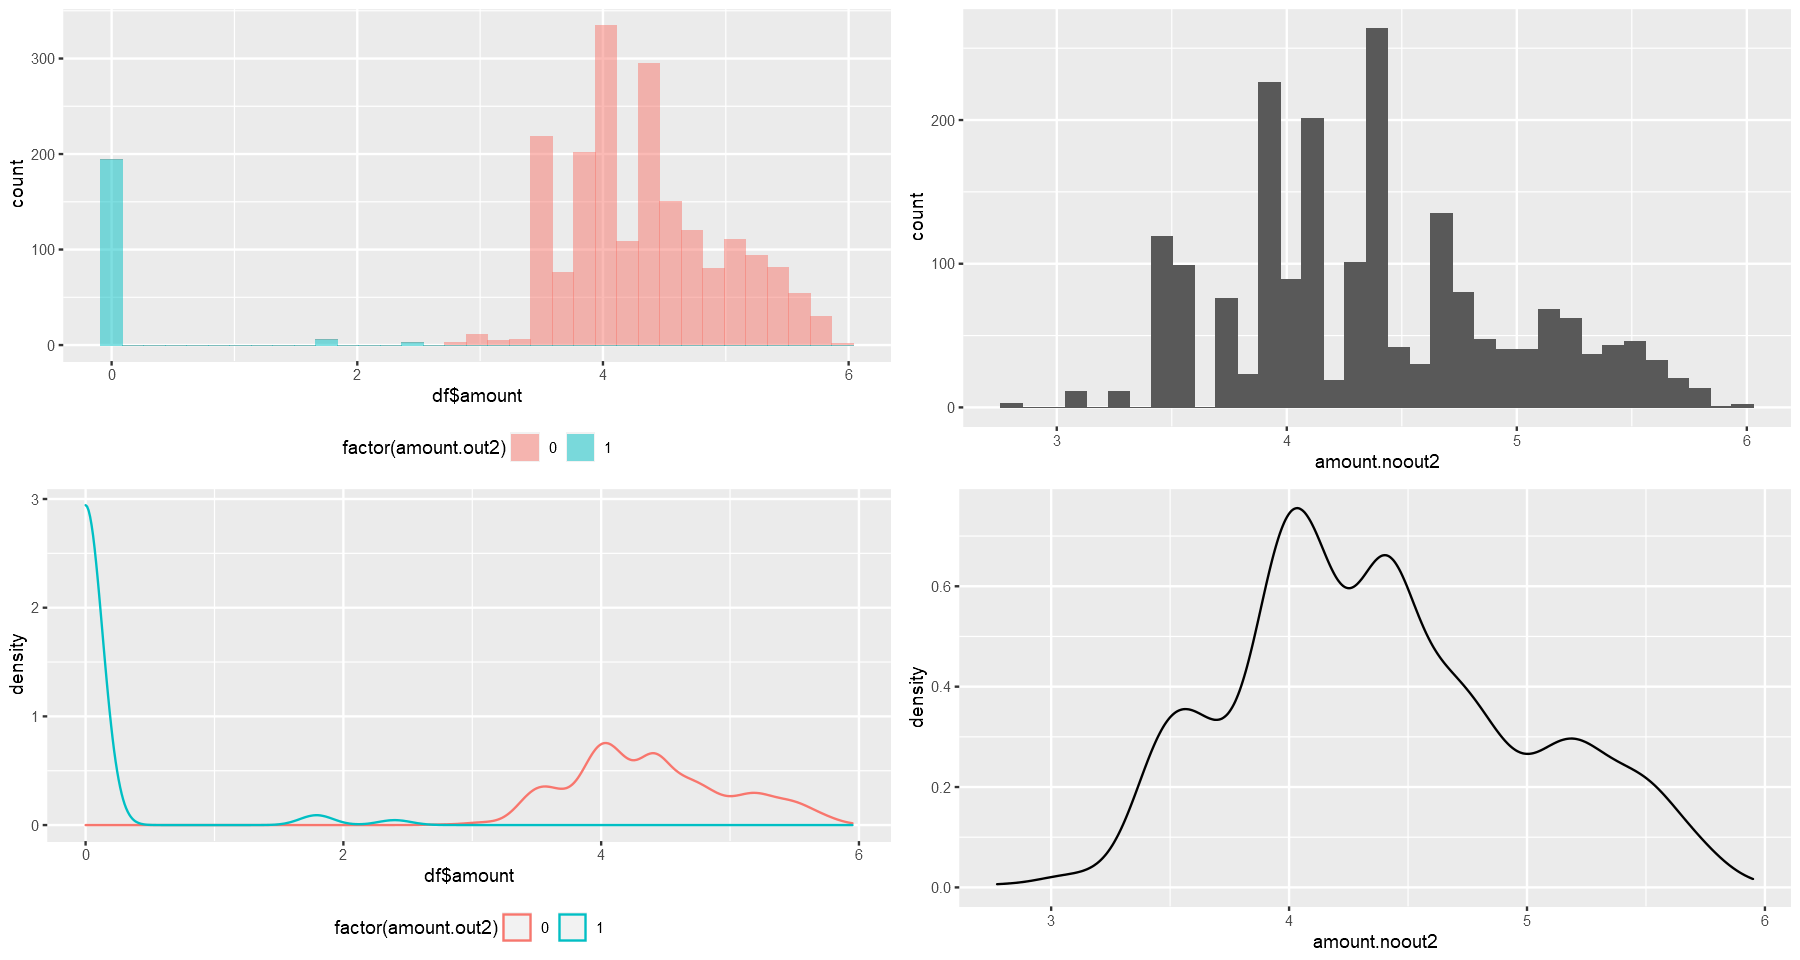

In [199]:
p1 <- ggplot() + geom_histogram(aes(x=df$amount, fill=factor(amount.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=amount.noout2),bins=35)
p3 <- ggplot (df,aes(x=df$amount, group = factor(amount.out2), color = factor(amount.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=amount.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [200]:
t.test(amount.out2,amount.noout2)


	Welch Two Sample t-test

data:  amount.out2 and amount.noout2
t = -286.7, df = 2782.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.317029 -4.258379
sample estimates:
 mean of x  mean of y 
0.09294872 4.38065248 


In [201]:
mod5 <- glm(df$NoShow ~ df$amount,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ amount.noout2,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

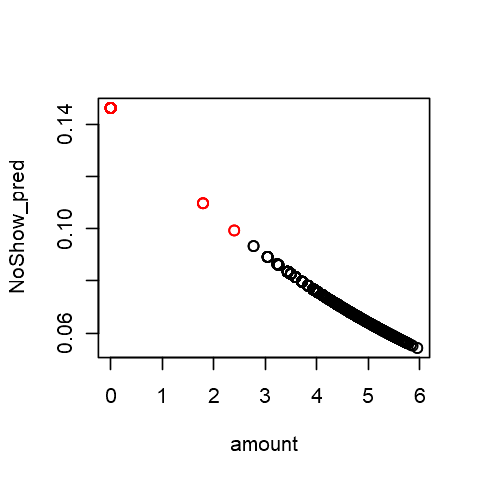

In [202]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$amount, pred5, col=factor(amount.out2),xlab="amount",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [203]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1841
     1  140

In [204]:
mod1a <- glm(df$NoShow ~ df$amount,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$amount+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$amount+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$amount, pred5, col=factor(amount.out2),xlab="amount",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$amount), pred5, col=factor(amount.out2),xlab="amount_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$amount), pred5, col=factor(amount.out2),xlab="amount_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

no need to transform this feature againg

### Re-Checking for total_cancel12 Outliers

#### total_cancel12 outliers

[1] 2.944439 3.218876 3.433987 3.610918 3.761200 3.891820

[1] 2.772589

[1] 4.51086

[1] 164

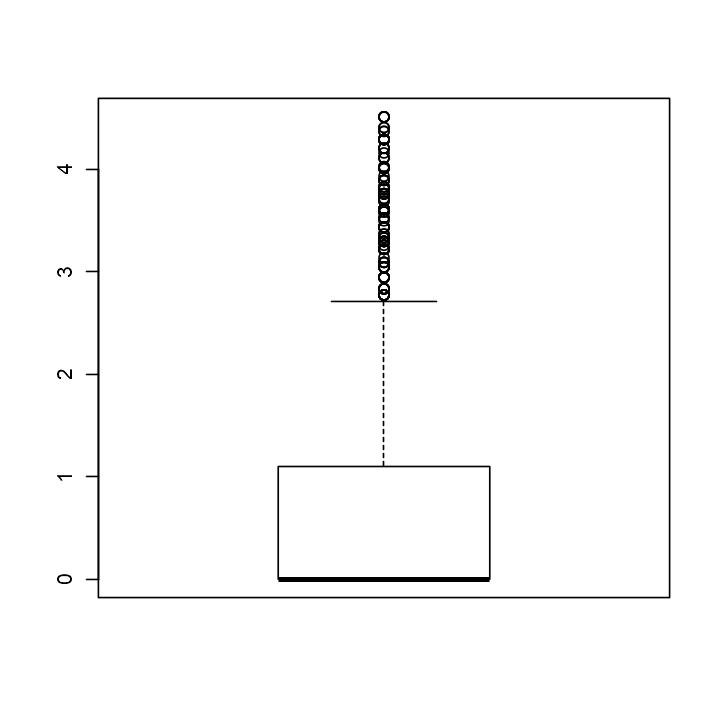

In [156]:
total_cancel12_out2  <- boxplot(df$total_cancel12)
head(total_cancel12_out2$out) # outlier
min(total_cancel12_out2$out) #  minimum outlier
max(total_cancel12_out2$out)
length(total_cancel12_out2$out)

In [158]:
total_cancel12.out2 <- ifelse(df[["total_cancel12"]] <2.77 , 1, 0)
table(total_cancel12.out2)

total_cancel12.out2
   0    1 
 164 2020 

In [159]:
total_cancel12.noout2 <- df[["total_cancel12"]]
total_cancel12.noout2 <- ifelse(total_cancel12.out2==1,NA,total_cancel12.noout2)
head(total_cancel12.noout2)

[1] NA NA NA NA NA NA

Warning message:
"Removed 2020 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2020 rows containing non-finite values (stat_density)."


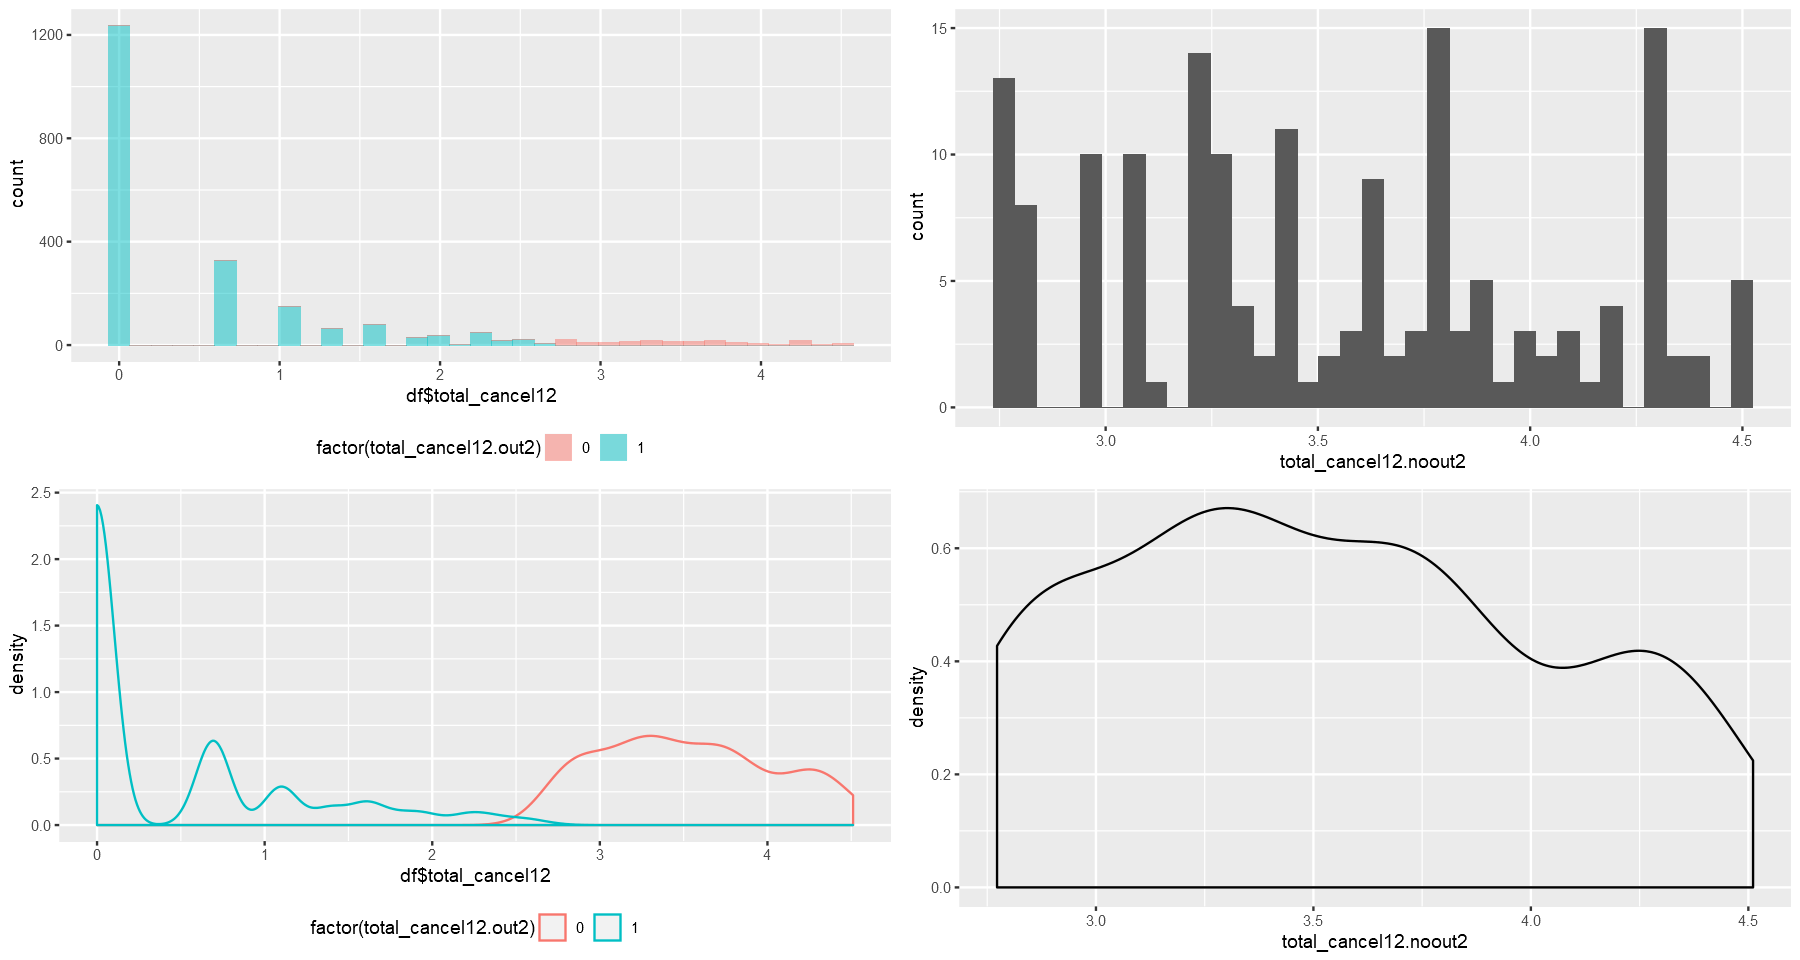

In [160]:
p1 <- ggplot() + geom_histogram(aes(x=df$total_cancel12, fill=factor(total_cancel12.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=total_cancel12.noout2),bins=35)
p3 <- ggplot (df,aes(x=df$total_cancel12, group = factor(total_cancel12.out2), color = factor(total_cancel12.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=total_cancel12.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [161]:
t.test(total_cancel12.out2,total_cancel12.noout2)


	Welch Two Sample t-test

data:  total_cancel12.out2 and total_cancel12.noout2
t = -64.874, df = 169.61, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.686696 -2.528018
sample estimates:
mean of x mean of y 
0.9249084 3.5322653 


In [162]:
mod5 <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ total_cancel12.noout2,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

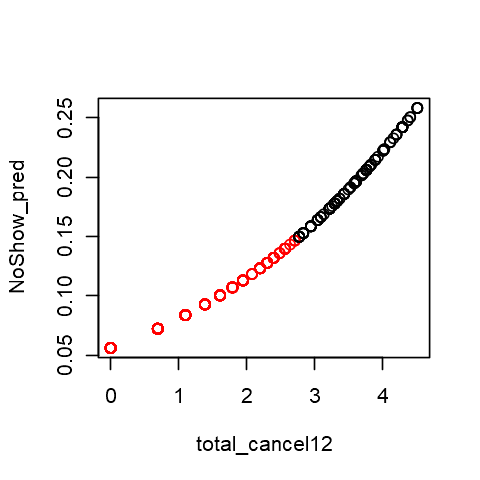

In [163]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$total_cancel12, pred5, col=factor(total_cancel12.out2),xlab="total_cancel12",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [150]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1840
     1  136

In [164]:
mod1a <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$total_cancel12+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$total_cancel12+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

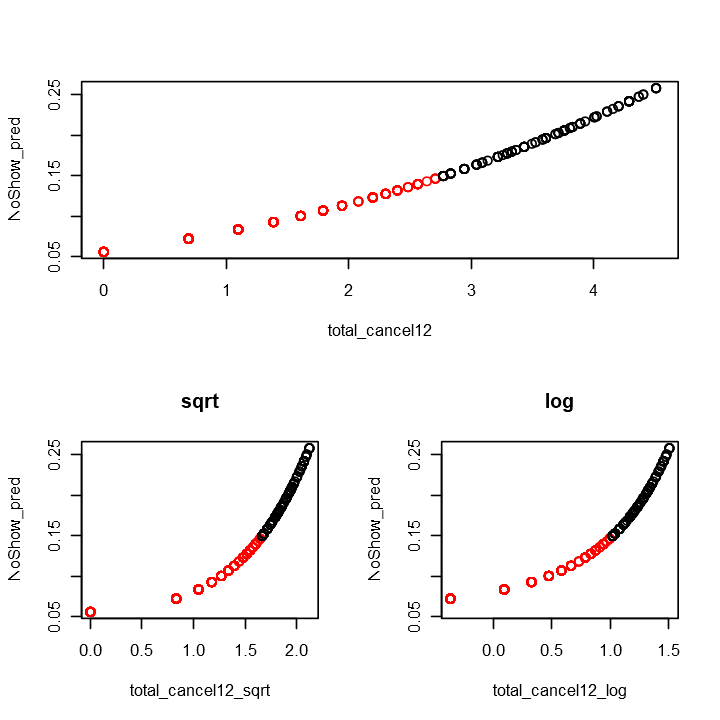

In [165]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$total_cancel12, pred5, col=factor(total_cancel12.out2),xlab="total_cancel12",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$total_cancel12), pred5, col=factor(total_cancel12.out2),xlab="total_cancel12_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$total_cancel12), pred5, col=factor(total_cancel12.out2),xlab="total_cancel12_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

no need to transform this feature againg

In [218]:
write.csv(df,"C:\\Users\\Mayer\\Documents\\DataScience\\project\\Noshows\\NoShowCleansedDF.csv",row.names = FALSE )